  

  # An data driven approach for Prediction & enhancing energy efficiency in Domestic EPCs of Barnet 

On this assignment we are going to address a critical challenge that being the enhancement of building / apartment's energy efficiency by utilising data driven insights. By employing the dataset of the govermental website we aim to analyse , model & predict energy efficiency ratings with end goal to generate recommendations that stakeholders / tenants can adopt to improve energy performance & reduce enviromental impact where possible collectively.

The significance of the issue : Energy efficiency on domestic EPC's is fundamental for reaching target goals for : sustainability / diminishing energy consumption & mitigate climate change. Residential along with commercial buildings make for a big part of total energy usage & carbon emissions. If we succesfully establish the key factors which influence the energy performance we would then be able to identify, implement targeted upgrades for energy efficiency & promoting caution - minimize enviromental pollution. 

In order to carry out the work and the analysis needed for the assignment we extracted a whole dataset for the domestic EPC's of the Barnet authority via the  ["Energy Performance of Buildings Data: England and Wales" : https://epc.opendatacommunities.org/domestic/search?address=&postcode=&local-authority=E09000017&constituency=&uprn=&from-month=1&from-year=2008&to-month=12&to-year=2024 ] it contains over 173000 records addressing : building characacteristics / energy ratings & consumption patterns. Although the dataset is great and covers extensively the data needed accross all key areas some limitation was noted : some incomplete data on key fields like energy ratings / building characteristics that can potentially 'skew' the analysis & results of our models. Some data entry errors (duplicate entries / outliers) which could also potentially 'skew' the whole result reliability. The representation of certain property types and energy rankings is limited (as of what reflects to what exists on Barnet) which can potentially result in bias in feature importace or modelling. 
The dataset also spans from 2008 all the way to 2024 and throughout this years building regulations, energy efficiency standarts , available technologies have been reshaped and evolved overall potentially making this variability may affect energy ratings / consumption patterns as older assestments may not properly compare with newer ones due to changes of criteria and evaluation methodology differences. 
The dataset does not include external factors as energy tariffs / other financial incentives or climate conditions to mention. All of those factors will be considered and reviewed during the proccessing of the dataset on the  cleansing / transforming stage

 Throughout this comprehensive analysis we are going to : Clean and transform the dataset for accuracy , Conduct exploratory / diagnostic analytics to find patterns / relationships in the data , develop predictive models in order to forecast the ratings of energy efficiency , identify critical features that influence the energy performance .
We will conclude with the evidence based generated reccomendations that will indicate the ideal economic - energy efficient approaches that will enhance the stakeholders / tenants efforts to achieve sustainability & minimized carbon footprint.


# Data Preparation and Feature Engineering

Reviewing the dataset :

In [342]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np

from scipy.stats import zscore

import matplotlib.pyplot as plt



file_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\Barnet data\certificates.csv'
df = pd.read_csv(file_path)


print("Shape")


print("records + columns :")
print(df.shape)

C:\Users\cimem\AppData\Local\Temp\ipykernel_7440\2232161567.py:14: DtypeWarning: Columns (15,34,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Shape
records + columns :
(173209, 92)


In [113]:
print("Dataset head sample")

file_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\Barnet data\certificates.csv'
df = pd.read_csv(file_path)

pd.set_option('display.max_columns', None)
print(df.head())


Dataset head sample


C:\Users\cimem\AppData\Local\Temp\ipykernel_7440\90522205.py:4: DtypeWarning: Columns (15,34,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


                                             LMK_KEY               ADDRESS1  \
0  20e080e980b1adf8135ed034e06aa6538031386ca324da...  25 Priory Field Drive   
1                  760043321412014101221121693949196    70, Harcourt Avenue   
2                 1342791749962015071408401177498105         68, Swan Drive   
3                  736985809262016070111401454988456           16, Rose Way   
4                   50804143212009012217495402910959      Ground Floor Flat   

      ADDRESS2 ADDRESS3  POSTCODE  BUILDING_REFERENCE_NUMBER  \
0          NaN      NaN   HA8 9PT                10003615320   
1          NaN      NaN   HA8 8YN                 1692136968   
2          NaN      NaN   NW9 5DE                  700457378   
3          NaN      NaN   HA8 9SD                 5546044968   
4  8 The Drive      NaN  NW11 9SR                 9993326568   

  CURRENT_ENERGY_RATING POTENTIAL_ENERGY_RATING  CURRENT_ENERGY_EFFICIENCY  \
0                     C                       B               

In [114]:
import pandas as pd
import numpy as np

file_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\Barnet data\certificates.csv'
df = pd.read_csv(file_path)

# Step 1: Inspect the dataset
print("Dataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

C:\Users\cimem\AppData\Local\Temp\ipykernel_7440\1185702805.py:5: DtypeWarning: Columns (15,34,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173209 entries, 0 to 173208
Data columns (total 92 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   LMK_KEY                        173209 non-null  object 
 1   ADDRESS1                       173209 non-null  object 
 2   ADDRESS2                       91949 non-null   object 
 3   ADDRESS3                       21298 non-null   object 
 4   POSTCODE                       173209 non-null  object 
 5   BUILDING_REFERENCE_NUMBER      173209 non-null  int64  
 6   CURRENT_ENERGY_RATING          173209 non-null  object 
 7   POTENTIAL_ENERGY_RATING        173209 non-null  object 
 8   CURRENT_ENERGY_EFFICIENCY      173209 non-null  int64  
 9   POTENTIAL_ENERGY_EFFICIENCY    173209 non-null  int64  
 10  PROPERTY_TYPE                  173209 non-null  object 
 11  BUILT_FORM                     173146 non-null  object 
 12  INSPECTION_DATE 

In [115]:
import pandas as pd
import numpy as np

file_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\Barnet data\certificates.csv'
df = pd.read_csv(file_path)

# Step 1: Calculate missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a summary DataFrame for better visualization
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

# Ensure all rows and columns are displayed
pd.set_option('display.max_rows', None)  # No row truncation
pd.set_option('display.max_columns', None)  # No column truncation

# Display the missing values summary
print("\nMissing Values Summary:\n")
print(missing_summary)

# Reset options after displaying
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


C:\Users\cimem\AppData\Local\Temp\ipykernel_7440\1368641705.py:5: DtypeWarning: Columns (15,34,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)



Missing Values Summary:

                               Missing Values  Percentage (%)
SHEATING_ENV_EFF                       173209      100.000000
SHEATING_ENERGY_EFF                    173209      100.000000
FLOOR_ENV_EFF                          163719       94.521070
FLAT_STOREY_COUNT                      156228       90.196237
ADDRESS3                               151911       87.703872
SECONDHEAT_DESCRIPTION                 145778       84.163063
UNHEATED_CORRIDOR_LENGTH               123547       71.328280
FLOOR_ENERGY_EFF                       120694       69.681137
LOW_ENERGY_FIXED_LIGHT_COUNT           120399       69.510822
ADDRESS2                                81260       46.914421
FLOOR_HEIGHT                            78394       45.259773
FLAT_TOP_STOREY                         78117       45.099850
FIXED_LIGHTING_OUTLETS_COUNT            71388       41.214948
MAIN_HEATING_CONTROLS                   70230       40.546392
PHOTO_SUPPLY                            6783

## Step 2: Handle Missing Values

In [116]:
# Set a threshold for dropping columns with high missing values
threshold = 51  # Percentage of missing values to consider for dropping

# Identify columns with missing percentage greater than the threshold
columns_to_drop = missing_summary[missing_summary['Percentage (%)'] > threshold].index

# Drop the identified columns from the dataset
df_cleaned = df.drop(columns=columns_to_drop)

# Display the remaining columns and their missing value summary
remaining_missing_summary = df_cleaned.isnull().sum().reset_index()
remaining_missing_summary.columns = ['Column', 'Missing Values']
remaining_missing_summary['Percentage (%)'] = (remaining_missing_summary['Missing Values'] / len(df_cleaned)) * 100

print(f"\nDropped Columns (>{threshold}% Missing):\n", list(columns_to_drop))
print("\nRemaining Columns Missing Values Summary:\n")
print(remaining_missing_summary)



Dropped Columns (>51% Missing):
 ['SHEATING_ENV_EFF', 'SHEATING_ENERGY_EFF', 'FLOOR_ENV_EFF', 'FLAT_STOREY_COUNT', 'ADDRESS3', 'SECONDHEAT_DESCRIPTION', 'UNHEATED_CORRIDOR_LENGTH', 'FLOOR_ENERGY_EFF', 'LOW_ENERGY_FIXED_LIGHT_COUNT']

Remaining Columns Missing Values Summary:

                          Column  Missing Values  Percentage (%)
0                        LMK_KEY               0        0.000000
1                       ADDRESS1               0        0.000000
2                       ADDRESS2           81260       46.914421
3                       POSTCODE               0        0.000000
4      BUILDING_REFERENCE_NUMBER               0        0.000000
..                           ...             ...             ...
78            LODGEMENT_DATETIME               0        0.000000
79                        TENURE            3931        2.269513
80  FIXED_LIGHTING_OUTLETS_COUNT           71388       41.214948
81                          UPRN            9288        5.362308
82     

In [117]:
# Print the list of remaining columns and their count
remaining_columns = df_cleaned.columns.tolist()
print(f"Number of Remaining Columns: {len(remaining_columns)}")
print("\nRemaining Columns After Dropping High-Missing-Value Columns:")
print(remaining_columns)


Number of Remaining Columns: 83

Remaining Columns After Dropping High-Missing-Value Columns:
['LMK_KEY', 'ADDRESS1', 'ADDRESS2', 'POSTCODE', 'BUILDING_REFERENCE_NUMBER', 'CURRENT_ENERGY_RATING', 'POTENTIAL_ENERGY_RATING', 'CURRENT_ENERGY_EFFICIENCY', 'POTENTIAL_ENERGY_EFFICIENCY', 'PROPERTY_TYPE', 'BUILT_FORM', 'INSPECTION_DATE', 'LOCAL_AUTHORITY', 'CONSTITUENCY', 'COUNTY', 'LODGEMENT_DATE', 'TRANSACTION_TYPE', 'ENVIRONMENT_IMPACT_CURRENT', 'ENVIRONMENT_IMPACT_POTENTIAL', 'ENERGY_CONSUMPTION_CURRENT', 'ENERGY_CONSUMPTION_POTENTIAL', 'CO2_EMISSIONS_CURRENT', 'CO2_EMISS_CURR_PER_FLOOR_AREA', 'CO2_EMISSIONS_POTENTIAL', 'LIGHTING_COST_CURRENT', 'LIGHTING_COST_POTENTIAL', 'HEATING_COST_CURRENT', 'HEATING_COST_POTENTIAL', 'HOT_WATER_COST_CURRENT', 'HOT_WATER_COST_POTENTIAL', 'TOTAL_FLOOR_AREA', 'ENERGY_TARIFF', 'MAINS_GAS_FLAG', 'FLOOR_LEVEL', 'FLAT_TOP_STOREY', 'MAIN_HEATING_CONTROLS', 'MULTI_GLAZE_PROPORTION', 'GLAZED_TYPE', 'GLAZED_AREA', 'EXTENSION_COUNT', 'NUMBER_HABITABLE_ROOMS', 'NUM

In [118]:
# List of columns to drop
columns_to_drop = [
    'LMK_KEY', 'ADDRESS1', 'ADDRESS2', 'POSTCODE', 'BUILDING_REFERENCE_NUMBER',
    'INSPECTION_DATE', 'LOCAL_AUTHORITY', 'CONSTITUENCY', 'COUNTY', 'LODGEMENT_DATE',
    'GLAZED_AREA', 'ROOF_DESCRIPTION', 'ADDRESS', 'LOCAL_AUTHORITY_LABEL',
    'CONSTITUENCY_LABEL', 'POSTTOWN', 'LODGEMENT_DATETIME', 'UPRN', 'UPRN_SOURCE'
]

# Drop the columns
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Print the number of remaining columns and their names
remaining_columns_after_drop = df_cleaned.columns.tolist()
print(f"Number of Remaining Columns After Dropping Irrelevant Columns: {len(remaining_columns_after_drop)}")
print("\nRemaining Columns:")
print(remaining_columns_after_drop)


Number of Remaining Columns After Dropping Irrelevant Columns: 64

Remaining Columns:
['CURRENT_ENERGY_RATING', 'POTENTIAL_ENERGY_RATING', 'CURRENT_ENERGY_EFFICIENCY', 'POTENTIAL_ENERGY_EFFICIENCY', 'PROPERTY_TYPE', 'BUILT_FORM', 'TRANSACTION_TYPE', 'ENVIRONMENT_IMPACT_CURRENT', 'ENVIRONMENT_IMPACT_POTENTIAL', 'ENERGY_CONSUMPTION_CURRENT', 'ENERGY_CONSUMPTION_POTENTIAL', 'CO2_EMISSIONS_CURRENT', 'CO2_EMISS_CURR_PER_FLOOR_AREA', 'CO2_EMISSIONS_POTENTIAL', 'LIGHTING_COST_CURRENT', 'LIGHTING_COST_POTENTIAL', 'HEATING_COST_CURRENT', 'HEATING_COST_POTENTIAL', 'HOT_WATER_COST_CURRENT', 'HOT_WATER_COST_POTENTIAL', 'TOTAL_FLOOR_AREA', 'ENERGY_TARIFF', 'MAINS_GAS_FLAG', 'FLOOR_LEVEL', 'FLAT_TOP_STOREY', 'MAIN_HEATING_CONTROLS', 'MULTI_GLAZE_PROPORTION', 'GLAZED_TYPE', 'EXTENSION_COUNT', 'NUMBER_HABITABLE_ROOMS', 'NUMBER_HEATED_ROOMS', 'LOW_ENERGY_LIGHTING', 'NUMBER_OPEN_FIREPLACES', 'HOTWATER_DESCRIPTION', 'HOT_WATER_ENERGY_EFF', 'HOT_WATER_ENV_EFF', 'FLOOR_DESCRIPTION', 'WINDOWS_DESCRIPTION', 

# Further considering and proccessing columns 

In [120]:
# Summary statistics and unique values for 'PHOTO_SUPPLY'
photo_supply_summary = {
    "Unique Values": df_cleaned['PHOTO_SUPPLY'].unique(),
    "Non-Null Count": df_cleaned['PHOTO_SUPPLY'].notnull().sum(),
    "Null Count": df_cleaned['PHOTO_SUPPLY'].isnull().sum(),
    "Summary Statistics": df_cleaned['PHOTO_SUPPLY'].describe()
}

# Print summary
for key, value in photo_supply_summary.items():
    print(f"{key}:\n{value}\n")


Unique Values:
[  0.  nan  50.  35.   9.  40.  20.  75.  80.  60.   5.  30.  26.  10.
  25.  33.  15.  45.  70.  28.  90. 100.]

Non-Null Count:
105373

Null Count:
67836

Summary Statistics:
count    105373.000000
mean          0.074118
std           1.775106
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         100.000000
Name: PHOTO_SUPPLY, dtype: float64



In [123]:
# Check initial statistics and missing values for PHOTO_SUPPLY
print("Initial Statistics for PHOTO_SUPPLY:")
print(df_cleaned['PHOTO_SUPPLY'].describe())
print("\nInitial Missing Values in PHOTO_SUPPLY:", df_cleaned['PHOTO_SUPPLY'].isnull().sum())

# Impute missing values with 0.0 without using inplace to avoid chained assignment warnings
df_cleaned['PHOTO_SUPPLY'] = df_cleaned['PHOTO_SUPPLY'].fillna(0.0)

# Verify imputation
print("\nStatistics After Imputation for PHOTO_SUPPLY:")
print(df_cleaned['PHOTO_SUPPLY'].describe())
print("\nMissing Values in PHOTO_SUPPLY After Imputation:", df_cleaned['PHOTO_SUPPLY'].isnull().sum())


Initial Statistics for PHOTO_SUPPLY:
count    173209.000000
mean          0.045090
std           1.385004
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         100.000000
Name: PHOTO_SUPPLY, dtype: float64

Initial Missing Values in PHOTO_SUPPLY: 0

Statistics After Imputation for PHOTO_SUPPLY:
count    173209.000000
mean          0.045090
std           1.385004
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         100.000000
Name: PHOTO_SUPPLY, dtype: float64

Missing Values in PHOTO_SUPPLY After Imputation: 0


Handling of the [PHOTO_SUPPLY] Column

The column PHOTO_SUPPLY, which represents the percentage of a building's roof area equipped with photovoltaic (solar panel) systems, was retained due to its potential utility in analysis and predictive modeling. While the majority of properties in the dataset were not equipped with photovoltaic supplies, a smaller subset had varying levels of photovoltaic coverage. Missing values in this column were imputed with a value of 0.0, reflecting the logical assumption that properties with missing data likely lack photovoltaic systems.

This imputation approach ensures that the dataset remains consistent and complete without introducing bias. Retaining the column allows us to preserve valuable information on the presence of renewable energy features in buildings, which can be a significant factor in energy efficiency and environmental impact assessments. The decision aligns with the objectives of the assignment by enabling comprehensive analysis and supporting the generation of meaningful predictions.

This column that represents the percentage of photovoltaic (solar panel) area as percenatage of the total roof area , we decided to retain it due to its potential utilisation in analysis & predictive modeling. Although th emajority of the properties in this dataset were not installed with solar panels the smaller subset was (with varying levels) All missing values on the column were imputed with the value of 0.0 in order to reflect on the data as not having solar panels (as this is the most logical assumption for Barnet) 

The imputation ensures tha the dataset remains consistent and complete without introducing bias. From this decision (to retain) we preserve valuable information on the presence of renewable energy features of properties which essentially could be a significant factor in energy efficiency & enviromental impact assestments and will inherently assist overall on analysis / predictions. 

In [124]:
# Summary statistics and unique values for 'WIND_TURBINE_COUNT'
wind_turbine_summary = {
    "Unique Values": df_cleaned['WIND_TURBINE_COUNT'].unique(),
    "Non-Null Count": df_cleaned['WIND_TURBINE_COUNT'].notnull().sum(),
    "Null Count": df_cleaned['WIND_TURBINE_COUNT'].isnull().sum(),
    "Summary Statistics": df_cleaned['WIND_TURBINE_COUNT'].describe()
}

# Print summary
for key, value in wind_turbine_summary.items():
    print(f"{key}:\n{value}\n")


Unique Values:
[ 0. nan -1.  1.]

Non-Null Count:
161185

Null Count:
12024

Summary Statistics:
count    161185.000000
mean          0.000093
std           0.029154
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: WIND_TURBINE_COUNT, dtype: float64



In [125]:
percentage_zeros = (df_cleaned['WIND_TURBINE_COUNT'].value_counts(normalize=True).get(0, 0)) * 100
print(f"Percentage of 0 in WIND_TURBINE_COUNT: {percentage_zeros:.2f}%")


Percentage of 0 in WIND_TURBINE_COUNT: 99.92%


['WIND_TURBINE_COUNT'] column was inspected in order to review its relevance and utility for the assignment and resulted with some concrete observations. 
High sparcity : The column is recorder to be majority accounting for 99.92% of the entries 0. This means there is minimal variation on the data as the properties in Barnet are not really equipped with wind turbines.

Negligible Impact on Analysis : The rarity indicates that this feature is unlikely to have a significant impact on both analysis & predictive modeling.

Potential for Noise : As it has limited variation and is sparse this can introduce noise into the dataset and complicate the analysis , instead it is better to focus on variables with substantive influence.

Thus we decided to drop this column from the dataset, due to the principle of emphasizing the retention of features that add value to the analysis while removing those with negligible or redundant information.


In [138]:
# Summary statistics and unique values for 'HEAT_LOSS_CORRIDOR'
heat_loss_corridor_summary = {
    "Unique Values": df_cleaned['HEAT_LOSS_CORRIDOR'].unique(),
    "Value Counts": df_cleaned['HEAT_LOSS_CORRIDOR'].value_counts(dropna=False),
    "Non-Null Count": df_cleaned['HEAT_LOSS_CORRIDOR'].notnull().sum(),
    "Null Count": df_cleaned['HEAT_LOSS_CORRIDOR'].isnull().sum()
}

# Print summary
for key, value in heat_loss_corridor_summary.items():
    print(f"{key}:\n{value}\n")


Unique Values:
[nan 'NO DATA!' 'no corridor' 'unheated corridor' 'heated corridor']

Value Counts:
HEAT_LOSS_CORRIDOR
NO DATA!             59341
unheated corridor    46100
NaN                  27487
no corridor          26410
heated corridor      13871
Name: count, dtype: int64

Non-Null Count:
145722

Null Count:
27487



In [139]:
# Calculate the total number of rows in the dataset
total_rows = len(df_cleaned)

# Count the occurrences of 'NO DATA!' and NaN
no_data_count = (df_cleaned['HEAT_LOSS_CORRIDOR'] == 'NO DATA!').sum()
nan_count = df_cleaned['HEAT_LOSS_CORRIDOR'].isnull().sum()

# Calculate percentages
no_data_percentage = (no_data_count / total_rows) * 100
nan_percentage = (nan_count / total_rows) * 100

# Print the results
print(f"Percentage of 'NO DATA!': {no_data_percentage:.2f}%")
print(f"Percentage of NaN: {nan_percentage:.2f}%")


Percentage of 'NO DATA!': 34.26%
Percentage of NaN: 15.87%


In [141]:
# Logical imputation based on property type
def impute_heat_loss_corridor(row):
    if row['HEAT_LOSS_CORRIDOR'] in ['NO DATA!', None, np.nan]:  # Handle NO DATA! and NaN
        if row['PROPERTY_TYPE'] in ['House', 'Detached', 'Semi-Detached']:
            return 'no corridor'  # Logical assumption for houses
        elif row['PROPERTY_TYPE'] in ['Flat', 'Maisonette']:
            return 'unheated corridor'  # Common value for flats/maisonettes
    return row['HEAT_LOSS_CORRIDOR']  # Keep existing values

# Apply the logical imputation
df_cleaned['HEAT_LOSS_CORRIDOR'] = df_cleaned.apply(impute_heat_loss_corridor, axis=1)

# Verify updated value counts
updated_counts = df_cleaned['HEAT_LOSS_CORRIDOR'].value_counts()
print("Updated Value Counts for 'HEAT_LOSS_CORRIDOR':")
print(updated_counts)

# Calculate updated percentages for each category
total = len(df_cleaned)
category_percentages = (updated_counts / total) * 100
print("\nPercentage Distribution for 'HEAT_LOSS_CORRIDOR':")
print(category_percentages)


Updated Value Counts for 'HEAT_LOSS_CORRIDOR':
HEAT_LOSS_CORRIDOR
no corridor          89639
unheated corridor    67116
heated corridor      13805
NO DATA!              2649
Name: count, dtype: int64

Percentage Distribution for 'HEAT_LOSS_CORRIDOR':
HEAT_LOSS_CORRIDOR
no corridor          51.751930
unheated corridor    38.748564
heated corridor       7.970140
NO DATA!              1.529366
Name: count, dtype: float64


After analyzing [HEAT_LOSS_CORRIDOR] column we observed that 50.13% of the entries were labeled as NO DATA! or  (NaN). While this proportion effectively reduces the immediate utility of the column it still holds significant relevance for flats and maisonettes (particularly properties with shared corridors) since it provides valuable insights into energy loss patterns.

In order to address these limitations we applied this imputation strategy : for houses / detached & semi detached properties missing or unknown values were imputed with no corridor as these property types are unlikely to have shared corridors. For flats & maisonettes  unheated corridor was used for imputation as its most common typically. With this approach we preserved the column’s contextual relevance whilst ensuring data completeness and consistency.

Keeping & preprocessing this column was deemed applicable as it will be used to provide meaningful insights for throughout the analysis / feature engineering stage.

In [131]:
# Summary statistics and unique values for 'GLAZED_TYPE'
glazed_type_summary = {
    "Unique Values": df_cleaned['GLAZED_TYPE'].unique(),
    "Value Counts": df_cleaned['GLAZED_TYPE'].value_counts(dropna=False),
    "Non-Null Count": df_cleaned['GLAZED_TYPE'].notnull().sum(),
    "Null Count": df_cleaned['GLAZED_TYPE'].isnull().sum()
}

# Print summary
for key, value in glazed_type_summary.items():
    print(f"{key}:\n{value}\n")


Unique Values:
['double glazing, unknown install date'
 'double glazing installed before 2002'
 'double glazing installed during or after 2002' 'secondary glazing'
 'single glazing' 'triple glazing']

Value Counts:
GLAZED_TYPE
double glazing, unknown install date             87331
double glazing installed during or after 2002    51314
double glazing installed before 2002             29814
secondary glazing                                 3139
single glazing                                    1167
triple glazing                                     444
Name: count, dtype: int64

Non-Null Count:
173209

Null Count:
0



In [132]:
import numpy as np

# Step 1: Replace missing-like values with NaN
missing_values = ['NO DATA!', 'not defined', 'INVALID!']
df_cleaned['GLAZED_TYPE'] = df_cleaned['GLAZED_TYPE'].replace(missing_values, np.nan)

# Step 2: Map rare categories to existing ones
mapping = {
    'double, known data': 'double glazing installed during or after 2002',
    'triple, known data': 'triple glazing'
}
df_cleaned['GLAZED_TYPE'] = df_cleaned['GLAZED_TYPE'].replace(mapping)

# Step 3: Verify changes
print("Updated Value Counts for 'GLAZED_TYPE':\n", df_cleaned['GLAZED_TYPE'].value_counts(dropna=False))


Updated Value Counts for 'GLAZED_TYPE':
 GLAZED_TYPE
double glazing, unknown install date             87331
double glazing installed during or after 2002    51314
double glazing installed before 2002             29814
secondary glazing                                 3139
single glazing                                    1167
triple glazing                                     444
Name: count, dtype: int64


In [133]:
# Use a more robust method to update the column without inplace
df_cleaned.loc[:, 'GLAZED_TYPE'] = df_cleaned['GLAZED_TYPE'].fillna('double glazing, unknown install date')

# Verify the changes
print("Updated Value Counts for 'GLAZED_TYPE':\n", df_cleaned['GLAZED_TYPE'].value_counts())


Updated Value Counts for 'GLAZED_TYPE':
 GLAZED_TYPE
double glazing, unknown install date             87331
double glazing installed during or after 2002    51314
double glazing installed before 2002             29814
secondary glazing                                 3139
single glazing                                    1167
triple glazing                                     444
Name: count, dtype: int64


The ['GLAZED_TYPE'] contains details regarding the glazing status of properties , this feature is relevant to energy efficiency analysis as glazing type plays a significant role in heat retention and energy consumption. 

Initial Assessment
Unique Values and Distribution:

The column included the categories:
'double glazing installed during or after 2002' (59,999 entries).
'double glazing, unknown install date' (50,533 entries).
'double glazing installed before 2002' (29,814 entries).
Along with less common categories like 'single glazing' (1,167 entries) / 'triple glazing' (441 entries) / 'secondary glazing' (3139 entries) / 'double, known data' (26 entries) & 'triple, known data' (3 entries)

There were also ambiguous categories such as 'NO DATA!', 'not defined', and 'INVALID!'.
Missing Values: 
'NO DATA!' (16010 entries) / 'not defined' (10316 entries) / 'INVALID!' (1761 entries) This missing_values = ['NO DATA!', 'not defined', 'INVALID!'] were merged to NaN with 28,087 missing values were identified in this combined (NaN) column. The 'double, known data' was merged to with the existing 'double glazing installed during or after 2002' & the 'triple, known data' was also merged to with the existing 'triple glazing'

The Rationale for Imputation was due to the fact that *Percentage of homes with double glazing: In 2022, 88% of homes in England had full double glazing* thus decided to have the missing values (NaN) were replaced with 'double glazing, unknown install date'
as it is the predominant window glazing status. This ensures data consistency and essentially avoids introducing unnecessary complexity into the analysis. 

We resulted with having the cleaned distribution of ['GLAZED_TYPE'] that is displayed above.                                  

The preprocessing of 'GLAZED_TYPE' has ensured data consistency via the consolidation of its rare categories and achieved completeness by imputing missing values informed by real-world context and analytical simplicity while preserving meaningful distinctions between glazing types for robust downstream analysis.








In [134]:
# Inspect the 'NUMBER_OPEN_FIREPLACES' column
print("Unique Values in 'NUMBER_OPEN_FIREPLACES':")
print(df_cleaned['NUMBER_OPEN_FIREPLACES'].unique())

print("\nValue Counts in 'NUMBER_OPEN_FIREPLACES':")
print(df_cleaned['NUMBER_OPEN_FIREPLACES'].value_counts())

print("\nNon-Null Count for 'NUMBER_OPEN_FIREPLACES':")
print(df_cleaned['NUMBER_OPEN_FIREPLACES'].notnull().sum())

print("\nNull Count for 'NUMBER_OPEN_FIREPLACES':")
print(df_cleaned['NUMBER_OPEN_FIREPLACES'].isnull().sum())

print("\nSummary Statistics for 'NUMBER_OPEN_FIREPLACES':")
print(df_cleaned['NUMBER_OPEN_FIREPLACES'].describe())


Unique Values in 'NUMBER_OPEN_FIREPLACES':
[  0.  nan   1.   3.   2.   8.   4.  20.   5.   7.   6.   9. 100.  11.
  10.]

Value Counts in 'NUMBER_OPEN_FIREPLACES':
NUMBER_OPEN_FIREPLACES
0.0      157614
1.0        8938
2.0        2002
3.0         448
4.0         250
5.0          66
6.0          25
7.0          11
8.0          10
9.0           3
20.0          1
100.0         1
11.0          1
10.0          1
Name: count, dtype: int64

Non-Null Count for 'NUMBER_OPEN_FIREPLACES':
169371

Null Count for 'NUMBER_OPEN_FIREPLACES':
3838

Summary Statistics for 'NUMBER_OPEN_FIREPLACES':
count    169371.000000
mean          0.095004
std           0.473931
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         100.000000
Name: NUMBER_OPEN_FIREPLACES, dtype: float64


In [135]:
import pandas as pd

# Calculate the total number of properties
total_properties = len(df_cleaned)

# Calculate the number of properties with at least one open fireplace
properties_with_fireplaces = df_cleaned[df_cleaned['NUMBER_OPEN_FIREPLACES'] > 0].shape[0]

# Calculate the percentage of properties with open fireplaces
percentage_with_fireplaces = (properties_with_fireplaces / total_properties) * 100

# Display the result
print(f"Total Properties: {total_properties}")
print(f"Properties with Open Fireplaces: {properties_with_fireplaces}")
print(f"Percentage of Properties with Open Fireplaces: {percentage_with_fireplaces:.2f}%")

Total Properties: 173209
Properties with Open Fireplaces: 11757
Percentage of Properties with Open Fireplaces: 6.79%


In [137]:
import numpy as np

# Step 1: Impute Missing Values
df_cleaned.loc[df_cleaned['NUMBER_OPEN_FIREPLACES'].isnull(), 'NUMBER_OPEN_FIREPLACES'] = 0.0

# Step 2: Handle Outliers
# Cap extreme values at 5
df_cleaned['NUMBER_OPEN_FIREPLACES'] = np.where(
    df_cleaned['NUMBER_OPEN_FIREPLACES'] > 5,
    5,
    df_cleaned['NUMBER_OPEN_FIREPLACES']
)

# Verify Results
print("\nUpdated Value Counts for 'NUMBER_OPEN_FIREPLACES':")
print(df_cleaned['NUMBER_OPEN_FIREPLACES'].value_counts())

print("\nSummary Statistics After Imputation and Capping:")
print(df_cleaned['NUMBER_OPEN_FIREPLACES'].describe())



Updated Value Counts for 'NUMBER_OPEN_FIREPLACES':
NUMBER_OPEN_FIREPLACES
0.0    161452
1.0      8938
2.0      2002
3.0       448
4.0       250
5.0       119
Name: count, dtype: int64

Summary Statistics After Imputation and Capping:
count    173209.000000
mean          0.091687
std           0.391123
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: NUMBER_OPEN_FIREPLACES, dtype: float64


[NUMBER_OPEN_FIREPLACES] has now been preproccessed in order to ensure data completness & utility for analysis. We imputed all missing (NaN) with 0.0 as the abscence effectively indicates the abscense of fireplaces (this way we ensure to have no bias). 
As outliers of above 5 e.g : 20 , 100 were deemed unrealistic and could distort data analysis thus by retaining the values of 0 to 5 we ensured to keep meaningful variability while mitigating the ipact of outliers by capping them. As most properties lack fireplaces and realistic numbers rarely exceed 5 we maintain data integrity of the column / support reliable analysis & ensure the column's revelance for the modeling in energy efficiency.

In [142]:
import pandas as pd

# Drop the 'WIND_TURBINE_COUNT' column
df_cleaned.drop(columns=['WIND_TURBINE_COUNT'], inplace=True)

# Display the count and names of remaining columns
remaining_columns = df_cleaned.columns
print(f"Remaining Columns Count: {len(remaining_columns)}")
print("Remaining Columns:")
print(remaining_columns.tolist())


Remaining Columns Count: 63
Remaining Columns:
['CURRENT_ENERGY_RATING', 'POTENTIAL_ENERGY_RATING', 'CURRENT_ENERGY_EFFICIENCY', 'POTENTIAL_ENERGY_EFFICIENCY', 'PROPERTY_TYPE', 'BUILT_FORM', 'TRANSACTION_TYPE', 'ENVIRONMENT_IMPACT_CURRENT', 'ENVIRONMENT_IMPACT_POTENTIAL', 'ENERGY_CONSUMPTION_CURRENT', 'ENERGY_CONSUMPTION_POTENTIAL', 'CO2_EMISSIONS_CURRENT', 'CO2_EMISS_CURR_PER_FLOOR_AREA', 'CO2_EMISSIONS_POTENTIAL', 'LIGHTING_COST_CURRENT', 'LIGHTING_COST_POTENTIAL', 'HEATING_COST_CURRENT', 'HEATING_COST_POTENTIAL', 'HOT_WATER_COST_CURRENT', 'HOT_WATER_COST_POTENTIAL', 'TOTAL_FLOOR_AREA', 'ENERGY_TARIFF', 'MAINS_GAS_FLAG', 'FLOOR_LEVEL', 'FLAT_TOP_STOREY', 'MAIN_HEATING_CONTROLS', 'MULTI_GLAZE_PROPORTION', 'GLAZED_TYPE', 'EXTENSION_COUNT', 'NUMBER_HABITABLE_ROOMS', 'NUMBER_HEATED_ROOMS', 'LOW_ENERGY_LIGHTING', 'NUMBER_OPEN_FIREPLACES', 'HOTWATER_DESCRIPTION', 'HOT_WATER_ENERGY_EFF', 'HOT_WATER_ENV_EFF', 'FLOOR_DESCRIPTION', 'WINDOWS_DESCRIPTION', 'WINDOWS_ENERGY_EFF', 'WINDOWS_ENV_EFF'

In [144]:
# Separate numerical and categorical columns
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns

# Impute missing values for numerical columns
for col in numerical_columns:
    if df_cleaned[col].isnull().sum() > 0:  # Check if the column has missing values
        median_value = df_cleaned[col].median()  # Compute the median
        df_cleaned[col] = df_cleaned[col].fillna(median_value)  # Impute with median
        print(f"Imputed missing values in numerical column '{col}' with median: {median_value}")

# Impute missing values for categorical columns
for col in categorical_columns:
    if df_cleaned[col].isnull().sum() > 0:  # Check if the column has missing values
        mode_value = df_cleaned[col].mode()[0]  # Compute the mode
        df_cleaned[col] = df_cleaned[col].fillna(mode_value)  # Impute with mode
        print(f"Imputed missing values in categorical column '{col}' with mode: {mode_value}")

# Verify no missing values remain
print("\nRemaining Missing Values After Imputation:\n")
print(df_cleaned.isnull().sum())



Remaining Missing Values After Imputation:

CURRENT_ENERGY_RATING           0
POTENTIAL_ENERGY_RATING         0
CURRENT_ENERGY_EFFICIENCY       0
POTENTIAL_ENERGY_EFFICIENCY     0
PROPERTY_TYPE                   0
                               ..
SOLAR_WATER_HEATING_FLAG        0
MECHANICAL_VENTILATION          0
CONSTRUCTION_AGE_BAND           0
TENURE                          0
FIXED_LIGHTING_OUTLETS_COUNT    0
Length: 63, dtype: int64


In [145]:
# Step 1: Check for duplicates
duplicate_count = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Step 2: Remove duplicates
if duplicate_count > 0:
    df_cleaned = df_cleaned.drop_duplicates()
    print(f"Duplicates removed. Remaining rows: {len(df_cleaned)}")
else:
    print("No duplicates found. No action needed.")

# Verify no duplicates remain
print(f"Number of duplicate rows after removal: {df_cleaned.duplicated().sum()}")


Number of duplicate rows: 6188
Duplicates removed. Remaining rows: 167021
Number of duplicate rows after removal: 0


In [147]:
# Inspect dataset structure and summary
print(df_cleaned.info())
print(df_cleaned.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
Index: 167021 entries, 0 to 173208
Data columns (total 63 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CURRENT_ENERGY_RATING          167021 non-null  object 
 1   POTENTIAL_ENERGY_RATING        167021 non-null  object 
 2   CURRENT_ENERGY_EFFICIENCY      167021 non-null  int64  
 3   POTENTIAL_ENERGY_EFFICIENCY    167021 non-null  int64  
 4   PROPERTY_TYPE                  167021 non-null  object 
 5   BUILT_FORM                     167021 non-null  object 
 6   TRANSACTION_TYPE               167021 non-null  object 
 7   ENVIRONMENT_IMPACT_CURRENT     167021 non-null  int64  
 8   ENVIRONMENT_IMPACT_POTENTIAL   167021 non-null  int64  
 9   ENERGY_CONSUMPTION_CURRENT     167021 non-null  int64  
 10  ENERGY_CONSUMPTION_POTENTIAL   167021 non-null  float64
 11  CO2_EMISSIONS_CURRENT          167021 non-null  float64
 12  CO2_EMISS_CURR_PER_FLOOR_AREA  1670

# Numerical encoding

In [154]:
# Define the mapping for encoding
rating_mapping = {
    'A': 7,  # Most efficient
    'B': 6,
    'C': 5,
    'D': 4,
    'E': 3,
    'F': 2,
    'G': 1   # Least efficient
}

# Apply the mapping to the CURRENT_ENERGY_RATING column
df_cleaned['CURRENT_ENERGY_RATING_ENCODED'] = df_cleaned['CURRENT_ENERGY_RATING'].map(rating_mapping)

# Verify the encoding
print("Encoded Value Counts:")
print(df_cleaned['CURRENT_ENERGY_RATING_ENCODED'].value_counts())

# Optional: Check for unmapped values (but only display if there are any)
unmapped = df_cleaned[df_cleaned['CURRENT_ENERGY_RATING_ENCODED'].isnull()]
if not unmapped.empty:
    print("\nUnmapped Values:")
    print(unmapped)


Encoded Value Counts:
CURRENT_ENERGY_RATING_ENCODED
4    62945
5    53748
3    23277
6    21235
2     4408
1      966
7      442
Name: count, dtype: int64


In [155]:
# Define the mapping for encoding
rating_mapping = {
    'A': 7,  # Most efficient
    'B': 6,
    'C': 5,
    'D': 4,
    'E': 3,
    'F': 2,
    'G': 1   # Least efficient
}

# Apply the mapping to the POTENTIAL_ENERGY_RATING column
df_cleaned['POTENTIAL_ENERGY_RATING_ENCODED'] = df_cleaned['POTENTIAL_ENERGY_RATING'].map(rating_mapping)

# Verify the encoding
print("Encoded Value Counts for 'POTENTIAL_ENERGY_RATING':")
print(df_cleaned['POTENTIAL_ENERGY_RATING_ENCODED'].value_counts())

# Optional: Check for unmapped values (but only display if there are any)
unmapped = df_cleaned[df_cleaned['POTENTIAL_ENERGY_RATING_ENCODED'].isnull()]
if not unmapped.empty:
    print("\nUnmapped Values:")
    print(unmapped)


Encoded Value Counts for 'POTENTIAL_ENERGY_RATING':
POTENTIAL_ENERGY_RATING_ENCODED
5    79118
6    62793
4    19240
3     3348
7     1801
2      525
1      196
Name: count, dtype: int64


In [158]:
# Normalize the column to avoid issues with spaces or inconsistent capitalization
df_cleaned['HOT_WATER_ENERGY_EFF'] = df_cleaned['HOT_WATER_ENERGY_EFF'].str.strip().str.lower()

# Define the mapping for encoding
efficiency_mapping = {
    'very good': 5,  # Highest rating
    'good': 4,
    'average': 3,
    'poor': 2,
    'very poor': 1   # Lowest rating
}

# Apply the mapping to the HOT_WATER_ENERGY_EFF column
df_cleaned['HOT_WATER_ENERGY_EFF_ENCODED'] = df_cleaned['HOT_WATER_ENERGY_EFF'].map(efficiency_mapping)

# Verify the encoding
print("Encoded Value Counts for 'HOT_WATER_ENERGY_EFF':")
print(df_cleaned['HOT_WATER_ENERGY_EFF_ENCODED'].value_counts())

# Check for unmapped values
unmapped = df_cleaned[df_cleaned['HOT_WATER_ENERGY_EFF_ENCODED'].isnull()]
if not unmapped.empty:
    print("\nUnmapped Values in 'HOT_WATER_ENERGY_EFF':")
    print(unmapped[['HOT_WATER_ENERGY_EFF']].drop_duplicates())


Encoded Value Counts for 'HOT_WATER_ENERGY_EFF':
HOT_WATER_ENERGY_EFF_ENCODED
4    112362
3     20163
5     13358
1     12170
2      8968
Name: count, dtype: int64


In [159]:
# Normalize the column to avoid issues with spaces or inconsistent capitalization
df_cleaned['HOT_WATER_ENV_EFF'] = df_cleaned['HOT_WATER_ENV_EFF'].str.strip().str.lower()

# Define the mapping for encoding
efficiency_mapping = {
    'very good': 5,  # Highest rating
    'good': 4,
    'average': 3,
    'poor': 2,
    'very poor': 1   # Lowest rating
}

# Apply the mapping to the HOT_WATER_ENV_EFF column
df_cleaned['HOT_WATER_ENV_EFF_ENCODED'] = df_cleaned['HOT_WATER_ENV_EFF'].map(efficiency_mapping)

# Verify the encoding
print("Encoded Value Counts for 'HOT_WATER_ENV_EFF':")
print(df_cleaned['HOT_WATER_ENV_EFF_ENCODED'].value_counts())

# Check for unmapped values
unmapped = df_cleaned[df_cleaned['HOT_WATER_ENV_EFF_ENCODED'].isnull()]
if not unmapped.empty:
    print("\nUnmapped Values in 'HOT_WATER_ENV_EFF':")
    print(unmapped[['HOT_WATER_ENV_EFF']].drop_duplicates())


Encoded Value Counts for 'HOT_WATER_ENV_EFF':
HOT_WATER_ENV_EFF_ENCODED
4    113489
2     21969
5     14887
3     11608
1      5068
Name: count, dtype: int64


In [160]:
# Normalize the column to avoid issues with inconsistent capitalization or extra spaces
df_cleaned['WINDOWS_ENERGY_EFF'] = df_cleaned['WINDOWS_ENERGY_EFF'].str.strip().str.lower()

# Define the mapping for encoding
efficiency_mapping = {
    'very good': 5,  # Highest rating
    'good': 4,
    'average': 3,
    'poor': 2,
    'very poor': 1   # Lowest rating
}

# Apply the mapping to the WINDOWS_ENERGY_EFF column
df_cleaned['WINDOWS_ENERGY_EFF_ENCODED'] = df_cleaned['WINDOWS_ENERGY_EFF'].map(efficiency_mapping)

# Verify the encoding
print("Encoded Value Counts for 'WINDOWS_ENERGY_EFF':")
print(df_cleaned['WINDOWS_ENERGY_EFF_ENCODED'].value_counts())

# Check for unmapped values
unmapped = df_cleaned[df_cleaned['WINDOWS_ENERGY_EFF_ENCODED'].isnull()]
if not unmapped.empty:
    print("\nUnmapped Values in 'WINDOWS_ENERGY_EFF':")
    print(unmapped[['WINDOWS_ENERGY_EFF']].drop_duplicates())


Encoded Value Counts for 'WINDOWS_ENERGY_EFF':
WINDOWS_ENERGY_EFF_ENCODED
3    74578
4    52352
5    17460
1    14043
2     8588
Name: count, dtype: int64


In [161]:
# Normalize the column to avoid issues with inconsistent capitalization or extra spaces
df_cleaned['WINDOWS_ENV_EFF'] = df_cleaned['WINDOWS_ENV_EFF'].str.strip().str.lower()

# Define the mapping for encoding
efficiency_mapping = {
    'very good': 5,  # Highest rating
    'good': 4,
    'average': 3,
    'poor': 2,
    'very poor': 1   # Lowest rating
}

# Apply the mapping to the WINDOWS_ENV_EFF column
df_cleaned['WINDOWS_ENV_EFF_ENCODED'] = df_cleaned['WINDOWS_ENV_EFF'].map(efficiency_mapping)

# Verify the encoding
print("Encoded Value Counts for 'WINDOWS_ENV_EFF':")
print(df_cleaned['WINDOWS_ENV_EFF_ENCODED'].value_counts())

# Check for unmapped values
unmapped = df_cleaned[df_cleaned['WINDOWS_ENV_EFF_ENCODED'].isnull()]
if not unmapped.empty:
    print("\nUnmapped Values in 'WINDOWS_ENV_EFF':")
    print(unmapped[['WINDOWS_ENV_EFF']].drop_duplicates())


Encoded Value Counts for 'WINDOWS_ENV_EFF':
WINDOWS_ENV_EFF_ENCODED
3    74578
4    52352
5    17460
1    14043
2     8588
Name: count, dtype: int64


In [162]:
# Normalize the column to avoid issues with inconsistent capitalization or extra spaces
df_cleaned['WALLS_ENERGY_EFF'] = df_cleaned['WALLS_ENERGY_EFF'].str.strip().str.lower()

# Define the mapping for encoding
efficiency_mapping = {
    'very good': 5,  # Highest rating
    'good': 4,
    'average': 3,
    'poor': 2,
    'very poor': 1   # Lowest rating
}

# Apply the mapping to the WALLS_ENERGY_EFF column
df_cleaned['WALLS_ENERGY_EFF_ENCODED'] = df_cleaned['WALLS_ENERGY_EFF'].map(efficiency_mapping)

# Verify the encoding
print("Encoded Value Counts for 'WALLS_ENERGY_EFF':")
print(df_cleaned['WALLS_ENERGY_EFF_ENCODED'].value_counts())

# Check for unmapped values
unmapped = df_cleaned[df_cleaned['WALLS_ENERGY_EFF_ENCODED'].isnull()]
if not unmapped.empty:
    print("\nUnmapped Values in 'WALLS_ENERGY_EFF':")
    print(unmapped[['WALLS_ENERGY_EFF']].drop_duplicates())


Encoded Value Counts for 'WALLS_ENERGY_EFF':
WALLS_ENERGY_EFF_ENCODED
1    68187
4    39404
2    29962
5    20953
3     8515
Name: count, dtype: int64


In [163]:
# Normalize the column to avoid issues with inconsistent capitalization or extra spaces
df_cleaned['WALLS_ENV_EFF'] = df_cleaned['WALLS_ENV_EFF'].str.strip().str.lower()

# Define the mapping for encoding
efficiency_mapping = {
    'very good': 5,  # Highest rating
    'good': 4,
    'average': 3,
    'poor': 2,
    'very poor': 1   # Lowest rating
}

# Apply the mapping to the WALLS_ENV_EFF column
df_cleaned['WALLS_ENV_EFF_ENCODED'] = df_cleaned['WALLS_ENV_EFF'].map(efficiency_mapping)

# Verify the encoding
print("Encoded Value Counts for 'WALLS_ENV_EFF':")
print(df_cleaned['WALLS_ENV_EFF_ENCODED'].value_counts())

# Check for unmapped values
unmapped = df_cleaned[df_cleaned['WALLS_ENV_EFF_ENCODED'].isnull()]
if not unmapped.empty:
    print("\nUnmapped Values in 'WALLS_ENV_EFF':")
    print(unmapped[['WALLS_ENV_EFF']].drop_duplicates())


Encoded Value Counts for 'WALLS_ENV_EFF':
WALLS_ENV_EFF_ENCODED
1    68187
4    39404
2    29962
5    20953
3     8515
Name: count, dtype: int64


In [164]:
# Normalize the column to avoid issues with inconsistent capitalization or extra spaces
df_cleaned['ROOF_ENERGY_EFF'] = df_cleaned['ROOF_ENERGY_EFF'].str.strip().str.lower()

# Define the mapping for encoding
efficiency_mapping = {
    'very good': 5,  # Highest rating
    'good': 4,
    'average': 3,
    'poor': 2,
    'very poor': 1   # Lowest rating
}

# Apply the mapping to the ROOF_ENERGY_EFF column
df_cleaned['ROOF_ENERGY_EFF_ENCODED'] = df_cleaned['ROOF_ENERGY_EFF'].map(efficiency_mapping)

# Verify the encoding
print("Encoded Value Counts for 'ROOF_ENERGY_EFF':")
print(df_cleaned['ROOF_ENERGY_EFF_ENCODED'].value_counts())

# Check for unmapped values
unmapped = df_cleaned[df_cleaned['ROOF_ENERGY_EFF_ENCODED'].isnull()]
if not unmapped.empty:
    print("\nUnmapped Values in 'ROOF_ENERGY_EFF':")
    print(unmapped[['ROOF_ENERGY_EFF']].drop_duplicates())


Encoded Value Counts for 'ROOF_ENERGY_EFF':
ROOF_ENERGY_EFF_ENCODED
4    95423
1    30469
3    25494
5     8321
2     7314
Name: count, dtype: int64


In [165]:
# Normalize the column to avoid issues with inconsistent capitalization or extra spaces
df_cleaned['ROOF_ENV_EFF'] = df_cleaned['ROOF_ENV_EFF'].str.strip().str.lower()

# Define the mapping for encoding
efficiency_mapping = {
    'very good': 5,  # Highest rating
    'good': 4,
    'average': 3,
    'poor': 2,
    'very poor': 1   # Lowest rating
}

# Apply the mapping to the ROOF_ENV_EFF column
df_cleaned['ROOF_ENV_EFF_ENCODED'] = df_cleaned['ROOF_ENV_EFF'].map(efficiency_mapping)

# Verify the encoding
print("Encoded Value Counts for 'ROOF_ENV_EFF':")
print(df_cleaned['ROOF_ENV_EFF_ENCODED'].value_counts())

# Check for unmapped values
unmapped = df_cleaned[df_cleaned['ROOF_ENV_EFF_ENCODED'].isnull()]
if not unmapped.empty:
    print("\nUnmapped Values in 'ROOF_ENV_EFF':")
    print(unmapped[['ROOF_ENV_EFF']].drop_duplicates())


Encoded Value Counts for 'ROOF_ENV_EFF':
ROOF_ENV_EFF_ENCODED
4    95423
1    30469
3    25494
5     8321
2     7314
Name: count, dtype: int64


In [166]:
# Normalize the column to avoid issues with inconsistent capitalization or extra spaces
df_cleaned['MAINHEAT_ENERGY_EFF'] = df_cleaned['MAINHEAT_ENERGY_EFF'].str.strip().str.lower()

# Define the mapping for encoding
efficiency_mapping = {
    'very good': 5,  # Highest rating
    'good': 4,
    'average': 3,
    'poor': 2,
    'very poor': 1   # Lowest rating
}

# Apply the mapping to the MAINHEAT_ENERGY_EFF column
df_cleaned['MAINHEAT_ENERGY_EFF_ENCODED'] = df_cleaned['MAINHEAT_ENERGY_EFF'].map(efficiency_mapping)

# Verify the encoding
print("Encoded Value Counts for 'MAINHEAT_ENERGY_EFF':")
print(df_cleaned['MAINHEAT_ENERGY_EFF_ENCODED'].value_counts())

# Check for unmapped values
unmapped = df_cleaned[df_cleaned['MAINHEAT_ENERGY_EFF_ENCODED'].isnull()]
if not unmapped.empty:
    print("\nUnmapped Values in 'MAINHEAT_ENERGY_EFF':")
    print(unmapped[['MAINHEAT_ENERGY_EFF']].drop_duplicates())


Encoded Value Counts for 'MAINHEAT_ENERGY_EFF':
MAINHEAT_ENERGY_EFF_ENCODED
4    128808
1     11756
5     11447
3     10847
2      4163
Name: count, dtype: int64


In [167]:
# Normalize the column to avoid issues with inconsistent capitalization or extra spaces
df_cleaned['MAINHEAT_ENV_EFF'] = df_cleaned['MAINHEAT_ENV_EFF'].str.strip().str.lower()

# Define the mapping for encoding
efficiency_mapping = {
    'very good': 5,  # Highest rating
    'good': 4,
    'average': 3,
    'poor': 2,
    'very poor': 1   # Lowest rating
}

# Apply the mapping to the MAINHEAT_ENV_EFF column
df_cleaned['MAINHEAT_ENV_EFF_ENCODED'] = df_cleaned['MAINHEAT_ENV_EFF'].map(efficiency_mapping)

# Verify the encoding
print("Encoded Value Counts for 'MAINHEAT_ENV_EFF':")
print(df_cleaned['MAINHEAT_ENV_EFF_ENCODED'].value_counts())

# Check for unmapped values
unmapped = df_cleaned[df_cleaned['MAINHEAT_ENV_EFF_ENCODED'].isnull()]
if not unmapped.empty:
    print("\nUnmapped Values in 'MAINHEAT_ENV_EFF':")
    print(unmapped[['MAINHEAT_ENV_EFF']].drop_duplicates())


Encoded Value Counts for 'MAINHEAT_ENV_EFF':
MAINHEAT_ENV_EFF_ENCODED
4    128995
5     13905
1     11527
2     11025
3      1569
Name: count, dtype: int64


In [168]:
# Normalize the column to ensure consistency
df_cleaned['MAINHEATC_ENERGY_EFF'] = df_cleaned['MAINHEATC_ENERGY_EFF'].str.strip().str.lower()

# Define the mapping for encoding
efficiency_mapping = {
    'very good': 5,  # Highest rating
    'good': 4,
    'average': 3,
    'poor': 2,
    'very poor': 1   # Lowest rating
}

# Apply the mapping to the MAINHEATC_ENERGY_EFF column
df_cleaned['MAINHEATC_ENERGY_EFF_ENCODED'] = df_cleaned['MAINHEATC_ENERGY_EFF'].map(efficiency_mapping)

# Verify the encoding
print("Encoded Value Counts for 'MAINHEATC_ENERGY_EFF':")
print(df_cleaned['MAINHEATC_ENERGY_EFF_ENCODED'].value_counts())

# Check for unmapped values
unmapped = df_cleaned[df_cleaned['MAINHEATC_ENERGY_EFF_ENCODED'].isnull()]
if not unmapped.empty:
    print("\nUnmapped Values in 'MAINHEATC_ENERGY_EFF':")
    print(unmapped[['MAINHEATC_ENERGY_EFF']].drop_duplicates())


Encoded Value Counts for 'MAINHEATC_ENERGY_EFF':
MAINHEATC_ENERGY_EFF_ENCODED
4    83482
3    50357
2    17583
1     8920
5     6679
Name: count, dtype: int64


In [169]:
# Normalize the column to ensure consistency
df_cleaned['MAINHEATC_ENV_EFF'] = df_cleaned['MAINHEATC_ENV_EFF'].str.strip().str.lower()

# Define the mapping for encoding
efficiency_mapping = {
    'very good': 5,  # Highest rating
    'good': 4,
    'average': 3,
    'poor': 2,
    'very poor': 1   # Lowest rating
}

# Apply the mapping to the MAINHEATC_ENV_EFF column
df_cleaned['MAINHEATC_ENV_EFF_ENCODED'] = df_cleaned['MAINHEATC_ENV_EFF'].map(efficiency_mapping)

# Verify the encoding
print("Encoded Value Counts for 'MAINHEATC_ENV_EFF':")
print(df_cleaned['MAINHEATC_ENV_EFF_ENCODED'].value_counts())

# Check for unmapped values
unmapped = df_cleaned[df_cleaned['MAINHEATC_ENV_EFF_ENCODED'].isnull()]
if not unmapped.empty:
    print("\nUnmapped Values in 'MAINHEATC_ENV_EFF':")
    print(unmapped[['MAINHEATC_ENV_EFF']].drop_duplicates())


Encoded Value Counts for 'MAINHEATC_ENV_EFF':
MAINHEATC_ENV_EFF_ENCODED
4    83482
3    50357
2    17583
1     8920
5     6679
Name: count, dtype: int64


In [170]:
# Normalize the column to ensure consistency
df_cleaned['LIGHTING_ENERGY_EFF'] = df_cleaned['LIGHTING_ENERGY_EFF'].str.strip().str.lower()

# Define the mapping for encoding
efficiency_mapping = {
    'very good': 5,  # Highest rating
    'good': 4,
    'average': 3,
    'poor': 2,
    'very poor': 1   # Lowest rating
}

# Apply the mapping to the LIGHTING_ENERGY_EFF column
df_cleaned['LIGHTING_ENERGY_EFF_ENCODED'] = df_cleaned['LIGHTING_ENERGY_EFF'].map(efficiency_mapping)

# Verify the encoding
print("Encoded Value Counts for 'LIGHTING_ENERGY_EFF':")
print(df_cleaned['LIGHTING_ENERGY_EFF_ENCODED'].value_counts())

# Check for unmapped values
unmapped = df_cleaned[df_cleaned['LIGHTING_ENERGY_EFF_ENCODED'].isnull()]
if not unmapped.empty:
    print("\nUnmapped Values in 'LIGHTING_ENERGY_EFF':")
    print(unmapped[['LIGHTING_ENERGY_EFF']].drop_duplicates())


Encoded Value Counts for 'LIGHTING_ENERGY_EFF':
LIGHTING_ENERGY_EFF_ENCODED
5    89247
1    26894
4    20204
3    18547
2    12129
Name: count, dtype: int64


In [171]:
# Normalize the column to ensure consistency
df_cleaned['LIGHTING_ENV_EFF'] = df_cleaned['LIGHTING_ENV_EFF'].str.strip().str.lower()

# Define the mapping for encoding
efficiency_mapping = {
    'very good': 5,  # Highest rating
    'good': 4,
    'average': 3,
    'poor': 2,
    'very poor': 1   # Lowest rating
}

# Apply the mapping to the LIGHTING_ENV_EFF column
df_cleaned['LIGHTING_ENV_EFF_ENCODED'] = df_cleaned['LIGHTING_ENV_EFF'].map(efficiency_mapping)

# Verify the encoding
print("Encoded Value Counts for 'LIGHTING_ENV_EFF':")
print(df_cleaned['LIGHTING_ENV_EFF_ENCODED'].value_counts())

# Check for unmapped values
unmapped = df_cleaned[df_cleaned['LIGHTING_ENV_EFF_ENCODED'].isnull()]
if not unmapped.empty:
    print("\nUnmapped Values in 'LIGHTING_ENV_EFF':")
    print(unmapped[['LIGHTING_ENV_EFF']].drop_duplicates())


Encoded Value Counts for 'LIGHTING_ENV_EFF':
LIGHTING_ENV_EFF_ENCODED
5    89226
1    26900
4    20214
3    18548
2    12133
Name: count, dtype: int64


In [194]:
# Inspect the unique values, value counts, and missing data in FLOOR_LEVEL
print("Unique Values in 'FLOOR_LEVEL':")
print(df['FLOOR_LEVEL'].unique())

print("\nValue Counts in 'FLOOR_LEVEL':")
print(df['FLOOR_LEVEL'].value_counts())

print("\nMissing Values in 'FLOOR_LEVEL':")
print(df['FLOOR_LEVEL'].isnull().sum())

Unique Values in 'FLOOR_LEVEL':
['NODATA!' 'Ground' 'NO DATA!' '1st' '2nd' '3rd' 'mid floor' 'top floor'
 '8th' '00' '01' '03' 'ground floor' '5th' '2' '3' '04' 'Basement' '9th'
 '05' '02' '7th' '4th' '1' '6th' '10th' '15th' '14th' '11' '06' '11th'
 '07' '09' '12th' '10' '15' '-1' '13th' '08' '18th' '21st or above' '16th'
 '14' '13' '0' '12' '0.0' '2.0' '1.0' '3.0' '4.0' '-1.0' '5.0' '6.0'
 '12.0' '10.0' '7.0' '11.0' '9.0' '8.0' '15.0' '13.0' '14.0' '17th' '16']

Value Counts in 'FLOOR_LEVEL':
FLOOR_LEVEL
NODATA!          51709
1st              21934
Ground           19714
NO DATA!         12925
2nd              11325
                 ...  
16th                 4
21st or above        3
18th                 1
17th                 1
16                   1
Name: count, Length: 65, dtype: int64

Missing Values in 'FLOOR_LEVEL':
0


In [196]:
# Calculate realistic values for 'mid floor' and 'top floor'
mid_floor_candidates = df_cleaned['FLOOR_LEVEL'].map({
    '4th': 4, '5th': 5, '6th': 6, '7th': 7, '8th': 8, '9th': 9, '10th': 10
}).dropna()
most_common_mid = mid_floor_candidates.mode().iloc[0] if not mid_floor_candidates.empty else 6

top_floor_candidates = df_cleaned['FLOOR_LEVEL'].map({
    '11th': 11, '12th': 12, '13th': 13, '14th': 14, '15th': 15, '16th': 16, '17th': 17, '18th': 18
}).dropna()
most_common_top = top_floor_candidates.mode().iloc[0] if not top_floor_candidates.empty else 12

# Define mapping for FLOOR_LEVEL
floor_level_mapping = {
    'NODATA!': None,
    'NO DATA!': None,
    'Ground': 0,
    'ground floor': 0,
    'Basement': -1,
    '-1': -1,
    '-1.0': -1,
    '1st': 1,
    '1': 1,
    '1.0': 1,
    '2nd': 2,
    '2': 2,
    '2.0': 2,
    '3rd': 3,
    '3': 3,
    '3.0': 3,
    '4th': 4,
    '4': 4,
    '4.0': 4,
    '5th': 5,
    '5': 5,
    '5.0': 5,
    '6th': 6,
    '6': 6,
    '6.0': 6,
    '7th': 7,
    '7.0': 7,
    '7': 7,
    '8th': 8,
    '8': 8,
    '8.0': 8,
    '9th': 9,
    '9': 9,
    '9.0': 9,
    '10th': 10,
    '10': 10,
    '10.0': 10,
    '11th': 11,
    '11': 11,
    '11.0': 11,
    '12th': 12,
    '12': 12,
    '12.0': 12,
    '13th': 13,
    '13': 13,
    '13.0': 13,
    '14th': 14,
    '14': 14,
    '14.0': 14,
    '15th': 15,
    '15': 15,
    '15.0': 15,
    '16th': 16,
    '16': 16,
    '17th': 17,
    '18th': 18,
    '21st or above': 21,  # Assign 21 for 21st and above
    'mid floor': most_common_mid,
    'top floor': most_common_top
}

# Apply the mapping to the FLOOR_LEVEL column
df_cleaned['FLOOR_LEVEL_NUMERIC'] = df_cleaned['FLOOR_LEVEL'].map(floor_level_mapping)

# Display unique values and their percentages in FLOOR_LEVEL_NUMERIC
value_counts = df_cleaned['FLOOR_LEVEL_NUMERIC'].value_counts(normalize=True) * 100
value_counts = value_counts.sort_index()

print(f"'Mid floor' assigned as: {most_common_mid}")
print(f"'Top floor' assigned as: {most_common_top}")
print("\nPercentage Distribution of FLOOR_LEVEL_NUMERIC:")
print(value_counts)

# Optional: Display first few rows of the mapped data
print("\nMapped FLOOR_LEVEL to FLOOR_LEVEL_NUMERIC with realistic adjustments:")
print(df_cleaned[['FLOOR_LEVEL', 'FLOOR_LEVEL_NUMERIC']].head())


'Mid floor' assigned as: 4.0
'Top floor' assigned as: 11.0

Percentage Distribution of FLOOR_LEVEL_NUMERIC:
FLOOR_LEVEL_NUMERIC
-1.0      0.415096
 0.0     30.020755
 1.0     30.755366
 2.0     18.271069
 3.0      5.338904
 4.0     10.158938
 5.0      0.559834
 6.0      0.329073
 7.0      0.195259
 8.0      0.122890
 9.0      0.090120
 10.0     0.087389
 11.0     3.462778
 12.0     0.050522
 13.0     0.032771
 14.0     0.062811
 15.0     0.032771
 16.0     0.006827
 17.0     0.001365
 18.0     0.001365
 21.0     0.004096
Name: proportion, dtype: float64

Mapped FLOOR_LEVEL to FLOOR_LEVEL_NUMERIC with realistic adjustments:
  FLOOR_LEVEL  FLOOR_LEVEL_NUMERIC
0     NODATA!                  NaN
1     NODATA!                  NaN
2     NODATA!                  NaN
3      Ground                  0.0
4      Ground                  0.0


In [197]:
# Count the number of NaN values in the FLOOR_LEVEL_NUMERIC column
num_nan = df_cleaned['FLOOR_LEVEL_NUMERIC'].isnull().sum()

# Calculate the percentage of NaN values
percentage_nan = (num_nan / len(df_cleaned)) * 100

# Print the results
print(f"Number of NaN rows in 'FLOOR_LEVEL_NUMERIC': {num_nan}")
print(f"Percentage of NaN rows in 'FLOOR_LEVEL_NUMERIC': {percentage_nan:.2f}%")


Number of NaN rows in 'FLOOR_LEVEL_NUMERIC': 93785
Percentage of NaN rows in 'FLOOR_LEVEL_NUMERIC': 56.15%


In [198]:
# Calculate the value counts for the 'PROPERTY_TYPE' column
property_type_counts = df_cleaned['PROPERTY_TYPE'].value_counts()

# Calculate the percentage of each property type
property_type_percentages = (property_type_counts / len(df_cleaned)) * 100

# Display the percentages for each property type
print("Percentage of each property type:")
print(property_type_percentages)

# Highlight the percentage of flats/maisonettes specifically
flats_maisonettes_percentage = (
    property_type_percentages.get('Flat', 0) + property_type_percentages.get('Maisonette', 0)
)

print(f"\nPercentage of flats and maisonettes: {flats_maisonettes_percentage:.2f}%") 


Percentage of each property type:
PROPERTY_TYPE
Flat          56.310284
House         37.434814
Maisonette     4.694619
Bungalow       1.539926
Park home      0.020357
Name: count, dtype: float64

Percentage of flats and maisonettes: 61.00%


In [199]:
# Subset data for each property type
property_types = ['House', 'Bungalow', 'Park home']
results = {}

for ptype in property_types:
    subset = df_cleaned[df_cleaned['PROPERTY_TYPE'] == ptype]
    stats = {
        'Median Floor Level': subset['FLOOR_LEVEL_NUMERIC'].median(),
        'Mode Floor Level': subset['FLOOR_LEVEL_NUMERIC'].mode()[0] if not subset['FLOOR_LEVEL_NUMERIC'].mode().empty else 'No Mode',
        'Mean Floor Level': subset['FLOOR_LEVEL_NUMERIC'].mean()
    }
    results[ptype] = stats

# Print the results
for ptype, stats in results.items():
    print(f"Statistics for {ptype}:")
    for key, value in stats.items():
        print(f"  {key}: {value}")
    print()


Statistics for House:
  Median Floor Level: 1.0
  Mode Floor Level: 1.0
  Mean Floor Level: 1.061764705882353

Statistics for Bungalow:
  Median Floor Level: nan
  Mode Floor Level: No Mode
  Mean Floor Level: nan

Statistics for Park home:
  Median Floor Level: nan
  Mode Floor Level: No Mode
  Mean Floor Level: nan



In [205]:
# Impute FLOOR_LEVEL_NUMERIC values for 'NODATA!', 'NO DATA!', and remaining NaN based on PROPERTY_TYPE
df_cleaned.loc[
    (df_cleaned['FLOOR_LEVEL'].isin(['NODATA!', 'NO DATA!'])) | 
    (df_cleaned['FLOOR_LEVEL_NUMERIC'].isnull()), 'FLOOR_LEVEL_NUMERIC'
] = df_cleaned.loc[
    (df_cleaned['FLOOR_LEVEL'].isin(['NODATA!', 'NO DATA!'])) | 
    (df_cleaned['FLOOR_LEVEL_NUMERIC'].isnull())
].apply(
    lambda row: 1.0 if row['PROPERTY_TYPE'] == 'House' else
                0.0 if row['PROPERTY_TYPE'] in ['Bungalow', 'Park home'] else
                4.0 if row['PROPERTY_TYPE'] in ['Flat', 'Maisonette'] else None,
    axis=1
)

# Verify imputation
print("Updated FLOOR_LEVEL_NUMERIC value counts after full imputation:")
print(df_cleaned['FLOOR_LEVEL_NUMERIC'].value_counts(dropna=False))


Updated FLOOR_LEVEL_NUMERIC value counts after full imputation:
FLOOR_LEVEL_NUMERIC
 1.0     84368
 4.0     36775
 0.0     24592
 2.0     13381
 3.0      3910
 11.0     2536
 5.0       410
-1.0       304
 6.0       241
 7.0       143
 8.0        90
 9.0        66
 10.0       64
 14.0       46
 12.0       37
 15.0       24
 13.0       24
 16.0        5
 21.0        3
 18.0        1
 17.0        1
Name: count, dtype: int64


In [206]:


# Check the FLOOR_LEVEL_NUMERIC column
column_name = 'FLOOR_LEVEL_NUMERIC'

# Verify the data type
data_type = df_cleaned[column_name].dtype

# Check for missing values
missing_values = df_cleaned[column_name].isnull().sum()

# Display value counts and statistics
value_counts = df_cleaned[column_name].value_counts(normalize=True) * 100  # Percentage distribution
statistics = df_cleaned[column_name].describe()

# Display results
print(f"Data Type of '{column_name}': {data_type}")
print(f"Missing Values in '{column_name}': {missing_values}")
print(f"\nValue Distribution in '{column_name}':\n{value_counts}")
print(f"\nStatistics for '{column_name}':\n{statistics}")


Data Type of 'FLOOR_LEVEL_NUMERIC': float64
Missing Values in 'FLOOR_LEVEL_NUMERIC': 0

Value Distribution in 'FLOOR_LEVEL_NUMERIC':
FLOOR_LEVEL_NUMERIC
 1.0     50.513408
 4.0     22.018189
 0.0     14.723897
 2.0      8.011567
 3.0      2.341023
 11.0     1.518372
 5.0      0.245478
-1.0      0.182013
 6.0      0.144293
 7.0      0.085618
 8.0      0.053885
 9.0      0.039516
 10.0     0.038319
 14.0     0.027541
 12.0     0.022153
 15.0     0.014369
 13.0     0.014369
 16.0     0.002994
 21.0     0.001796
 18.0     0.000599
 17.0     0.000599
Name: proportion, dtype: float64

Statistics for 'FLOOR_LEVEL_NUMERIC':
count    167021.000000
mean          1.831752
std           1.861394
min          -1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          21.000000
Name: FLOOR_LEVEL_NUMERIC, dtype: float64


The proccessing of [FLOOR_LEVEL] was essential in order to retain its valuable data that we can explore later in correlation to the other values on analysis & feature engineering . We mapped all values like "Ground" and "ground floor" to 0's , basements to -1's , and every floor by its numerical number ( not text like ground / 1st or 3rd ) in order to standartize everything values like "mid floor" or "top floor" were also  mapped to realistic numerical values based on median and maximum floor levels on the dataset (4th for mid floor and 11th for the top floor records respectfully) 

It would be a significant loss of data if we were to drop hence althouth there was over 56% of the values missing we decided the NODATA! / NaN that were left which were mostly representing houses for 37.434814% and some minor fractions of the data Bungalows for 1.539926% and park homes for 0.020357% to be logically imputed , park homes 0.020357%.

Missing values were addressed with logical imputations based on property type:
4.0 for Flat and Maisonette (using the median of mid floor levels generated earlier) Houses: Imputed with 1.0, reflecting the typical structure of houses in Barnet since its common to have at least a first floor above ground on houses of the area.
Bungalows and Park Homes: Imputed with 0.0 as these property types are typically single-level (ground). This approach ensured the completness of the data in consistency without introducing bias respectfully.

In [211]:
# Inspect unique values, counts, and missing values in FLAT_TOP_STOREY
print("Unique Values in 'FLAT_TOP_STOREY':")
print(df_cleaned['FLAT_TOP_STOREY'].unique())

print("\nValue Counts in 'FLAT_TOP_STOREY':")
print(df_cleaned['FLAT_TOP_STOREY'].value_counts(dropna=False))

print("\nMissing Values in 'FLAT_TOP_STOREY':")
print(df_cleaned['FLAT_TOP_STOREY'].isnull().sum())


Unique Values in 'FLAT_TOP_STOREY':
['N' 'Y']

Value Counts in 'FLAT_TOP_STOREY':
FLAT_TOP_STOREY
N    131643
Y     35378
Name: count, dtype: int64

Missing Values in 'FLAT_TOP_STOREY':
0


In [212]:
# Map 'N' to 0 and 'Y' to 1 in the FLAT_TOP_STOREY column
flat_top_storey_mapping = {'N': 0, 'Y': 1}

# Apply the mapping
df_cleaned['FLAT_TOP_STOREY_NUMERIC'] = df_cleaned['FLAT_TOP_STOREY'].map(flat_top_storey_mapping)

# Verify the mapping
print("Mapped FLAT_TOP_STOREY to FLAT_TOP_STOREY_NUMERIC:")
print(df_cleaned[['FLAT_TOP_STOREY', 'FLAT_TOP_STOREY_NUMERIC']].head())

# Check for unmapped values or missing records
unmapped_values = df_cleaned[df_cleaned['FLAT_TOP_STOREY_NUMERIC'].isnull()]
if not unmapped_values.empty:
    print("\nUnmapped or missing values in 'FLAT_TOP_STOREY':")
    print(unmapped_values['FLAT_TOP_STOREY'].unique())
else:
    print("\nAll values have been successfully mapped.")


Mapped FLAT_TOP_STOREY to FLAT_TOP_STOREY_NUMERIC:
  FLAT_TOP_STOREY  FLAT_TOP_STOREY_NUMERIC
0               N                        0
1               N                        0
2               N                        0
3               N                        0
4               Y                        1

All values have been successfully mapped.


We mapped in binary format the Y / N ( yes / no ) column in to 1 / 0 1=Y & 0=N so we can utilise it later on.  

In [213]:
# Inspect the unique values, value counts, and missing values in the CONSTRUCTION_AGE_BAND column

# Unique values
print("Unique Values in 'CONSTRUCTION_AGE_BAND':")
print(df_cleaned['CONSTRUCTION_AGE_BAND'].unique())

# Value counts
print("\nValue Counts in 'CONSTRUCTION_AGE_BAND':")
print(df_cleaned['CONSTRUCTION_AGE_BAND'].value_counts())

# Check for missing values
print("\nMissing Values in 'CONSTRUCTION_AGE_BAND':")
missing_count = df_cleaned['CONSTRUCTION_AGE_BAND'].isnull().sum()
print(f"Number of missing values: {missing_count}")

# Percentage of missing values
missing_percentage = (missing_count / len(df_cleaned)) * 100
print(f"Percentage of missing values: {missing_percentage:.2f}%")


Unique Values in 'CONSTRUCTION_AGE_BAND':
['England and Wales: 1996-2002' 'England and Wales: 1950-1966'
 'England and Wales: 1983-1990' 'England and Wales: 1967-1975'
 'England and Wales: 1900-1929' 'NO DATA!' 'England and Wales: 1991-1995'
 'England and Wales: 2007 onwards' 'England and Wales: before 1900'
 'England and Wales: 1930-1949' 'England and Wales: 2003-2006' '2020'
 'England and Wales: 1976-1982' 'England and Wales: 2007-2011' '2021'
 'INVALID!' '2019' 'England and Wales: 2012 onwards' '2018' '2022' '2016'
 '2012' '2015' '1960' '2017' '2013' '2023' '2024' '2011' '1920' '2042'
 '1900']

Value Counts in 'CONSTRUCTION_AGE_BAND':
CONSTRUCTION_AGE_BAND
England and Wales: 1930-1949       46198
England and Wales: 1900-1929       31191
England and Wales: 1950-1966       16230
NO DATA!                           13086
England and Wales: 1967-1975       11795
England and Wales: 1983-1990        9195
England and Wales: 1976-1982        5919
England and Wales: before 1900      5837
Engl

In [231]:
# Define mapping for age bands (cleaned and ordered chronologically)
age_band_mapping = {
    'England and Wales: before 1900': 'Pre-1900',
    'England and Wales: 1900-1929': '1900-1929',
    'England and Wales: 1930-1949': '1930-1949',
    'England and Wales: 1950-1966': '1950-1966',
    'England and Wales: 1967-1975': '1967-1975',
    'England and Wales: 1976-1982': '1976-1982',
    'England and Wales: 1983-1990': '1983-1990',
    'England and Wales: 1991-1995': '1991-1995',
    'England and Wales: 1996-2002': '1996-2002',
    'England and Wales: 2003-2006': '2003-2006',
    'England and Wales: 2007 onwards': '2007 onwards',
    'England and Wales: 2007-2011': '2007-2011',
    'England and Wales: 2012 onwards': '2012 onwards',
    # Map specific years to closest band
    '2020': '2012 onwards',
    '2021': '2012 onwards',
    '2022': '2012 onwards',
    '2023': '2012 onwards',
    '2024': '2012 onwards',
    '2019': '2012 onwards',
    '2018': '2012 onwards',
    '2017': '2012 onwards',
    '2016': '2012 onwards',
    '2015': '2012 onwards',
    '2013': '2012 onwards',
    '2012': '2012 onwards',
    '2011': '2007-2011',
    '1960': '1900-1929',  # Approximate
    '1900': 'Pre-1900',
    '1920': '1900-1929',
    '2042': 'UNKNOWN',    # Ambiguous value
    # Special cases
    'NO DATA!': 'UNKNOWN',
    'INVALID!': 'UNKNOWN',
    None: 'UNKNOWN'
}

# Apply the mapping to the column
df_cleaned['CONSTRUCTION_AGE_BAND_CLEANED'] = df_cleaned['CONSTRUCTION_AGE_BAND'].map(age_band_mapping)

# Define the numerical encoding based on chronological order
age_band_order = [
    'Pre-1900', '1900-1929', '1930-1949', '1950-1966', '1967-1975',
    '1976-1982', '1983-1990', '1991-1995', '1996-2002', '2003-2006',
    '2007-2011', '2007 onwards', '2012 onwards', 'UNKNOWN'
]
age_band_encoding = {band: idx + 1 for idx, band in enumerate(age_band_order)}

# Apply numerical encoding
df_cleaned['CONSTRUCTION_AGE_BAND_ENCODED'] = df_cleaned['CONSTRUCTION_AGE_BAND_CLEANED'].map(age_band_encoding)

# Verify results
print("Value Counts for Cleaned Age Bands:")
print(df_cleaned['CONSTRUCTION_AGE_BAND_CLEANED'].value_counts())

print("\nNumerical Encoding of Age Bands:")
print(age_band_encoding)

# Check if all values are mapped
unmapped = df_cleaned[df_cleaned['CONSTRUCTION_AGE_BAND_CLEANED'].isnull()]
if not unmapped.empty:
    print("\nUnmapped Values (if any):")
    print(unmapped['CONSTRUCTION_AGE_BAND'].unique())
else:
    print("\nAll values successfully mapped.")


Value Counts for Cleaned Age Bands:
CONSTRUCTION_AGE_BAND_CLEANED
1930-1949       46198
1900-1929       31197
1950-1966       16230
UNKNOWN         13711
1967-1975       11795
1983-1990        9195
2012 onwards     7481
1976-1982        5919
Pre-1900         5841
1996-2002        5404
2003-2006        4889
1991-1995        4836
2007 onwards     2590
2007-2011        1735
Name: count, dtype: int64

Numerical Encoding of Age Bands:
{'Pre-1900': 1, '1900-1929': 2, '1930-1949': 3, '1950-1966': 4, '1967-1975': 5, '1976-1982': 6, '1983-1990': 7, '1991-1995': 8, '1996-2002': 9, '2003-2006': 10, '2007-2011': 11, '2007 onwards': 12, '2012 onwards': 13, 'UNKNOWN': 14}

All values successfully mapped.


In [232]:
# Calculate most common age band for each property type
age_band_mode_by_type = df_cleaned[df_cleaned['CONSTRUCTION_AGE_BAND_CLEANED'] != 'UNKNOWN'] \
    .groupby('PROPERTY_TYPE')['CONSTRUCTION_AGE_BAND_ENCODED'].agg(pd.Series.mode)

# Define a fallback imputation value (overall mode)
overall_mode = df_cleaned[df_cleaned['CONSTRUCTION_AGE_BAND_CLEANED'] != 'UNKNOWN']['CONSTRUCTION_AGE_BAND_ENCODED'].mode()[0]

# Impute 'UNKNOWN' values based on PROPERTY_TYPE
for prop_type, mode_value in age_band_mode_by_type.items():
    df_cleaned.loc[
        (df_cleaned['PROPERTY_TYPE'] == prop_type) & 
        (df_cleaned['CONSTRUCTION_AGE_BAND_CLEANED'] == 'UNKNOWN'), 
        'CONSTRUCTION_AGE_BAND_ENCODED'
    ] = mode_value

# Impute any remaining 'UNKNOWN' with the overall mode
df_cleaned.loc[df_cleaned['CONSTRUCTION_AGE_BAND_CLEANED'] == 'UNKNOWN', 'CONSTRUCTION_AGE_BAND_ENCODED'] = overall_mode

# Verify the imputation and check for any remaining 'UNKNOWN'
remaining_unknown = df_cleaned[df_cleaned['CONSTRUCTION_AGE_BAND_CLEANED'] == 'UNKNOWN']['CONSTRUCTION_AGE_BAND_ENCODED'].isnull().sum()

print("Updated Value Counts After Final Imputation:")
print(df_cleaned['CONSTRUCTION_AGE_BAND_ENCODED'].value_counts())

# Confirm no 'UNKNOWN' values are left in the encoded column
print(f"\nNumber of 'UNKNOWN' Values After Final Imputation: {remaining_unknown}")


Updated Value Counts After Final Imputation:
CONSTRUCTION_AGE_BAND_ENCODED
3     59909
2     31197
4     16230
5     11795
7      9195
13     7481
6      5919
1      5841
9      5404
10     4889
8      4836
12     2590
11     1735
Name: count, dtype: int64

Number of 'UNKNOWN' Values After Final Imputation: 0


In [223]:
# Inspect unique values and frequency counts
floor_description_counts = df_cleaned['FLOOR_DESCRIPTION'].value_counts()
print("Unique Values in 'FLOOR_DESCRIPTION':")
print(floor_description_counts)

# Extract numerical values (e.g., thermal transmittance)
import re

def extract_thermal_transmittance(description):
    match = re.search(r"thermal transmittance (\d+\.\d+)", description)
    if match:
        return float(match.group(1))
    return None

df_cleaned['THERMAL_TRANSMITTANCE'] = df_cleaned['FLOOR_DESCRIPTION'].apply(
    lambda x: extract_thermal_transmittance(x) if isinstance(x, str) else None
)

# Group similar descriptions
def group_floor_descriptions(description):
    if isinstance(description, str):
        if "no insulation" in description:
            return "No Insulation"
        elif "insulated" in description:
            return "Insulated"
        elif "thermal transmittance" in description:
            return "Average Insulation"
        elif "another dwelling" in description or "premises below" in description:
            return "Shared Floor"
        else:
            return "Other"
    return "Unknown"

df_cleaned['FLOOR_DESCRIPTION_GROUPED'] = df_cleaned['FLOOR_DESCRIPTION'].apply(group_floor_descriptions)

# Verify grouped categories
print("\nGrouped Categories in 'FLOOR_DESCRIPTION_GROUPED':")
print(df_cleaned['FLOOR_DESCRIPTION_GROUPED'].value_counts())

# Check missing and numerical values
print("\nStatistics for Extracted 'THERMAL_TRANSMITTANCE':")
print(df_cleaned['THERMAL_TRANSMITTANCE'].describe())


Unique Values in 'FLOOR_DESCRIPTION':
FLOOR_DESCRIPTION
Suspended, no insulation (assumed)             47584
(other premises below)                         36472
Solid, no insulation (assumed)                 34184
(another dwelling below)                       31279
Solid, insulated (assumed)                      2597
                                               ...  
Average thermal transmittance 0.49 W/m+é-¦K        1
Average thermal transmittance 0.37 W/m+é-¦K        1
Solid,  insulated (assumed)                        1
Average thermal transmittance 0.30 W/m+é-¦K        1
Average thermal transmittance 0.43 W/m-¦K          1
Name: count, Length: 255, dtype: int64

Grouped Categories in 'FLOOR_DESCRIPTION_GROUPED':
FLOOR_DESCRIPTION_GROUPED
No Insulation         82345
Shared Floor          67761
Average Insulation     8597
Insulated              5279
Other                  3039
Name: count, dtype: int64

Statistics for Extracted 'THERMAL_TRANSMITTANCE':
count    8565.000000
mean  

In [329]:
df_cleaned.head()


,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,PROPERTY_TYPE,BUILT_FORM,TRANSACTION_TYPE,ENVIRONMENT_IMPACT_CURRENT,ENVIRONMENT_IMPACT_POTENTIAL,ENERGY_CONSUMPTION_CURRENT,ENERGY_CONSUMPTION_POTENTIAL,CO2_EMISSIONS_CURRENT,...,LIGHTING_ENV_EFF_ENCODED,CONSTRUCTION_AGE_BAND_CLEANED,CONSTRUCTION_AGE_BAND_ENCODED,SOLAR_WATER_HEATING_FLAG_BINARY,MAINS_GAS_FLAG_BINARY,MECHANICAL_VENTILATION_GROUPED,MAIN_FUEL_GROUPED,FLOOR_DESCRIPTION_GROUPED,WINDOWS_DESCRIPTION_GROUPED,WALLS_DESCRIPTION_GROUPED
0,75,82,House,Detached,marketed sale,70,78,148,104.0,4.7,...,5,1996-2002,9,0,1,0.0,Mains Gas,Limited Insulation,Double Glazing,Insulated
1,61,85,House,Semi-Detached,none of the above,57,85,240,78.0,3.9,...,5,1950-1966,4,0,1,0.0,Mains Gas,No Insulation,Double Glazing,No Insulation
2,73,85,House,Mid-Terrace,marketed sale,71,82,170,89.0,2.6,...,5,1983-1990,7,0,1,0.0,Mains Gas,No Insulation,Double Glazing,Insulated
3,60,75,Flat,Semi-Detached,ECO assessment,55,76,298,162.0,3.6,...,1,1967-1975,5,0,1,0.0,Mains Gas,No Insulation,Double Glazing,No Insulation
4,55,65,Flat,Detached,rental (private),49,59,382,299.0,4.5,...,1,1900-1929,2,0,1,0.0,Other,No Insulation,Double Glazing,No Insulation


In [259]:
import pandas as pd

# Identify non-numerical columns
non_numerical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()

# Display the list of non-numerical columns
print("Non-Numerical Columns:")
print(non_numerical_columns)


Non-Numerical Columns:
['PROPERTY_TYPE', 'BUILT_FORM', 'TRANSACTION_TYPE', 'ENERGY_TARIFF', 'MAINS_GAS_FLAG', 'FLOOR_LEVEL', 'FLAT_TOP_STOREY', 'MAIN_HEATING_CONTROLS', 'GLAZED_TYPE', 'HOTWATER_DESCRIPTION', 'FLOOR_DESCRIPTION', 'WINDOWS_DESCRIPTION', 'WALLS_DESCRIPTION', 'MAINHEAT_DESCRIPTION', 'MAINHEATCONT_DESCRIPTION', 'LIGHTING_DESCRIPTION', 'MAIN_FUEL', 'HEAT_LOSS_CORRIDOR', 'SOLAR_WATER_HEATING_FLAG', 'MECHANICAL_VENTILATION', 'CONSTRUCTION_AGE_BAND', 'TENURE', 'CONSTRUCTION_AGE_BAND_CLEANED', 'MAIN_FUEL_GROUPED', 'FLOOR_DESCRIPTION_GROUPED', 'WINDOWS_DESCRIPTION_GROUPED', 'WALLS_DESCRIPTION_GROUPED']


In [233]:
import pandas as pd

# Define the cardinality threshold
cardinality_threshold = 50  # Adjust as necessary

# Identify high-cardinality columns
high_cardinality_columns = [
    col for col in df_cleaned.columns if df_cleaned[col].nunique() > cardinality_threshold
]

# Display columns exceeding the threshold
print("Columns with High Cardinality (Threshold: {}):".format(cardinality_threshold))
for col in high_cardinality_columns:
    print(f"{col}: {df_cleaned[col].nunique()} unique values")

# Optionally, drop high-cardinality columns
df_reduced = df_cleaned.drop(columns=high_cardinality_columns)

# Save the filtered dataset if needed
# df_reduced.to_csv("cleaned_filtered.csv", index=False)


Columns with High Cardinality (Threshold: 50):
CURRENT_ENERGY_EFFICIENCY: 108 unique values
POTENTIAL_ENERGY_EFFICIENCY: 115 unique values
ENVIRONMENT_IMPACT_CURRENT: 118 unique values
ENVIRONMENT_IMPACT_POTENTIAL: 118 unique values
ENERGY_CONSUMPTION_CURRENT: 1180 unique values
ENERGY_CONSUMPTION_POTENTIAL: 1050 unique values
CO2_EMISSIONS_CURRENT: 279 unique values
CO2_EMISS_CURR_PER_FLOOR_AREA: 279 unique values
CO2_EMISSIONS_POTENTIAL: 217 unique values
LIGHTING_COST_CURRENT: 586 unique values
LIGHTING_COST_POTENTIAL: 445 unique values
HEATING_COST_CURRENT: 4071 unique values
HEATING_COST_POTENTIAL: 2963 unique values
HOT_WATER_COST_CURRENT: 945 unique values
HOT_WATER_COST_POTENTIAL: 611 unique values
TOTAL_FLOOR_AREA: 13340 unique values
FLOOR_LEVEL: 65 unique values
MAIN_HEATING_CONTROLS: 150 unique values
MULTI_GLAZE_PROPORTION: 101 unique values
LOW_ENERGY_LIGHTING: 106 unique values
HOTWATER_DESCRIPTION: 64 unique values
FLOOR_DESCRIPTION: 255 unique values
WALLS_DESCRIPTION:

In [235]:
for col in ['PROPERTY_TYPE', 'BUILT_FORM', 'TRANSACTION_TYPE', 'ENERGY_TARIFF', 
            'HOTWATER_DESCRIPTION', 'FLOOR_DESCRIPTION', 'WINDOWS_DESCRIPTION', 
            'WALLS_DESCRIPTION', 'MAINHEAT_DESCRIPTION', 'MAINHEATCONT_DESCRIPTION',
            'LIGHTING_DESCRIPTION', 'MAIN_FUEL', 'SOLAR_WATER_HEATING_FLAG',
            'MECHANICAL_VENTILATION', 'TENURE']:
    print(f"Column: {col}")
    print(f"Unique Values: {df_cleaned[col].nunique()}")
    print(f"Value Counts:\n{df_cleaned[col].value_counts(normalize=True)}")
    print("\n")


Column: PROPERTY_TYPE
Unique Values: 5
Value Counts:
PROPERTY_TYPE
Flat          0.563103
House         0.374348
Maisonette    0.046946
Bungalow      0.015399
Park home     0.000204
Name: proportion, dtype: float64


Column: BUILT_FORM
Unique Values: 7
Value Counts:
BUILT_FORM
Semi-Detached           0.326630
Mid-Terrace             0.275576
Detached                0.160375
End-Terrace             0.154478
NO DATA!                0.035493
Enclosed End-Terrace    0.027446
Enclosed Mid-Terrace    0.020003
Name: proportion, dtype: float64


Column: TRANSACTION_TYPE
Unique Values: 18
Value Counts:
TRANSACTION_TYPE
marketed sale                                                                         0.345765
rental (private)                                                                      0.216284
rental                                                                                0.186575
new dwelling                                                                          0.115944
re

In [236]:
# Inspection: Unique values and proportions
print("Inspection for SOLAR_WATER_HEATING_FLAG:")
unique_values = df_cleaned['SOLAR_WATER_HEATING_FLAG'].unique()
value_counts = df_cleaned['SOLAR_WATER_HEATING_FLAG'].value_counts(normalize=True)

print("\nUnique Values in SOLAR_WATER_HEATING_FLAG:")
print(unique_values)

print("\nProportions for SOLAR_WATER_HEATING_FLAG:")
print(value_counts)

# Encoding: Create binary column
df_cleaned['SOLAR_WATER_HEATING_FLAG_BINARY'] = df_cleaned['SOLAR_WATER_HEATING_FLAG'].map({'N': 0, 'Y': 1})

# Verify encoding
print("\nEncoded Value Counts for SOLAR_WATER_HEATING_FLAG_BINARY:")
print(df_cleaned['SOLAR_WATER_HEATING_FLAG_BINARY'].value_counts())

Inspection for SOLAR_WATER_HEATING_FLAG:

Unique Values in SOLAR_WATER_HEATING_FLAG:
['N' 'Y']

Proportions for SOLAR_WATER_HEATING_FLAG:
SOLAR_WATER_HEATING_FLAG
N    0.998503
Y    0.001497
Name: proportion, dtype: float64

Encoded Value Counts for SOLAR_WATER_HEATING_FLAG_BINARY:
SOLAR_WATER_HEATING_FLAG_BINARY
0    166771
1       250
Name: count, dtype: int64


In [237]:
import pandas as pd


# Inspection: Unique values and proportions
print("Inspection for MAINS_GAS_FLAG:")
unique_values = df_cleaned['MAINS_GAS_FLAG'].unique()
value_counts = df_cleaned['MAINS_GAS_FLAG'].value_counts(normalize=True)

print("\nUnique Values in MAINS_GAS_FLAG:")
print(unique_values)

print("\nProportions for MAINS_GAS_FLAG:")
print(value_counts)

# Encoding: Create binary column
df_cleaned['MAINS_GAS_FLAG_BINARY'] = df_cleaned['MAINS_GAS_FLAG'].map({'N': 0, 'Y': 1})

# Verify encoding
print("\nEncoded Value Counts for MAINS_GAS_FLAG_BINARY:")
print(df_cleaned['MAINS_GAS_FLAG_BINARY'].value_counts())




Inspection for MAINS_GAS_FLAG:

Unique Values in MAINS_GAS_FLAG:
['Y' 'N']

Proportions for MAINS_GAS_FLAG:
MAINS_GAS_FLAG
Y    0.87371
N    0.12629
Name: proportion, dtype: float64

Encoded Value Counts for MAINS_GAS_FLAG_BINARY:
MAINS_GAS_FLAG_BINARY
1    145928
0     21093
Name: count, dtype: int64


In [240]:

# Inspection: Unique values and proportions (before imputation)
print("Inspection for MECHANICAL_VENTILATION (Post-Encoding):")
print("\nEncoded Value Counts for MECHANICAL_VENTILATION_GROUPED (Before Imputation):")
print(df_cleaned['MECHANICAL_VENTILATION_GROUPED'].value_counts(dropna=False))

# Impute Missing Values (NaN) for MECHANICAL_VENTILATION_GROUPED
# Replace NaN with the most common value (mode, which is 0)
most_common_value = df_cleaned['MECHANICAL_VENTILATION_GROUPED'].mode()[0]
df_cleaned['MECHANICAL_VENTILATION_GROUPED'] = df_cleaned['MECHANICAL_VENTILATION_GROUPED'].fillna(most_common_value)

# Inspection: Unique values and proportions (after imputation)
value_counts = df_cleaned['MECHANICAL_VENTILATION_GROUPED'].value_counts()
value_percentages = (value_counts / len(df_cleaned)) * 100

# Display results after imputation
print("\nEncoded Value Counts for MECHANICAL_VENTILATION_GROUPED (After Imputation):")
print(pd.DataFrame({'Count': value_counts, 'Percentage (%)': value_percentages}))



Inspection for MECHANICAL_VENTILATION (Post-Encoding):

Encoded Value Counts for MECHANICAL_VENTILATION_GROUPED (Before Imputation):
MECHANICAL_VENTILATION_GROUPED
0.0    165808
1.0      1213
Name: count, dtype: int64

Encoded Value Counts for MECHANICAL_VENTILATION_GROUPED (After Imputation):
                                 Count  Percentage (%)
MECHANICAL_VENTILATION_GROUPED                        
0.0                             165808       99.273744
1.0                               1213        0.726256


In [243]:
import pandas as pd


# Inspection and Imputation for BUILT_FORM column
def inspect_and_impute_built_form(column_name):
    print(f"Inspection for {column_name}:\n")

    # Unique Values
    unique_values = df_cleaned[column_name].unique()
    print(f"Unique Values in {column_name}:\n{unique_values}\n")

    # Value Counts and Proportions
    value_counts = df_cleaned[column_name].value_counts(normalize=False)
    value_proportions = df_cleaned[column_name].value_counts(normalize=True) * 100
    print(f"Value Counts for {column_name}:\n{value_counts}\n")
    print(f"Proportions for {column_name}:\n{value_proportions}\n")

    # Check for Missing Values
    missing_values = df_cleaned[column_name].isnull().sum()
    missing_percentage = (missing_values / len(df_cleaned)) * 100
    print(f"Missing Values in {column_name}: {missing_values} ({missing_percentage:.2f}%)\n")

    # Impute "NO DATA!" and Missing Values
    most_common_value = df_cleaned[column_name].mode()[0]
    df_cleaned[column_name] = df_cleaned[column_name].replace('NO DATA!', most_common_value)
    df_cleaned[column_name] = df_cleaned[column_name].fillna(most_common_value)

    # Recheck Value Counts After Imputation
    print(f"After Imputation, Value Counts for {column_name}:\n{df_cleaned[column_name].value_counts()}\n")



# Run the inspection and imputation
inspect_and_impute_built_form('BUILT_FORM')


Inspection for BUILT_FORM:

Unique Values in BUILT_FORM:
['Detached' 'Semi-Detached' 'Mid-Terrace' 'End-Terrace'
 'Enclosed Mid-Terrace' 'Enclosed End-Terrace']

Value Counts for BUILT_FORM:
BUILT_FORM
Semi-Detached           60482
Mid-Terrace             46027
Detached                26786
End-Terrace             25801
Enclosed End-Terrace     4584
Enclosed Mid-Terrace     3341
Name: count, dtype: int64

Proportions for BUILT_FORM:
BUILT_FORM
Semi-Detached           36.212213
Mid-Terrace             27.557613
Detached                16.037504
End-Terrace             15.447758
Enclosed End-Terrace     2.744565
Enclosed Mid-Terrace     2.000347
Name: proportion, dtype: float64

Missing Values in BUILT_FORM: 0 (0.00%)

After Imputation, Value Counts for BUILT_FORM:
BUILT_FORM
Semi-Detached           60482
Mid-Terrace             46027
Detached                26786
End-Terrace             25801
Enclosed End-Terrace     4584
Enclosed Mid-Terrace     3341
Name: count, dtype: int64



In [247]:
import pandas as pd


# Function to inspect the MAIN_FUEL column
def inspect_main_fuel(column_name):
    print(f"Inspection for {column_name}:\n")
    
    # Unique Values
    unique_values = df_cleaned[column_name].unique()
    print(f"Unique Values in {column_name}:\n{unique_values}\n")
    
    # Value Counts
    value_counts = df_cleaned[column_name].value_counts(normalize=False)
    print(f"Value Counts for {column_name}:\n{value_counts}\n")
    
    # Proportions
    value_proportions = df_cleaned[column_name].value_counts(normalize=True) * 100
    print(f"Proportions for {column_name}:\n{value_proportions}\n")
    
    # Check for Missing Values
    missing_values = df_cleaned[column_name].isnull().sum()
    missing_percentage = (missing_values / len(df_cleaned)) * 100
    print(f"Missing Values in {column_name}: {missing_values} ({missing_percentage:.2f}%)\n")

# Run the inspection for MAIN_FUEL
inspect_main_fuel('MAIN_FUEL')


Inspection for MAIN_FUEL:

Unique Values in MAIN_FUEL:
['mains gas (not community)'
 'mains gas - this is for backwards compatibility only and should not be used'
 'mains gas (community)' 'NO DATA!' 'electricity (not community)'
 'LPG (not community)'
 'electricity - this is for backwards compatibility only and should not be used'
 'Electricity: electricity, unspecified tariff' 'Gas: mains gas'
 'To be used only when there is no heating/hot-water system'
 'oil (not community)' 'biomass (community)'
 'oil - this is for backwards compatibility only and should not be used'
 'LPG - this is for backwards compatibility only and should not be used'
 'waste combustion - this is for backwards compatibility only and should not be used'
 'LPG special condition' 'smokeless coal'
 'To be used only when there is no heating/hot-water system or data is from a community network'
 'electricity (community)' 'LPG (community)' 'biogas (community)'
 'bottled LPG' 'oil (community)' 'INVALID!' 'wood logs'
 'h

In [249]:
# Define a function to group MAIN_FUEL
def group_main_fuel(value):
    if value in ["mains gas (not community)", "mains gas (community)", "Gas: mains gas"]:
        return "Mains Gas"
    elif value in ["electricity (not community)", "electricity (community)", "Electricity: electricity, unspecified tariff"]:
        return "Electricity"
    elif value in ["LPG (not community)", "LPG (community)", "LPG special condition"]:
        return "LPG"
    elif value in ["oil (not community)", "oil (community)"]:
        return "Oil"
    elif value in ["smokeless coal", "house coal (not community)", "house coal - this is for backwards compatibility only",
                   "bulk wood pellets", "biomass (community)", "anthracite"]:
        return "Coal and Biomass"
    elif value in ["wood logs", "dual fuel - mineral + wood", "heat from boilers using biodiesel from any biomass source (community)"]:
        return "Renewables"
    elif value in ["To be used only when there is no heating/hot-water system",
                   "To be used only when there is no heating/hot-water system or data is from a community network"]:
        return "No System"
    elif value in ["INVALID!", "NO DATA!"]:
        return "Invalid or Redundant"
    else:
        return "Other"

# Apply grouping
df_cleaned['MAIN_FUEL_GROUPED'] = df_cleaned['MAIN_FUEL'].apply(group_main_fuel)

# Impute "Invalid or Redundant" with the most common fuel type
most_common_fuel = df_cleaned['MAIN_FUEL_GROUPED'].mode()[0]
df_cleaned.loc[df_cleaned['MAIN_FUEL_GROUPED'] == "Invalid or Redundant", 'MAIN_FUEL_GROUPED'] = most_common_fuel

# Inspect grouped column after imputation
grouped_value_counts = df_cleaned['MAIN_FUEL_GROUPED'].value_counts()
grouped_proportions = df_cleaned['MAIN_FUEL_GROUPED'].value_counts(normalize=True) * 100

print("Grouped Value Counts for MAIN_FUEL_GROUPED (After Imputation):")
print(grouped_value_counts)

print("\nProportions for MAIN_FUEL_GROUPED (After Imputation):")
print(grouped_proportions)


Grouped Value Counts for MAIN_FUEL_GROUPED (After Imputation):
MAIN_FUEL_GROUPED
Mains Gas           113020
Other                34134
Electricity          19100
No System              513
LPG                    137
Coal and Biomass        67
Oil                     37
Renewables              13
Name: count, dtype: int64

Proportions for MAIN_FUEL_GROUPED (After Imputation):
MAIN_FUEL_GROUPED
Mains Gas           67.668138
Other               20.436951
Electricity         11.435688
No System            0.307147
LPG                  0.082026
Coal and Biomass     0.040115
Oil                  0.022153
Renewables           0.007783
Name: proportion, dtype: float64


In [251]:
import pandas as pd



# Inspection function for FLOOR_DESCRIPTION
def inspect_floor_description(column_name):
    print(f"Inspection for {column_name}:\n")
    
    # Unique Values
    unique_values = df_cleaned[column_name].unique()
    print(f"Unique Values in {column_name}:\n{unique_values}\n")
    
    # Value Counts and Proportions
    value_counts = df_cleaned[column_name].value_counts()
    value_proportions = df_cleaned[column_name].value_counts(normalize=True) * 100
    print(f"Value Counts for {column_name}:\n{value_counts}\n")
    print(f"Proportions for {column_name}:\n{value_proportions}\n")
    
    # Missing Values
    missing_values = df_cleaned[column_name].isnull().sum()
    missing_percentage = (missing_values / len(df_cleaned)) * 100
    print(f"Missing Values in {column_name}: {missing_values} ({missing_percentage:.2f}%)\n")

# Run the inspection
inspect_floor_description('FLOOR_DESCRIPTION')


Inspection for FLOOR_DESCRIPTION:

Unique Values in FLOOR_DESCRIPTION:
['Solid, limited insulation (assumed)' 'Solid, no insulation (assumed)'
 'Suspended, no insulation (assumed)'
 'Average thermal transmittance 0.20 W/m?K' '(other premises below)'
 '(another dwelling below)' 'Suspended, insulated (assumed)'
 'To external air, insulated' 'Average thermal transmittance 0.16 W/m-¦K'
 'Suspended, limited insulation (assumed)'
 'Average thermal transmittance 0.21 W/m-¦K'
 'Average thermal transmittance 0.13 W/m-¦K' 'Solid, insulated (assumed)'
 'Average thermal transmittance 0.19 W/m-¦K'
 'Average thermal transmittance 0.10 W/m-¦K'
 'Average thermal transmittance 0.12 W/m-¦K'
 '(Same dwelling below) insulated (assumed)'
 'Average thermal transmittance 0.30 W/m-¦K'
 'Average thermal transmittance 0.14 W/m-¦K'
 'Average thermal transmittance 0.17 W/m?K'
 'Average thermal transmittance 0.17 W/m-¦K'
 'Average thermal transmittance 0.11 W/m-¦K'
 'Average thermal transmittance 0.24 W/m-¦K'
 'Av

In [252]:
import pandas as pd

# Assuming `df_cleaned` contains your dataset
def group_floor_description(df, column_name):
    """
    Groups the values in the FLOOR_DESCRIPTION column into broader categories.
    """
    print(f"Original unique values in {column_name}:\n{df[column_name].unique()}\n")
    
    # Define the mapping for grouping
    def categorize_floor_description(value):
        value = str(value).lower()
        if "no insulation" in value or "uninsulated" in value:
            return "No Insulation"
        elif "insulated" in value:
            return "Insulated"
        elif "limited insulation" in value:
            return "Limited Insulation"
        elif "another dwelling below" in value or "other premises below" in value or "shared" in value:
            return "Shared Floor"
        elif "thermal transmittance" in value:
            return "Average Insulation"
        else:
            return "Other"
    
    # Apply the grouping
    grouped_column = f"{column_name}_GROUPED"
    df[grouped_column] = df[column_name].apply(categorize_floor_description)
    
    # Show grouped value counts
    print(f"Grouped value counts for {grouped_column}:\n{df[grouped_column].value_counts()}\n")
    
    return df

# Apply the grouping function
df_cleaned = group_floor_description(df_cleaned, "FLOOR_DESCRIPTION")




Original unique values in FLOOR_DESCRIPTION:
['Solid, limited insulation (assumed)' 'Solid, no insulation (assumed)'
 'Suspended, no insulation (assumed)'
 'Average thermal transmittance 0.20 W/m?K' '(other premises below)'
 '(another dwelling below)' 'Suspended, insulated (assumed)'
 'To external air, insulated' 'Average thermal transmittance 0.16 W/m-¦K'
 'Suspended, limited insulation (assumed)'
 'Average thermal transmittance 0.21 W/m-¦K'
 'Average thermal transmittance 0.13 W/m-¦K' 'Solid, insulated (assumed)'
 'Average thermal transmittance 0.19 W/m-¦K'
 'Average thermal transmittance 0.10 W/m-¦K'
 'Average thermal transmittance 0.12 W/m-¦K'
 '(Same dwelling below) insulated (assumed)'
 'Average thermal transmittance 0.30 W/m-¦K'
 'Average thermal transmittance 0.14 W/m-¦K'
 'Average thermal transmittance 0.17 W/m?K'
 'Average thermal transmittance 0.17 W/m-¦K'
 'Average thermal transmittance 0.11 W/m-¦K'
 'Average thermal transmittance 0.24 W/m-¦K'
 'Average thermal transmittanc

In [253]:
import pandas as pd


# Inspection of WINDOWS_DESCRIPTION column
def inspect_windows_description(column_name):
    print(f"Inspection for {column_name}:\n")
    
    # Unique Values
    unique_values = df_cleaned[column_name].unique()
    print(f"Unique Values in {column_name}:\n{unique_values}\n")
    
    # Value Counts and Proportions
    value_counts = df_cleaned[column_name].value_counts(normalize=False)
    value_proportions = df_cleaned[column_name].value_counts(normalize=True) * 100
    print(f"Value Counts for {column_name}:\n{value_counts}\n")
    print(f"Proportions for {column_name}:\n{value_proportions}\n")
    
    # Check for Missing Values
    missing_values = df_cleaned[column_name].isnull().sum()
    missing_percentage = (missing_values / len(df_cleaned)) * 100
    print(f"Missing Values in {column_name}: {missing_values} ({missing_percentage:.2f}%)\n")
    
# Run the inspection
inspect_windows_description('WINDOWS_DESCRIPTION')


Inspection for WINDOWS_DESCRIPTION:

Unique Values in WINDOWS_DESCRIPTION:
['Fully double glazed' 'High performance glazing' 'Single glazed'
 'Mostly double glazing' 'Some double glazing' 'Full secondary glazing'
 'Partial double glazing' 'Partial secondary glazing'
 'Fully triple glazed' 'Multiple glazing throughout'
 'Mostly secondary glazing' 'SAP05:Windows' 'Some secondary glazing'
 'Partial triple glazing' 'Fully secondary glazing'
 'Single glazeddouble glazing' 'double glazing' 'Partial multiple glazing'
 'Fully double glazed|Gwydrau dwbl llawn' 'Mostly multiple glazing'
 'Fully secondary glazed' 'Mostly  double glazing' 'Some multiple glazing'
 'Multiple glazing throughout ' 'Full triple glazing'
 'Single glazedSingle glazing' 'Single glazedsecondary glazing'
 'Fully double glazing' 'Secondary glazing' 'Single and multiple glazing'
 'Multiple glazing throughout|Gwydrau lluosog ym mhobman'
 'Full triple glazed' 'Gwydrau dwbl llawn' 'Mostly triple glazing'
 'Mostly  multiple glazi

In [254]:
import pandas as pd



# Function to group WINDOW_DESCRIPTION values
def group_windows_description(df, column_name):
    # Define mapping for grouping
    mapping = {
        'Fully double glazed': 'Double Glazing',
        'High performance glazing': 'High Performance Glazing',
        'Single glazed': 'Single Glazing',
        'Mostly double glazing': 'Double Glazing',
        'Partial double glazing': 'Double Glazing',
        'Some double glazing': 'Double Glazing',
        'Partial secondary glazing': 'Secondary Glazing',
        'Full secondary glazing': 'Secondary Glazing',
        'Some secondary glazing': 'Secondary Glazing',
        'Mostly secondary glazing': 'Secondary Glazing',
        'Fully triple glazed': 'Triple Glazing',
        'Multiple glazing throughout': 'Multiple Glazing',
        'SAP05:Windows': 'Other',
        'Mostly multiple glazing': 'Multiple Glazing',
        'Partial multiple glazing': 'Multiple Glazing',
        'Fully secondary glazing': 'Secondary Glazing',
        'Single glazeddouble glazing': 'Mixed Glazing',
        'Fully secondary glazed': 'Secondary Glazing',
        'Partial triple glazing': 'Triple Glazing',
        'Mostly triple glazing': 'Triple Glazing',
        'Single glazedsecondary glazing': 'Mixed Glazing',
        'Fully double glazed|Gwydrau dwbl llawn': 'Double Glazing',
        'Secondary glazing': 'Secondary Glazing',
        'Full triple glazing': 'Triple Glazing',
        'Some multiple glazing': 'Multiple Glazing',
        'Single glazedSingle glazing': 'Single Glazing',
        'Single and multiple glazing': 'Mixed Glazing',
        'Multiple glazing throughout ': 'Multiple Glazing',
        'Fully double glazing': 'Double Glazing',
        'Gwydrau dwbl llawn': 'Double Glazing',
        'double glazing': 'Double Glazing',
        'Mostly  multiple glazing': 'Multiple Glazing',
        'Mostly  double glazing': 'Double Glazing',
        'Some triple glazing': 'Triple Glazing',
        'Full triple glazed': 'Triple Glazing',
        'Multiple glazing throughout|Gwydrau lluosog ym mhobman': 'Multiple Glazing',
        'High performance glazing|Ffenestri perfformiad uchel': 'High Performance Glazing',
        '(other premises below)': 'Other'
    }
    
    # Apply mapping to group values
    df[f"{column_name}_GROUPED"] = df[column_name].map(mapping).fillna('Other')
    
    # Print grouped value counts
    grouped_counts = df[f"{column_name}_GROUPED"].value_counts()
    grouped_proportions = df[f"{column_name}_GROUPED"].value_counts(normalize=True) * 100
    
    print(f"Grouped Value Counts for {column_name}_GROUPED:\n{grouped_counts}\n")
    print(f"Grouped Proportions for {column_name}_GROUPED:\n{grouped_proportions}\n")
    
    return df

# Group the WINDOWS_DESCRIPTION column
df_cleaned = group_windows_description(df_cleaned, 'WINDOWS_DESCRIPTION')



Grouped Value Counts for WINDOWS_DESCRIPTION_GROUPED:
WINDOWS_DESCRIPTION_GROUPED
Double Glazing              133456
High Performance Glazing     17354
Single Glazing               12122
Secondary Glazing             3127
Triple Glazing                 439
Multiple Glazing               341
Other                          139
Mixed Glazing                   43
Name: count, dtype: int64

Grouped Proportions for WINDOWS_DESCRIPTION_GROUPED:
WINDOWS_DESCRIPTION_GROUPED
Double Glazing              79.903725
High Performance Glazing    10.390310
Single Glazing               7.257770
Secondary Glazing            1.872220
Triple Glazing               0.262841
Multiple Glazing             0.204166
Other                        0.083223
Mixed Glazing                0.025745
Name: proportion, dtype: float64



In [255]:
import pandas as pd



# Function to inspect unique values in a column
def inspect_column_values(df, column_name):
    # Get unique values
    unique_values = df[column_name].unique()
    
    # Get value counts
    value_counts = df[column_name].value_counts()
    
    # Get proportions
    proportions = df[column_name].value_counts(normalize=True) * 100
    
    # Print inspection results
    print(f"Inspection for {column_name}:\n")
    print(f"Unique Values in {column_name}:\n{unique_values}\n")
    print(f"Value Counts for {column_name}:\n{value_counts}\n")
    print(f"Proportions for {column_name}:\n{proportions}\n")
    
    # Check for missing values
    missing_values = df[column_name].isnull().sum()
    total_rows = len(df)
    print(f"Missing Values in {column_name}: {missing_values} ({(missing_values / total_rows) * 100:.2f}%)\n")

# Inspect the WALLS_DESCRIPTION column
inspect_column_values(df_cleaned, 'WALLS_DESCRIPTION')


Inspection for WALLS_DESCRIPTION:

Unique Values in WALLS_DESCRIPTION:
['Cavity wall, as built, insulated (assumed)'
 'Cavity wall, as built, no insulation (assumed)'
 'Average thermal transmittance 0.26 W/m?K' 'Cavity wall, filled cavity'
 'Cavity wall, as built, partial insulation (assumed)'
 'Solid brick, as built, no insulation (assumed)'
 'Average thermal transmittance 0.20 W/m-¦K'
 'Average thermal transmittance 0.27 W/m-¦K'
 'System built, as built, no insulation (assumed)'
 'Solid brick, with internal insulation'
 'Average thermal transmittance 0.23 W/m-¦K'
 'System built, as built, insulated (assumed)'
 'Average thermal transmittance 0.19 W/m-¦K'
 'Average thermal transmittance 0.25 W/m?K'
 'Average thermal transmittance 0.19 W/m??K'
 'Average thermal transmittance 0.29 W/m-¦K'
 'Average thermal transmittance 0.16 W/m-¦K'
 'Average thermal transmittance 0.25 W/m-¦K'
 'Timber frame, as built, insulated (assumed)'
 'Average thermal transmittance 0.32 W/m-¦K'
 'Timber frame, with

In [256]:
import pandas as pd

# Function to inspect, group, and process WALLS_DESCRIPTION
def process_walls_description(df, column_name):
    # Inspect unique values
    unique_values = df[column_name].unique()
    print(f"Unique Values in {column_name}:\n{unique_values}\n")
    
    # Grouping logic
    def group_walls(description):
        if 'no insulation' in description.lower():
            return 'No Insulation'
        elif 'insulated' in description.lower() or 'internal insulation' in description.lower() or 'external insulation' in description.lower():
            return 'Insulated'
        elif 'partial insulation' in description.lower() or 'limited insulation' in description.lower():
            return 'Limited Insulation'
        elif 'filled cavity' in description.lower():
            return 'Cavity Wall Filled'
        elif 'timber frame' in description.lower():
            return 'Timber Frame'
        elif 'solid brick' in description.lower():
            return 'Solid Brick'
        elif 'granite' in description.lower() or 'sandstone' in description.lower() or 'limestone' in description.lower():
            return 'Stone'
        elif 'system built' in description.lower():
            return 'System Built'
        elif 'park home' in description.lower():
            return 'Park Home'
        elif 'average thermal transmittance' in description.lower():
            return 'Thermal Transmittance Rating'
        else:
            return 'Other'
    
    # Apply grouping logic
    grouped_column_name = f"{column_name}_GROUPED"
    df[grouped_column_name] = df[column_name].apply(group_walls)
    
    # Get grouped value counts
    grouped_value_counts = df[grouped_column_name].value_counts()
    grouped_proportions = df[grouped_column_name].value_counts(normalize=True) * 100
    
    # Print results
    print(f"Grouped Value Counts for {column_name}:\n{grouped_value_counts}\n")
    print(f"Grouped Proportions for {column_name}:\n{grouped_proportions}\n")
    
    # Check for missing values
    missing_values = df[grouped_column_name].isnull().sum()
    total_rows = len(df)
    print(f"Missing Values in {grouped_column_name}: {missing_values} ({(missing_values / total_rows) * 100:.2f}%)\n")
    
    return df

# Process the WALLS_DESCRIPTION column
df_processed = process_walls_description(df_cleaned, 'WALLS_DESCRIPTION')




Unique Values in WALLS_DESCRIPTION:
['Cavity wall, as built, insulated (assumed)'
 'Cavity wall, as built, no insulation (assumed)'
 'Average thermal transmittance 0.26 W/m?K' 'Cavity wall, filled cavity'
 'Cavity wall, as built, partial insulation (assumed)'
 'Solid brick, as built, no insulation (assumed)'
 'Average thermal transmittance 0.20 W/m-¦K'
 'Average thermal transmittance 0.27 W/m-¦K'
 'System built, as built, no insulation (assumed)'
 'Solid brick, with internal insulation'
 'Average thermal transmittance 0.23 W/m-¦K'
 'System built, as built, insulated (assumed)'
 'Average thermal transmittance 0.19 W/m-¦K'
 'Average thermal transmittance 0.25 W/m?K'
 'Average thermal transmittance 0.19 W/m??K'
 'Average thermal transmittance 0.29 W/m-¦K'
 'Average thermal transmittance 0.16 W/m-¦K'
 'Average thermal transmittance 0.25 W/m-¦K'
 'Timber frame, as built, insulated (assumed)'
 'Average thermal transmittance 0.32 W/m-¦K'
 'Timber frame, with additional insulation'
 'Average t

In [330]:
import pandas as pd

# Inspect TRANSACTION_TYPE column
def inspect_transaction_type(df, column_name="TRANSACTION_TYPE"):
    # Check unique values
    unique_values = df[column_name].unique()
    
    # Count unique values
    value_counts = df[column_name].value_counts()
    
    # Calculate proportions
    value_proportions = value_counts / len(df) * 100
    
    # Check for missing values
    missing_values_count = df[column_name].isnull().sum()
    missing_values_percentage = (missing_values_count / len(df)) * 100
    
    # Display inspection results
    print(f"Unique Values in {column_name}:\n{unique_values}\n")
    print(f"Value Counts for {column_name}:\n{value_counts}\n")
    print(f"Proportions for {column_name}:\n{value_proportions}\n")
    print(f"Missing Values in {column_name}: {missing_values_count} ({missing_values_percentage:.2f}%)\n")
    
    return {
        "unique_values": unique_values,
        "value_counts": value_counts,
        "value_proportions": value_proportions,
        "missing_values_count": missing_values_count,
        "missing_values_percentage": missing_values_percentage
}

# Example usage with a DataFrame
# Replace 'df' with your actual DataFrame variable
results = inspect_transaction_type(df)


KeyError: 'TRANSACTION_TYPE'

In [266]:
def group_transaction_type_v2(df, column_name="TRANSACTION_TYPE", new_column_name="TRANSACTION_TYPE_GROUPED", combine_rentals=False):
    # Define mapping of original values to grouped categories
    transaction_type_mapping = {
        'marketed sale': 'Sale',
        'non marketed sale': 'Sale',
        'rental (private)': 'Rental (Private)',
        'rental': 'Rental (General)',
        'rental (social)': 'Rental (Social)',
        'new dwelling': 'New Dwelling',
        'none of the above': 'Other',
        'ECO assessment': 'Assessment',
        'assessment for green deal': 'Assessment',
        'following green deal': 'Assessment',
        'FiT application': 'Application',
        'RHI application': 'Application',
        'not sale or rental': 'Other',
        'not recorded': 'Unknown',
        'unknown': 'Unknown',
        'Stock Condition Survey': 'Stock Survey',
        'Stock condition survey': 'Stock Survey',
        'rental (private) - this is for backwards compatibility only and should not be used': 'Rental (Private)',
    }
    
    # Apply mapping to create a new column
    df[new_column_name] = df[column_name].map(transaction_type_mapping).fillna('Other')
    
    # Optionally combine all rentals into one category
    if combine_rentals:
        df[new_column_name] = df[new_column_name].replace(
            {'Rental (Private)': 'Rental', 'Rental (Social)': 'Rental', 'Rental (General)': 'Rental'}
        )
    
    # Summarize the grouped values
    grouped_counts = df[new_column_name].value_counts()
    grouped_proportions = grouped_counts / len(df) * 100
    
    # Display grouped results
    print(f"Grouped Value Counts for {new_column_name}:\n{grouped_counts}\n")
    print(f"Grouped Proportions for {new_column_name}:\n{grouped_proportions}\n")
    
    return df

# Example usage with combine_rentals parameter
df = group_transaction_type_v2(df, combine_rentals=True)  # Set to False to keep rentals separate


Grouped Value Counts for TRANSACTION_TYPE_GROUPED:
TRANSACTION_TYPE_GROUPED
Rental          78071
Sale            59729
New Dwelling    19365
Other            4991
Assessment       4106
Application       332
Stock Survey      315
Unknown           112
Name: count, dtype: int64

Grouped Proportions for TRANSACTION_TYPE_GROUPED:
TRANSACTION_TYPE_GROUPED
Rental          46.743224
Sale            35.761371
New Dwelling    11.594350
Other            2.988247
Assessment       2.458373
Application      0.198777
Stock Survey     0.188599
Unknown          0.067057
Name: count, dtype: float64



In [267]:
def impute_transaction_type(df, column_name="TRANSACTION_TYPE_GROUPED"):
    # Define the imputation logic for "Unknown" and "Other"
    most_common_category = df[column_name].value_counts().idxmax()
    
    # Impute "Unknown" and "Other" with the most common category
    df[column_name] = df[column_name].replace({"Unknown": most_common_category, "Other": most_common_category})
    
    # Recalculate grouped counts and proportions after imputation
    grouped_counts = df[column_name].value_counts()
    grouped_proportions = grouped_counts / len(df) * 100
    
    # Display the updated grouped results
    print(f"Updated Grouped Value Counts for {column_name}:\n{grouped_counts}\n")
    print(f"Updated Grouped Proportions for {column_name}:\n{grouped_proportions}\n")
    
    return df

# Example usage
df = impute_transaction_type(df)


Updated Grouped Value Counts for TRANSACTION_TYPE_GROUPED:
TRANSACTION_TYPE_GROUPED
Rental          83174
Sale            59729
New Dwelling    19365
Assessment       4106
Application       332
Stock Survey      315
Name: count, dtype: int64

Updated Grouped Proportions for TRANSACTION_TYPE_GROUPED:
TRANSACTION_TYPE_GROUPED
Rental          49.798528
Sale            35.761371
New Dwelling    11.594350
Assessment       2.458373
Application      0.198777
Stock Survey     0.188599
Name: count, dtype: float64



In [269]:
def inspect_energy_tariff(df, column_name="ENERGY_TARIFF"):
    # Inspect unique values
    unique_values = df[column_name].unique()
    print(f"Unique Values in {column_name}:\n{unique_values}\n")
    
    # Calculate value counts
    value_counts = df[column_name].value_counts()
    print(f"Value Counts for {column_name}:\n{value_counts}\n")
    
    # Calculate proportions
    proportions = (value_counts / len(df)) * 100
    print(f"Proportions for {column_name}:\n{proportions}\n")
    
    # Check for missing values
    missing_values = df[column_name].isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    print(f"Missing Values in {column_name}: {missing_values} ({missing_percentage:.2f}%)\n")

# Example usage
inspect_energy_tariff(df)


Unique Values in ENERGY_TARIFF:
['Unknown' 'Single' 'standard tariff' 'dual' 'off-peak 10 hour'
 'dual (24 hour)' 'off-peak 7 hour' 'NO DATA!' '24 hour'
 'off-peak 18 hour' '5']

Value Counts for ENERGY_TARIFF:
ENERGY_TARIFF
Single              89579
Unknown             32852
standard tariff     20297
dual                19070
off-peak 7 hour      2926
off-peak 10 hour     1906
dual (24 hour)        164
NO DATA!              124
24 hour                68
off-peak 18 hour       34
5                       1
Name: count, dtype: int64

Proportions for ENERGY_TARIFF:
ENERGY_TARIFF
Single              53.633375
Unknown             19.669383
standard tariff     12.152364
dual                11.417726
off-peak 7 hour      1.751876
off-peak 10 hour     1.141174
dual (24 hour)       0.098191
NO DATA!             0.074242
24 hour              0.040713
off-peak 18 hour     0.020357
5                    0.000599
Name: count, dtype: float64

Missing Values in ENERGY_TARIFF: 0 (0.00%)



In [270]:
def group_energy_tariff(df, column_name="ENERGY_TARIFF"):
    # Define grouping logic
    def categorize_energy_tariff(value):
        if value in ["Single", "standard tariff"]:
            return "Single Tariff"
        elif value in ["dual", "dual (24 hour)"]:
            return "Dual Tariff"
        elif value in ["off-peak 7 hour", "off-peak 10 hour", "off-peak 18 hour", "24 hour"]:
            return "Off-Peak Tariff"
        elif value in ["Unknown", "NO DATA!"]:
            return "Unknown"
        else:
            return "Other"
    
    # Apply grouping
    grouped_column_name = f"{column_name}_GROUPED"
    df[grouped_column_name] = df[column_name].apply(categorize_energy_tariff)
    
    # Display grouped value counts and proportions
    value_counts = df[grouped_column_name].value_counts()
    proportions = (value_counts / len(df)) * 100
    
    print(f"Grouped Value Counts for {grouped_column_name}:\n{value_counts}\n")
    print(f"Grouped Proportions for {grouped_column_name}:\n{proportions}\n")
    
    return df

# Example usage
df = group_energy_tariff(df, column_name="ENERGY_TARIFF")


Grouped Value Counts for ENERGY_TARIFF_GROUPED:
ENERGY_TARIFF_GROUPED
Single Tariff      109876
Unknown             32976
Dual Tariff         19234
Off-Peak Tariff      4934
Other                   1
Name: count, dtype: int64

Grouped Proportions for ENERGY_TARIFF_GROUPED:
ENERGY_TARIFF_GROUPED
Single Tariff      65.785740
Unknown            19.743625
Dual Tariff        11.515917
Off-Peak Tariff     2.954120
Other               0.000599
Name: count, dtype: float64



In [293]:
def inspect_column(df, column_name):
    # Get unique values
    unique_values = df[column_name].unique()
    
    # Get value counts
    value_counts = df[column_name].value_counts()
    
    # Get proportions
    proportions = (value_counts / len(df)) * 100
    
    # Check for missing values
    missing_values = df[column_name].isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    
    # Print results
    print(f"Unique Values in {column_name}:\n{unique_values}\n")
    print(f"Value Counts for {column_name}:\n{value_counts}\n")
    print(f"Proportions for {column_name}:\n{proportions}\n")
    print(f"Missing Values in {column_name}: {missing_values} ({missing_percentage:.2f}%)")
    
# Example usage
inspect_column(df, column_name="MAIN_HEATING_CONTROLS")


Unique Values in MAIN_HEATING_CONTROLS:
['2106' '2104' '2304' '2107' '2101' '2110']

Value Counts for MAIN_HEATING_CONTROLS:
MAIN_HEATING_CONTROLS
2106    4
2104    1
2304    1
2107    1
2101    1
2110    1
Name: count, dtype: int64

Proportions for MAIN_HEATING_CONTROLS:
MAIN_HEATING_CONTROLS
2106    44.444444
2104    11.111111
2304    11.111111
2107    11.111111
2101    11.111111
2110    11.111111
Name: count, dtype: float64

Missing Values in MAIN_HEATING_CONTROLS: 0 (0.00%)


In [314]:
# For multiple DataFrame variables
print("Column Names in df:")
print(df.columns.tolist())

print("Column Names in df_cleaned:")
print(df_cleaned.columns.tolist())

print("Column Names in df_reduced:")
print(df_reduced.columns.tolist())


Column Names in df:
['MAIN_HEATING_CONTROLS', 'MAIN_HEATING_CONTROLS_UPDATED']
Column Names in df_cleaned:
['CURRENT_ENERGY_EFFICIENCY', 'POTENTIAL_ENERGY_EFFICIENCY', 'PROPERTY_TYPE', 'BUILT_FORM', 'TRANSACTION_TYPE', 'ENVIRONMENT_IMPACT_CURRENT', 'ENVIRONMENT_IMPACT_POTENTIAL', 'ENERGY_CONSUMPTION_CURRENT', 'ENERGY_CONSUMPTION_POTENTIAL', 'CO2_EMISSIONS_CURRENT', 'CO2_EMISS_CURR_PER_FLOOR_AREA', 'CO2_EMISSIONS_POTENTIAL', 'LIGHTING_COST_CURRENT', 'LIGHTING_COST_POTENTIAL', 'HEATING_COST_CURRENT', 'HEATING_COST_POTENTIAL', 'HOT_WATER_COST_CURRENT', 'HOT_WATER_COST_POTENTIAL', 'TOTAL_FLOOR_AREA', 'ENERGY_TARIFF', 'MAINS_GAS_FLAG', 'FLOOR_LEVEL', 'FLAT_TOP_STOREY', 'MAIN_HEATING_CONTROLS', 'MULTI_GLAZE_PROPORTION', 'GLAZED_TYPE', 'EXTENSION_COUNT', 'NUMBER_HABITABLE_ROOMS', 'NUMBER_HEATED_ROOMS', 'LOW_ENERGY_LIGHTING', 'NUMBER_OPEN_FIREPLACES', 'HOTWATER_DESCRIPTION', 'FLOOR_DESCRIPTION', 'WINDOWS_DESCRIPTION', 'WALLS_DESCRIPTION', 'MAINHEAT_DESCRIPTION', 'MAINHEATCONT_DESCRIPTION', 'LI

In [313]:
# Example: Reassigning df_cleaned if it contains the column
if "TRANSACTION_TYPE_GROUPED" in df_cleaned.columns:
    df = df_cleaned
    print("Reassigned df to df_cleaned.")


In [328]:
for df_name in ['df', 'df_cleaned', 'df_reduced']:
    try:
        print(f"Columns in {df_name}:")
        print(eval(df_name).columns)
    except NameError:
        print(f"{df_name} is not defined.")


Columns in df:
Index(['MAIN_HEATING_CONTROLS', 'MAIN_HEATING_CONTROLS_UPDATED'], dtype='object')
Columns in df_cleaned:
Index(['CURRENT_ENERGY_EFFICIENCY', 'POTENTIAL_ENERGY_EFFICIENCY',
       'PROPERTY_TYPE', 'BUILT_FORM', 'TRANSACTION_TYPE',
       'ENVIRONMENT_IMPACT_CURRENT', 'ENVIRONMENT_IMPACT_POTENTIAL',
       'ENERGY_CONSUMPTION_CURRENT', 'ENERGY_CONSUMPTION_POTENTIAL',
       'CO2_EMISSIONS_CURRENT', 'CO2_EMISS_CURR_PER_FLOOR_AREA',
       'CO2_EMISSIONS_POTENTIAL', 'LIGHTING_COST_CURRENT',
       'LIGHTING_COST_POTENTIAL', 'HEATING_COST_CURRENT',
       'HEATING_COST_POTENTIAL', 'HOT_WATER_COST_CURRENT',
       'HOT_WATER_COST_POTENTIAL', 'TOTAL_FLOOR_AREA', 'ENERGY_TARIFF',
       'MAINS_GAS_FLAG', 'FLOOR_LEVEL', 'FLAT_TOP_STOREY',
       'MAIN_HEATING_CONTROLS', 'MULTI_GLAZE_PROPORTION', 'GLAZED_TYPE',
       'EXTENSION_COUNT', 'NUMBER_HABITABLE_ROOMS', 'NUMBER_HEATED_ROOMS',
       'LOW_ENERGY_LIGHTING', 'NUMBER_OPEN_FIREPLACES', 'HOTWATER_DESCRIPTION',
       'FLOOR_DES

In [ ]:
# List of columns to drop
columns_to_drop = [
    'CURRENT_ENERGY_RATING', 'POTENTIAL_ENERGY_RATING', 'HOT_WATER_ENERGY_EFF', 
    'HOT_WATER_ENV_EFF', 'WINDOWS_ENERGY_EFF', 'WINDOWS_ENV_EFF', 'WALLS_ENERGY_EFF', 
    'WALLS_ENV_EFF', 'ROOF_ENERGY_EFF', 'ROOF_ENV_EFF', 'MAINHEAT_ENERGY_EFF', 
    'MAINHEAT_ENV_EFF', 'MAINHEATC_ENERGY_EFF', 'MAINHEATC_ENV_EFF', 
    'LIGHTING_ENERGY_EFF', 'LIGHTING_ENV_EFF' , 'CONSTRUCTION_AGE_BAND_CLEANED' , 'TENURE'
    'CONSTRUCTION_AGE_BAND' , 'TRANSACTION_TYPE' 

    

]

# Check which columns exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df_cleaned.columns]

# Drop only the existing columns
df_cleaned = df_cleaned.drop(columns=existing_columns_to_drop)

# Specify the path for saving the new CSV
save_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\cleanedcertificatesexperimental3.csv'

# Save the dataset to the specified path
df_cleaned.to_csv(save_path, index=False)

print(f"Dataset successfully saved to {save_path}")


Dataset successfully saved to C:\Users\cimem\Desktop\USB\Shahadate module\cleanedcertificatesexperimental3.csv


In [345]:
import pandas as pd

def load_and_inspect_csv(file_path):
    """
    Loads a CSV file and inspects its shape, and counts numerical and non-numerical columns.

    Parameters:
    - file_path: str, path to the CSV file

    Returns:
    - df: pandas.DataFrame, loaded DataFrame
    """
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Get the shape of the DataFrame
    rows, columns = df.shape
    print(f"DataFrame Shape: {rows} rows, {columns} columns")

    # Separate numerical and non-numerical columns
    numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
    non_numerical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

    # Print column counts
    print(f"\nNumber of Numerical Columns: {len(numerical_columns)}")
    print(f"Number of Non-Numerical Columns: {len(non_numerical_columns)}")

    # Return the loaded DataFrame for further analysis
    return df

# Example usage
file_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\cleanedcertificatesexperimental3.csv'
df_cleaned_loaded = load_and_inspect_csv(file_path)


C:\Users\cimem\AppData\Local\Temp\ipykernel_7440\1885580710.py:14: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


DataFrame Shape: 167021 rows, 72 columns

Number of Numerical Columns: 46
Number of Non-Numerical Columns: 26


In [346]:
def convert_to_binary(df, columns):
    """
    Converts specified columns from text ('N', 'Y') to binary (0, 1).
    
    Parameters:
    - df: pandas.DataFrame, the input DataFrame.
    - columns: list of str, column names to convert.
    
    Returns:
    - df: pandas.DataFrame, the DataFrame with updated binary columns.
    """
    for column in columns:
        if column in df.columns:
            df[column] = df[column].map({'N': 0, 'Y': 1}).astype('Int64')  # Ensure binary conversion
            print(f"Converted column '{column}' to binary.")
        else:
            print(f"Column '{column}' not found in DataFrame.")
    return df

# Example usage
columns_to_convert = ['FLAT_TOP_STOREY', 'MAINS_GAS_FLAG', 'SOLAR_WATER_HEATING_FLAG']
df_cleaned_loaded = convert_to_binary(df_cleaned_loaded, columns_to_convert)


Converted column 'FLAT_TOP_STOREY' to binary.
Converted column 'MAINS_GAS_FLAG' to binary.
Converted column 'SOLAR_WATER_HEATING_FLAG' to binary.


In [348]:
import pandas as pd

# Load the CSV file
file_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\cleanedcertificatesexperimental3.csv'
df = pd.read_csv(file_path)

def convert_to_binary(df, columns):
    """
    Converts specified columns from text ('N', 'Y') to binary (0, 1)
    and prints the first few rows to validate the changes.
    
    Parameters:
    - df: pandas.DataFrame, the input DataFrame.
    - columns: list of str, column names to convert.
    
    Returns:
    - df: pandas.DataFrame, the DataFrame with updated binary columns.
    """
    for column in columns:
        if column in df.columns:
            # Explicitly map 'N' to 0 and 'Y' to 1
            df[column] = df[column].map({'N': 0, 'Y': 1})
            print(f"Converted column '{column}' to binary.")
        else:
            print(f"Column '{column}' not found in DataFrame.")
    
    # Print the first few rows for validation
    print("\nHead of converted columns for validation:")
    print(df[columns].head())
    
    return df

# Specify the columns to convert
columns_to_convert = ['FLAT_TOP_STOREY', 'MAINS_GAS_FLAG', 'SOLAR_WATER_HEATING_FLAG']

# Apply the conversion
df = convert_to_binary(df, columns_to_convert)

# Save the updated DataFrame back to the same file (if needed)
save_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\cleanedcertificatesexperimental3_updated.csv'
df.to_csv(save_path, index=False)

print(f"Updated dataset saved to {save_path}")


C:\Users\cimem\AppData\Local\Temp\ipykernel_7440\320858648.py:5: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Converted column 'FLAT_TOP_STOREY' to binary.
Converted column 'MAINS_GAS_FLAG' to binary.
Converted column 'SOLAR_WATER_HEATING_FLAG' to binary.

Head of converted columns for validation:
   FLAT_TOP_STOREY  MAINS_GAS_FLAG  SOLAR_WATER_HEATING_FLAG
0                0               1                         0
1                0               1                         0
2                0               1                         0
3                0               1                         0
4                1               1                         0
Updated dataset saved to C:\Users\cimem\Desktop\USB\Shahadate module\cleanedcertificatesexperimental3_updated.csv


In [350]:
# Get unique values
unique_values = df['TENURE'].unique()

# Print the unique values
print(f"Unique Values in 'TENURE':\n{unique_values}\n") 

# Get value counts
value_counts = df['TENURE'].value_counts()

# Print value counts
print(f"Value Counts in 'TENURE':\n{value_counts}\n")

# Get proportions
proportions = (value_counts / len(df)) * 100

# Print proportions
print(f"Proportions in 'TENURE':\n{proportions}\n")

# Check for missing values
missing_values = df['TENURE'].isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Print missing values
print(f"Missing Values in 'TENURE': {missing_values} ({missing_percentage:.2f}%)")

Unique Values in 'TENURE':
['Owner-occupied' 'rental (social)' 'owner-occupied' 'rental (private)'
 'unknown' 'Rented (private)'
 'Not defined - use in the case of a new dwelling for which the intended tenure in not known. It is not to be used for an existing dwelling'
 'NO DATA!' 'Rented (social)']

Value Counts in 'TENURE':
TENURE
owner-occupied                                                                                                                               53996
rental (private)                                                                                                                             38669
Owner-occupied                                                                                                                               17039
Rented (private)                                                                                                                             15370
Rented (social)                                                              

In [351]:
def impute_tenure_based_on_property_type(df, column_name="TENURE", property_type_column="PROPERTY_TYPE", new_column_name="TENURE_GROUPED"):
    """
    Groups and imputes the 'TENURE' column based on the most common value
    for each category in a secondary feature like 'PROPERTY_TYPE'.
    
    Parameters:
    - df: pandas.DataFrame, the dataset.
    - column_name: str, the column to group and impute.
    - property_type_column: str, the secondary column for correlating values.
    - new_column_name: str, the name of the new grouped column.
    
    Returns:
    - df: pandas.DataFrame, updated with the grouped column.
    """
    # Define the mapping for grouping
    tenure_mapping = {
        "Owner-occupied": "Owner-Occupied",
        "owner-occupied": "Owner-Occupied",
        "Rented (private)": "Rented",
        "rental (private)": "Rented",
        "Rented (social)": "Rented",
        "rental (social)": "Rented",
        "unknown": None,
        "NO DATA!": None,
        "Not defined - use in the case of a new dwelling for which the intended tenure in not known. It is not to be used for an existing dwelling": None
    }
    
    # Apply the initial mapping to group values
    df[new_column_name] = df[column_name].map(tenure_mapping)
    
    # Handle undefined values based on the most common value in 'property_type_column'
    if property_type_column in df.columns:
        # Get the most common tenure for each property type
        most_common_tenure_per_property = (
            df.groupby(property_type_column)[new_column_name]
            .apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
        )
        
        # Impute undefined values using the most common value for their property type
        df[new_column_name] = df.apply(
            lambda row: most_common_tenure_per_property[row[property_type_column]]
            if pd.isna(row[new_column_name]) else row[new_column_name],
            axis=1
        )
    else:
        print(f"Warning: '{property_type_column}' not found in DataFrame. Imputing undefined values globally.")
        # Impute undefined values globally using the most common value
        most_common_global = df[new_column_name].mode()[0]
        df[new_column_name] = df[new_column_name].fillna(most_common_global)
    
    # Summarize the grouped values
    grouped_counts = df[new_column_name].value_counts()
    grouped_proportions = grouped_counts / len(df) * 100
    
    # Display grouped results
    print(f"Grouped Value Counts for {new_column_name}:\n{grouped_counts}\n")
    print(f"Grouped Proportions for {new_column_name}:\n{grouped_proportions}\n")
    
    return df

# Apply the function to group and impute TENURE
df = impute_tenure_based_on_property_type(
    df, 
    column_name="TENURE", 
    property_type_column="PROPERTY_TYPE", 
    new_column_name="TENURE_GROUPED"
)


Grouped Value Counts for TENURE_GROUPED:
TENURE_GROUPED
Rented            93356
Owner-Occupied    73665
Name: count, dtype: int64

Grouped Proportions for TENURE_GROUPED:
TENURE_GROUPED
Rented            55.894768
Owner-Occupied    44.105232
Name: count, dtype: float64



In [352]:
def inspect_floor_level_numeric(df, column_name="FLOOR_LEVEL_NUMERIC"):
    """
    Inspects the 'FLOOR_LEVEL_NUMERIC' column in the DataFrame.
    
    Parameters:
    - df: pandas.DataFrame, the dataset.
    - column_name: str, the column to inspect.
    
    Returns:
    - None
    """
    if column_name not in df.columns:
        print(f"Column '{column_name}' does not exist in the DataFrame.")
        return
    
    # Get unique values
    unique_values = df[column_name].unique()
    
    # Get value counts
    value_counts = df[column_name].value_counts().sort_index()
    
    # Calculate proportions
    proportions = (value_counts / len(df)) * 100
    
    # Check for missing values
    missing_values = df[column_name].isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    
    # Print results
    print(f"Unique Values in '{column_name}':\n{unique_values}\n")
    print(f"Value Counts in '{column_name}':\n{value_counts}\n")
    print(f"Proportions in '{column_name}':\n{proportions}\n")
    print(f"Missing Values in '{column_name}': {missing_values} ({missing_percentage:.2f}%)")

# Example usage
inspect_floor_level_numeric(df, column_name="FLOOR_LEVEL_NUMERIC")


Unique Values in 'FLOOR_LEVEL_NUMERIC':
[nan  0.  1.  2.  3.  4. 11.  8.  5. -1.  9.  7.  6. 10. 15. 14. 12. 13.
 18. 21. 16. 17.]

Value Counts in 'FLOOR_LEVEL_NUMERIC':
FLOOR_LEVEL_NUMERIC
-1.0       359
 0.0     21986
 1.0     27450
 2.0     17646
 3.0      5294
 4.0      7708
 5.0       557
 6.0       340
 7.0       207
 8.0       132
 9.0       100
 10.0       95
 11.0     2555
 12.0       49
 13.0       39
 14.0       61
 15.0       32
 16.0        5
 17.0        1
 18.0        1
 21.0        3
Name: count, dtype: int64

Proportions in 'FLOOR_LEVEL_NUMERIC':
FLOOR_LEVEL_NUMERIC
-1.0      0.214943
 0.0     13.163614
 1.0     16.435059
 2.0     10.565139
 3.0      3.169661
 4.0      4.614989
 5.0      0.333491
 6.0      0.203567
 7.0      0.123937
 8.0      0.079032
 9.0      0.059873
 10.0     0.056879
 11.0     1.529748
 12.0     0.029338
 13.0     0.023350
 14.0     0.036522
 15.0     0.019159
 16.0     0.002994
 17.0     0.000599
 18.0     0.000599
 21.0     0.001796
Name: coun

In [359]:
def impute_floor_level_numeric(df, floor_column="FLOOR_LEVEL_NUMERIC", property_column="PROPERTY_TYPE"):
    """
    Imputes missing values in the FLOOR_LEVEL_NUMERIC column based on the median floor level for each property type.
    Bungalows and Park homes default to 0 unless their median differs.
    Flats and Houses use their respective median values.
    
    Parameters:
    - df: pandas.DataFrame, the dataset.
    - floor_column: str, column with numeric floor level data.
    - property_column: str, column with property types for logical imputation.
    
    Returns:
    - pandas.DataFrame: DataFrame with imputed FLOOR_LEVEL_NUMERIC values.
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df = df.copy()
    
    # Handle bungalows and park homes
    bungalow_and_park_home_types = ["Bungalow", "Park home"]
    is_bungalow_or_park_home = df[property_column].isin(bungalow_and_park_home_types) & df[floor_column].isnull()
    df.loc[is_bungalow_or_park_home, floor_column] = 0.0

    # Median floor level for flats
    flat_median = df.loc[df[property_column] == "Flat", floor_column].median()
    is_flat = (df[property_column] == "Flat") & df[floor_column].isnull()
    df.loc[is_flat, floor_column] = flat_median

    # Median floor level for houses
    house_median = df.loc[df[property_column] == "House", floor_column].median()
    if pd.isna(house_median):
        house_median = 1.0  # Default to 1.0 for houses if no median is available
    is_house = (df[property_column] == "House") & df[floor_column].isnull()
    df.loc[is_house, floor_column] = house_median

    # Handle any remaining NaNs using the overall median
    overall_median = df[floor_column].median()
    df[floor_column] = df[floor_column].fillna(overall_median)

    # Print debug information
    print(f"Median floor level for flats: {flat_median}")
    print(f"Median floor level for houses: {house_median}")
    print(f"Overall median value used for imputation: {overall_median}")

    # Check for any remaining NaN values
    remaining_nan = df[floor_column].isnull().sum()
    print(f"Number of remaining NaN values in '{floor_column}': {remaining_nan}")

    return df


# Apply the function to impute missing values in FLOOR_LEVEL_NUMERIC
df_cleaned = impute_floor_level_numeric(
    df_cleaned,
    floor_column="FLOOR_LEVEL_NUMERIC",
    property_column="PROPERTY_TYPE"
)

# Validate the imputation
print("\nAfter Imputation:")
value_counts = df_cleaned["FLOOR_LEVEL_NUMERIC"].value_counts(normalize=True) * 100
print(value_counts.sort_index())

print("\nHead of the updated DataFrame:")
print(df_cleaned[["PROPERTY_TYPE", "FLOOR_LEVEL", "FLOOR_LEVEL_NUMERIC"]].head())


Median floor level for flats: 1.0
Median floor level for houses: 1.0
Overall median value used for imputation: 1.0
Number of remaining NaN values in 'FLOOR_LEVEL_NUMERIC': 0

After Imputation:
FLOOR_LEVEL_NUMERIC
-1.0      0.214943
 0.0     14.723897
 1.0     64.210489
 2.0     10.565139
 3.0      3.169661
 4.0      4.614989
 5.0      0.333491
 6.0      0.203567
 7.0      0.123937
 8.0      0.079032
 9.0      0.059873
 10.0     0.056879
 11.0     1.529748
 12.0     0.029338
 13.0     0.023350
 14.0     0.036522
 15.0     0.019159
 16.0     0.002994
 17.0     0.000599
 18.0     0.000599
 21.0     0.001796
Name: proportion, dtype: float64

Head of the updated DataFrame:
  PROPERTY_TYPE FLOOR_LEVEL  FLOOR_LEVEL_NUMERIC
0         House     NODATA!                  1.0
1         House     NODATA!                  1.0
2         House     NODATA!                  1.0
3          Flat      Ground                  0.0
4          Flat      Ground                  0.0


In [360]:
def check_missing_values(df, column_name="FLOOR_LEVEL_NUMERIC"):
    """
    Checks if there are any missing values in the specified column.

    Parameters:
    - df: pandas.DataFrame, the dataset to inspect.
    - column_name: str, the name of the column to check.

    Prints:
    - Whether the column is fully populated or has missing values.
    - Count and percentage of missing values, if any.
    """
    # Count the missing values
    missing_count = df[column_name].isnull().sum()
    total_count = len(df)
    missing_percentage = (missing_count / total_count) * 100

    # Display results
    if missing_count == 0:
        print(f"The column '{column_name}' is fully populated & has no missing values.")
    else:
        print(f"The column '{column_name}' has {missing_count} missing values.")
        print(f"Percentage of missing values: {missing_percentage:.2f}%")

# Example usage
check_missing_values(df_cleaned, column_name="FLOOR_LEVEL_NUMERIC")


The column 'FLOOR_LEVEL_NUMERIC' is fully populated & has no missing values.


In [ ]:
import pandas as pd

# experimentally loading the cleanedcertificatesexperimental1.csv to check a column and see if loads properly
file_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\cleanedcertificatesexperimental1.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the 'ENV_EFF_ENCODED' column
print(df['LIGHTING_ENV_EFF_ENCODED'].head())


C:\Users\cimem\AppData\Local\Temp\ipykernel_7440\3875826657.py:7: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


0    5
1    5
2    5
3    1
4    1
Name: LIGHTING_ENV_EFF_ENCODED, dtype: int64


In [361]:
def inspect_column(df, column_name):
    """
    Inspect a specified column in a DataFrame.
    
    Parameters:
    - df: pandas.DataFrame, the dataset.
    - column_name: str, the column name to inspect.
    
    Returns:
    None. Prints unique values, value counts, proportions, and missing data.
    """
    if column_name not in df.columns:
        print(f"Column '{column_name}' does not exist in the DataFrame.")
        return

    # Get unique values
    unique_values = df[column_name].unique()
    
    # Get value counts
    value_counts = df[column_name].value_counts()
    
    # Calculate proportions
    proportions = (value_counts / len(df)) * 100
    
    # Check for missing values
    missing_values = df[column_name].isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    
    # Display results
    print(f"Unique Values in '{column_name}':")
    print(unique_values)
    print("\nValue Counts in '{column_name}':")
    print(value_counts)
    print("\nProportions in '{column_name}':")
    print(proportions)
    print(f"\nMissing Values in '{column_name}': {missing_values} ({missing_percentage:.2f}%)")

# Example usage
inspect_column(df_cleaned, column_name="ENERGY_TARIFF")


Unique Values in 'ENERGY_TARIFF':
['Unknown' 'Single' 'standard tariff' 'dual' 'off-peak 10 hour'
 'dual (24 hour)' 'off-peak 7 hour' 'NO DATA!' '24 hour'
 'off-peak 18 hour' '5']

Value Counts in '{column_name}':
ENERGY_TARIFF
Single              89579
Unknown             32852
standard tariff     20297
dual                19070
off-peak 7 hour      2926
off-peak 10 hour     1906
dual (24 hour)        164
NO DATA!              124
24 hour                68
off-peak 18 hour       34
5                       1
Name: count, dtype: int64

Proportions in '{column_name}':
ENERGY_TARIFF
Single              53.633375
Unknown             19.669383
standard tariff     12.152364
dual                11.417726
off-peak 7 hour      1.751876
off-peak 10 hour     1.141174
dual (24 hour)       0.098191
NO DATA!             0.074242
24 hour              0.040713
off-peak 18 hour     0.020357
5                    0.000599
Name: count, dtype: float64

Missing Values in 'ENERGY_TARIFF': 0 (0.00%)


In [362]:
def group_energy_tariff(df, column_name="ENERGY_TARIFF", new_column_name="ENERGY_TARIFF_GROUPED"):
    """
    Group and impute the ENERGY_TARIFF column.
    
    Parameters:
    - df: pandas.DataFrame, the dataset.
    - column_name: str, the original column name to process.
    - new_column_name: str, the name for the new grouped column.
    
    Returns:
    - pandas.DataFrame: Updated DataFrame with the grouped column.
    """
    # Define the grouping map
    energy_tariff_mapping = {
        'Single': 'Single Tariff',
        'standard tariff': 'Single Tariff',
        'dual': 'Dual Tariff',
        'dual (24 hour)': 'Dual Tariff',
        'off-peak 7 hour': 'Off-Peak Tariff',
        'off-peak 10 hour': 'Off-Peak Tariff',
        'off-peak 18 hour': 'Off-Peak Tariff',
        '24 hour': '24 Hour Tariff',
        'NO DATA!': 'Unknown',
        'Unknown': 'Unknown',
        '5': 'Other'  # Handle unusual entries
    }
    
    # Apply mapping to create a grouped column
    df[new_column_name] = df[column_name].map(energy_tariff_mapping).fillna('Other')
    
    # Handle missing or unknown values by imputing the most frequent tariff
    most_common_tariff = df[new_column_name].mode()[0]
    df[new_column_name] = df[new_column_name].replace({'Unknown': most_common_tariff, 'Other': most_common_tariff})
    
    # Summarize the grouped values
    grouped_counts = df[new_column_name].value_counts()
    grouped_proportions = (grouped_counts / len(df)) * 100
    
    # Display results
    print(f"Grouped Value Counts for '{new_column_name}':\n{grouped_counts}\n")
    print(f"Grouped Proportions for '{new_column_name}':\n{grouped_proportions}\n")
    
    return df

# Apply the function to group and impute ENERGY_TARIFF
df_cleaned = group_energy_tariff(df_cleaned, column_name="ENERGY_TARIFF")

# Validate the results
print("Updated ENERGY_TARIFF_GROUPED column head:")
print(df_cleaned[["ENERGY_TARIFF", "ENERGY_TARIFF_GROUPED"]].head())


Grouped Value Counts for 'ENERGY_TARIFF_GROUPED':
ENERGY_TARIFF_GROUPED
Single Tariff      142853
Dual Tariff         19234
Off-Peak Tariff      4866
24 Hour Tariff         68
Name: count, dtype: int64

Grouped Proportions for 'ENERGY_TARIFF_GROUPED':
ENERGY_TARIFF_GROUPED
Single Tariff      85.529963
Dual Tariff        11.515917
Off-Peak Tariff     2.913406
24 Hour Tariff      0.040713
Name: count, dtype: float64

Updated ENERGY_TARIFF_GROUPED column head:
  ENERGY_TARIFF ENERGY_TARIFF_GROUPED
0       Unknown         Single Tariff
1        Single         Single Tariff
2       Unknown         Single Tariff
3        Single         Single Tariff
4        Single         Single Tariff


In [363]:
def inspect_column(df, column_name):
    """
    Inspects a specified column in the DataFrame.
    
    Parameters:
    - df: pandas.DataFrame, the dataset.
    - column_name: str, the column to inspect.
    
    Returns:
    - None: Prints unique values, value counts, proportions, and missing values.
    """
    # Get unique values
    unique_values = df[column_name].unique()
    
    # Get value counts
    value_counts = df[column_name].value_counts()
    
    # Calculate proportions
    proportions = (value_counts / len(df)) * 100
    
    # Count missing values
    missing_values = df[column_name].isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    
    # Print inspection results
    print(f"Unique Values in '{column_name}':\n{unique_values}\n")
    print(f"Value Counts in '{column_name}':\n{value_counts}\n")
    print(f"Proportions in '{column_name}':\n{proportions}\n")
    print(f"Missing Values in '{column_name}': {missing_values} ({missing_percentage:.2f}%)\n")

# Example usage
inspect_column(df_cleaned, column_name="HOTWATER_DESCRIPTION")


Unique Values in 'HOTWATER_DESCRIPTION':
['From main system' 'From main system, plus solar'
 'From main system, no cylinder thermostat' 'Community scheme'
 'From main system, no cylinderstat' 'Electric immersion, off-peak'
 'Electric immersion, standard tariff'
 'No system present: electric immersion assumed' 'Gas multipoint'
 'Electric instantaneous at point of use'
 'Electric immersion, standard tariff, plus solar'
 'From main system, flue gas heat recovery'
 'From main system, waste water heat recovery' 'SAP05:Hot-Water'
 'Community scheme, no cylinder thermostat'
 'Electric instantaneous at point of use, standard tariff'
 'Gas boiler/circulator, no cylinder thermostat'
 'Electric instantaneous at point of use, waste water heat recovery'
 'Gas instantaneous at point of use' 'Community scheme, plus solar'
 'Gas boiler/circulator'
 'From main system, flue gas heat recovery, waste water heat recovery'
 'Electric immersion, off-peak, no cylinder thermostat'
 'Electric immersion, dual ta

In [364]:
def group_hotwater_description(df, column_name="HOTWATER_DESCRIPTION", new_column_name="HOTWATER_DESCRIPTION_GROUPED"):
    """
    Groups the values in the HOTWATER_DESCRIPTION column into broader categories.
    
    Parameters:
    - df: pandas.DataFrame, the dataset.
    - column_name: str, original column name.
    - new_column_name: str, new column name for grouped values.
    
    Returns:
    - pandas.DataFrame: DataFrame with a new grouped column.
    """
    # Define mapping of descriptions to grouped categories
    hotwater_mapping = {
        # Main System
        'From main system': 'Main System',
        'From main system, plus solar': 'Main System with Solar',
        'From main system, no cylinder thermostat': 'Main System',
        'From main system, flue gas heat recovery': 'Main System',
        'From main system, waste water heat recovery': 'Main System',
        'From main system, no cylinderstat, no cylinderstat': 'Main System',
        
        # Community Scheme
        'Community scheme': 'Community Scheme',
        'Community scheme, no cylinder thermostat': 'Community Scheme',
        'Community scheme, waste water heat recovery': 'Community Scheme',
        'Community scheme, plus solar': 'Community Scheme with Solar',
        
        # Electric Immersion
        'Electric immersion, off-peak': 'Electric Immersion',
        'Electric immersion, standard tariff': 'Electric Immersion',
        'Electric immersion, standard tariff, plus solar': 'Electric Immersion with Solar',
        'Electric immersion, off-peak, no cylinder thermostat': 'Electric Immersion',
        'Electric immersion, off-peak, plus solar': 'Electric Immersion with Solar',
        'Electric immersion, standard tariff, waste water heat recovery': 'Electric Immersion',
        
        # Gas Systems
        'Gas multipoint': 'Gas System',
        'Gas instantaneous at point of use': 'Gas System',
        'Gas boiler/circulator': 'Gas System',
        'Gas boiler/circulator, no cylinder thermostat': 'Gas System',
        'Gas boiler/circulator, plus solar': 'Gas System with Solar',
        'Gas range cooker': 'Gas System',
        'Gas range cooker, no cylinder thermostat': 'Gas System',
        
        # Electric Instantaneous
        'Electric instantaneous at point of use': 'Electric Instantaneous',
        'Electric instantaneous at point of use, standard tariff': 'Electric Instantaneous',
        'Electric instantaneous at point of use, no cylinderstat': 'Electric Instantaneous',
        'Electric instantaneous at point of use, waste water heat recovery': 'Electric Instantaneous',
        
        # Other
        'No system present: electric immersion assumed': 'Other',
        'Heat pump': 'Other',
        'Oil boiler/circulator, no cylinderstat': 'Other',
        'Solid fuel boiler/circulator, no cylinder thermostat': 'Other',
        'SAP05:Hot-Water': 'Other',
        'From secondary system': 'Other',
        'From second main heating system, flue gas heat recovery': 'Other',
        'Single-point gas water heater, standard tariff': 'Other',
        'Single-point gas water heater, no cylinderstat': 'Other'
    }
    
    # Apply mapping to create a new grouped column
    df[new_column_name] = df[column_name].map(hotwater_mapping).fillna('Other')
    
    # Summarize grouped values
    grouped_counts = df[new_column_name].value_counts()
    grouped_proportions = grouped_counts / len(df) * 100
    
    # Display grouped results
    print(f"Grouped Value Counts for {new_column_name}:\n{grouped_counts}\n")
    print(f"Grouped Proportions for {new_column_name}:\n{grouped_proportions}\n")
    
    return df

# Apply the grouping function
df_cleaned = group_hotwater_description(df_cleaned, column_name="HOTWATER_DESCRIPTION")


Grouped Value Counts for HOTWATER_DESCRIPTION_GROUPED:
HOTWATER_DESCRIPTION_GROUPED
Main System                      125988
Electric Immersion                19118
Community Scheme                  15167
Electric Instantaneous             3104
Other                              2014
Gas System                         1072
Main System with Solar              350
Electric Immersion with Solar       159
Community Scheme with Solar          47
Gas System with Solar                 2
Name: count, dtype: int64

Grouped Proportions for HOTWATER_DESCRIPTION_GROUPED:
HOTWATER_DESCRIPTION_GROUPED
Main System                      75.432431
Electric Immersion               11.446465
Community Scheme                  9.080894
Electric Instantaneous            1.858449
Other                             1.205836
Gas System                        0.641835
Main System with Solar            0.209554
Electric Immersion with Solar     0.095198
Community Scheme with Solar       0.028140
Gas System with Sol

In [365]:
def inspect_column(df, column_name):
    """
    Inspects a column in the DataFrame by displaying unique values, value counts, proportions,
    and missing value statistics.

    Parameters:
    - df: pandas.DataFrame, the dataset.
    - column_name: str, the name of the column to inspect.

    Returns:
    - None
    """
    # Get unique values
    unique_values = df[column_name].unique()
    
    # Get value counts
    value_counts = df[column_name].value_counts()
    
    # Get proportions
    proportions = (value_counts / len(df)) * 100
    
    # Check for missing values
    missing_values = df[column_name].isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    
    # Display results
    print(f"Unique Values in '{column_name}':\n{unique_values}\n")
    print(f"Value Counts in '{column_name}':\n{value_counts}\n")
    print(f"Proportions in '{column_name}':\n{proportions}\n")
    print(f"Missing Values in '{column_name}': {missing_values} ({missing_percentage:.2f}%)")

# Example usage
inspect_column(df_cleaned, column_name="FLOOR_DESCRIPTION")


Unique Values in 'FLOOR_DESCRIPTION':
['Solid, limited insulation (assumed)' 'Solid, no insulation (assumed)'
 'Suspended, no insulation (assumed)'
 'Average thermal transmittance 0.20 W/m?K' '(other premises below)'
 '(another dwelling below)' 'Suspended, insulated (assumed)'
 'To external air, insulated' 'Average thermal transmittance 0.16 W/m-¦K'
 'Suspended, limited insulation (assumed)'
 'Average thermal transmittance 0.21 W/m-¦K'
 'Average thermal transmittance 0.13 W/m-¦K' 'Solid, insulated (assumed)'
 'Average thermal transmittance 0.19 W/m-¦K'
 'Average thermal transmittance 0.10 W/m-¦K'
 'Average thermal transmittance 0.12 W/m-¦K'
 '(Same dwelling below) insulated (assumed)'
 'Average thermal transmittance 0.30 W/m-¦K'
 'Average thermal transmittance 0.14 W/m-¦K'
 'Average thermal transmittance 0.17 W/m?K'
 'Average thermal transmittance 0.17 W/m-¦K'
 'Average thermal transmittance 0.11 W/m-¦K'
 'Average thermal transmittance 0.24 W/m-¦K'
 'Average thermal transmittance 0.15 

In [366]:
def group_and_impute_floor_description(
    df, 
    floor_column="FLOOR_DESCRIPTION", 
    property_column="PROPERTY_TYPE", 
    grouped_column="FLOOR_DESCRIPTION_GROUPED"
):
    """
    Groups the FLOOR_DESCRIPTION column into categories and imputes unlisted or 'Other' values
    based on the most common category within each property type.

    Parameters:
    - df: pandas.DataFrame, the dataset.
    - floor_column: str, column with detailed floor descriptions.
    - property_column: str, property type column for conditional imputation.
    - grouped_column: str, name of the new grouped column.

    Returns:
    - pandas.DataFrame: Updated DataFrame with grouped and imputed floor descriptions.
    """
    # Define grouping logic
    floor_description_mapping = {
        # Common categories
        'Solid, limited insulation (assumed)': 'Solid Limited Insulation',
        'Solid, no insulation (assumed)': 'Solid No Insulation',
        'Solid, insulated (assumed)': 'Solid Insulated',
        'Suspended, no insulation (assumed)': 'Suspended No Insulation',
        'Suspended, insulated (assumed)': 'Suspended Insulated',
        'Suspended, limited insulation (assumed)': 'Suspended Limited Insulation',
        '(other premises below)': 'Other Premises Below',
        '(another dwelling below)': 'Another Dwelling Below',
        '(Same dwelling below) insulated (assumed)': 'Same Dwelling Insulated',
        'To external air, insulated': 'External Air Insulated',
        'To external air, no insulation (assumed)': 'External Air No Insulation',
        'To unheated space, insulated (assumed)': 'Unheated Space Insulated',
        'To unheated space, no insulation (assumed)': 'Unheated Space No Insulation',
        # Default category
        'Other': 'Other'
    }

    # Apply mapping to create grouped column
    df[grouped_column] = df[floor_column].map(floor_description_mapping).fillna('Other')

    # Impute 'Other' values based on the most common value for each property type
    for prop_type in df[property_column].unique():
        # Get the most common grouped value for this property type
        most_common_group = (
            df.loc[df[property_column] == prop_type, grouped_column]
            .value_counts()
            .idxmax()
        )
        # Impute 'Other' with the most common grouped value for this property type
        df.loc[
            (df[property_column] == prop_type) & (df[grouped_column] == 'Other'), 
            grouped_column
        ] = most_common_group

    # Validate data completion
    remaining_others = (df[grouped_column] == 'Other').sum()
    print(f"Number of remaining 'Other' values after imputation: {remaining_others}")

    # Summarize results
    grouped_counts = df[grouped_column].value_counts()
    grouped_proportions = grouped_counts / len(df) * 100

    print(f"\nGrouped Value Counts for '{grouped_column}':\n{grouped_counts}\n")
    print(f"Grouped Proportions for '{grouped_column}':\n{grouped_proportions}\n")

    return df

# Apply the function to group and impute floor descriptions
df_cleaned = group_and_impute_floor_description(
    df_cleaned, 
    floor_column="FLOOR_DESCRIPTION", 
    property_column="PROPERTY_TYPE"
)

# Validate the grouped and imputed column
print("\nValidation - Head of grouped and imputed column:")
print(df_cleaned[["FLOOR_DESCRIPTION", "PROPERTY_TYPE", "FLOOR_DESCRIPTION_GROUPED"]].head())


Number of remaining 'Other' values after imputation: 0

Grouped Value Counts for 'FLOOR_DESCRIPTION_GROUPED':
FLOOR_DESCRIPTION_GROUPED
Suspended No Insulation         51327
Other Premises Below            43426
Solid No Insulation             34184
Another Dwelling Below          31279
Solid Insulated                  2597
Solid Limited Insulation         1958
Suspended Insulated               784
Suspended Limited Insulation      759
Unheated Space No Insulation      369
External Air No Insulation        158
Unheated Space Insulated          145
External Air Insulated             27
Same Dwelling Insulated             8
Name: count, dtype: int64

Grouped Proportions for 'FLOOR_DESCRIPTION_GROUPED':
FLOOR_DESCRIPTION_GROUPED
Suspended No Insulation         30.730866
Other Premises Below            26.000323
Solid No Insulation             20.466887
Another Dwelling Below          18.727585
Solid Insulated                  1.554894
Solid Limited Insulation         1.172308
Suspended In

In [367]:
def inspect_column(df, column_name):
    """
    Inspects a specified column in the DataFrame.
    
    Parameters:
    - df: pandas.DataFrame, the dataset.
    - column_name: str, the column to inspect.
    
    Returns:
    - None: Prints the inspection results.
    """
    # Get unique values
    unique_values = df[column_name].unique()
    
    # Get value counts
    value_counts = df[column_name].value_counts()
    
    # Calculate proportions
    proportions = (value_counts / len(df)) * 100
    
    # Check for missing values
    missing_values = df[column_name].isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    
    # Print results
    print(f"Unique Values in '{column_name}':")
    print(unique_values)
    print("\nValue Counts in '{column_name}':")
    print(value_counts)
    print("\nProportions in '{column_name}':")
    print(proportions)
    print(f"\nMissing Values in '{column_name}': {missing_values} ({missing_percentage:.2f}%)")

# Example usage
inspect_column(df_cleaned, column_name="LIGHTING_DESCRIPTION")


Unique Values in 'LIGHTING_DESCRIPTION':
['Low energy lighting in all fixed outlets' 'No low energy lighting'
 'Low energy lighting in 60% of fixed outlets'
 'Low energy lighting in 80% of fixed outlets'
 'Low energy lighting in 36% of fixed outlets'
 'Low energy lighting in 3% of fixed outlets'
 'Low energy lighting in 50% of fixed outlets'
 'Low energy lighting in 88% of fixed outlets'
 'Low energy lighting in 10% of fixed outlets'
 'Low energy lighting in 40% of fixed outlets'
 'Low energy lighting in 33% of fixed outlets'
 'Low energy lighting in 75% of fixed outlets'
 'Low energy lighting in 78% of fixed outlets'
 'Low energy lighting in 62% of fixed outlets'
 'Low energy lighting in 20% of fixed outlets'
 'Low energy lighting in 83% of fixed outlets'
 'Low energy lighting in 14% of fixed outlets'
 'Low energy lighting in 70% of fixed outlets'
 'Low energy lighting in 57% of fixed outlets'
 'Low energy lighting in 27% of fixed outlets'
 'Low energy lighting in 92% of fixed outlets

In [368]:
def group_lighting_description(df, column_name="LIGHTING_DESCRIPTION", new_column_name="LIGHTING_DESCRIPTION_GROUPED"):
    """
    Groups the LIGHTING_DESCRIPTION column into broader categories.
    
    Parameters:
    - df: pandas.DataFrame, the dataset.
    - column_name: str, the column to group.
    - new_column_name: str, the name of the new grouped column.

    Returns:
    - pandas.DataFrame: DataFrame with the new grouped column.
    """
    import re

    # Function to categorize descriptions
    def categorize_description(value):
        if isinstance(value, str):
            value_lower = value.lower()
            if "all fixed outlets" in value_lower or value_lower.startswith("low energy lighting in all"):
                return "All Low Energy"
            elif "no low energy lighting" in value_lower or "no" in value_lower:
                return "No Low Energy"
            elif "good lighting efficiency" in value_lower or "excellent" in value_lower:
                return "Efficiency Indicator"
            elif re.search(r"\d+% of fixed outlets", value_lower):
                return "Partial Low Energy"
        return "Other"

    # Apply the categorization function
    df[new_column_name] = df[column_name].apply(categorize_description)

    # Summarize grouped values
    grouped_counts = df[new_column_name].value_counts()
    grouped_proportions = grouped_counts / len(df) * 100

    # Print summary
    print(f"Grouped Value Counts for '{new_column_name}':\n{grouped_counts}\n")
    print(f"Grouped Proportions for '{new_column_name}':\n{grouped_proportions}\n")

    return df

# Example usage
df_cleaned = group_lighting_description(df_cleaned, column_name="LIGHTING_DESCRIPTION")

# Display the first few rows for verification
print("\nSample of grouped LIGHTING_DESCRIPTION values:")
print(df_cleaned[["LIGHTING_DESCRIPTION", "LIGHTING_DESCRIPTION_GROUPED"]].head())


Grouped Value Counts for 'LIGHTING_DESCRIPTION_GROUPED':
LIGHTING_DESCRIPTION_GROUPED
Partial Low Energy      75654
All Low Energy          67166
No Low Energy           23919
Other                     211
Efficiency Indicator       71
Name: count, dtype: int64

Grouped Proportions for 'LIGHTING_DESCRIPTION_GROUPED':
LIGHTING_DESCRIPTION_GROUPED
Partial Low Energy      45.296100
All Low Energy          40.214105
No Low Energy           14.320954
Other                    0.126331
Efficiency Indicator     0.042510
Name: count, dtype: float64


Sample of grouped LIGHTING_DESCRIPTION values:
                       LIGHTING_DESCRIPTION LIGHTING_DESCRIPTION_GROUPED
0  Low energy lighting in all fixed outlets               All Low Energy
1  Low energy lighting in all fixed outlets               All Low Energy
2  Low energy lighting in all fixed outlets               All Low Energy
3                    No low energy lighting                No Low Energy
4                    No low energy light

In [179]:
import pandas as pd

# Define the file path
file_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\cleanedcertificatesexperimental1.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Print counts and column names
print(f"Number of Numerical Columns: {len(numerical_columns)}")
print("Numerical Columns:")
print(numerical_columns.tolist())

print(f"\nNumber of Categorical Columns: {len(categorical_columns)}")
print("Categorical Columns:")
print(categorical_columns.tolist())


C:\Users\cimem\AppData\Local\Temp\ipykernel_7440\3639149039.py:7: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Number of Numerical Columns: 41
Numerical Columns:
['CURRENT_ENERGY_EFFICIENCY', 'POTENTIAL_ENERGY_EFFICIENCY', 'ENVIRONMENT_IMPACT_CURRENT', 'ENVIRONMENT_IMPACT_POTENTIAL', 'ENERGY_CONSUMPTION_CURRENT', 'ENERGY_CONSUMPTION_POTENTIAL', 'CO2_EMISSIONS_CURRENT', 'CO2_EMISS_CURR_PER_FLOOR_AREA', 'CO2_EMISSIONS_POTENTIAL', 'LIGHTING_COST_CURRENT', 'LIGHTING_COST_POTENTIAL', 'HEATING_COST_CURRENT', 'HEATING_COST_POTENTIAL', 'HOT_WATER_COST_CURRENT', 'HOT_WATER_COST_POTENTIAL', 'TOTAL_FLOOR_AREA', 'MULTI_GLAZE_PROPORTION', 'EXTENSION_COUNT', 'NUMBER_HABITABLE_ROOMS', 'NUMBER_HEATED_ROOMS', 'LOW_ENERGY_LIGHTING', 'NUMBER_OPEN_FIREPLACES', 'FLOOR_HEIGHT', 'PHOTO_SUPPLY', 'FIXED_LIGHTING_OUTLETS_COUNT', 'CURRENT_ENERGY_RATING_ENCODED', 'POTENTIAL_ENERGY_RATING_ENCODED', 'HOT_WATER_ENERGY_EFF_ENCODED', 'HOT_WATER_ENV_EFF_ENCODED', 'WINDOWS_ENERGY_EFF_ENCODED', 'WINDOWS_ENV_EFF_ENCODED', 'WALLS_ENERGY_EFF_ENCODED', 'WALLS_ENV_EFF_ENCODED', 'ROOF_ENERGY_EFF_ENCODED', 'ROOF_ENV_EFF_ENCODED', 'MAINH

In [369]:
def inspect_column(df, column_name):
    """
    Inspects a specified column in the DataFrame.

    Parameters:
    - df: pandas.DataFrame, the dataset.
    - column_name: str, the column to inspect.

    Returns:
    - None: Prints unique values, counts, proportions, and missing data.
    """
    # Get unique values
    unique_values = df[column_name].unique()

    # Get value counts
    value_counts = df[column_name].value_counts()

    # Get proportions
    proportions = (value_counts / len(df)) * 100

    # Check for missing values
    missing_values = df[column_name].isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100

    # Print results
    print(f"Unique Values in '{column_name}':\n{unique_values}\n")
    print(f"Value Counts in '{column_name}':\n{value_counts}\n")
    print(f"Proportions in '{column_name}':\n{proportions}\n")
    print(f"Missing Values in '{column_name}': {missing_values} ({missing_percentage:.2f}%)")

# Example usage
inspect_column(df_cleaned, column_name="MAIN_FUEL")


Unique Values in 'MAIN_FUEL':
['mains gas (not community)'
 'mains gas - this is for backwards compatibility only and should not be used'
 'mains gas (community)' 'NO DATA!' 'electricity (not community)'
 'LPG (not community)'
 'electricity - this is for backwards compatibility only and should not be used'
 'Electricity: electricity, unspecified tariff' 'Gas: mains gas'
 'To be used only when there is no heating/hot-water system'
 'oil (not community)' 'biomass (community)'
 'oil - this is for backwards compatibility only and should not be used'
 'LPG - this is for backwards compatibility only and should not be used'
 'waste combustion - this is for backwards compatibility only and should not be used'
 'LPG special condition' 'smokeless coal'
 'To be used only when there is no heating/hot-water system or data is from a community network'
 'electricity (community)' 'LPG (community)' 'biogas (community)'
 'bottled LPG' 'oil (community)' 'INVALID!' 'wood logs'
 'house coal (not community)

In [371]:
def group_main_fuel(df, column_name="MAIN_FUEL", new_column_name="MAIN_FUEL_GROUPED"):
    """
    Groups the `MAIN_FUEL` column into broader, logical categories for analysis.

    Parameters:
    - df: pandas.DataFrame, the dataset.
    - column_name: str, the original column to be grouped.
    - new_column_name: str, the name of the new grouped column.

    Returns:
    - pandas.DataFrame: The dataset with the new grouped column.
    """
    # Define mapping of original values to grouped categories
    fuel_mapping = {
        'mains gas (not community)': 'Mains Gas',
        'mains gas - this is for backwards compatibility only and should not be used': 'Mains Gas',
        'mains gas (community)': 'Community Mains Gas',
        'electricity (not community)': 'Electricity',
        'electricity - this is for backwards compatibility only and should not be used': 'Electricity',
        'Electricity: electricity, unspecified tariff': 'Electricity',
        'electricity (community)': 'Community Electricity',
        'Gas: mains gas': 'Mains Gas',
        'oil (not community)': 'Oil',
        'oil - this is for backwards compatibility only and should not be used': 'Oil',
        'oil (community)': 'Community Oil',
        'LPG (not community)': 'LPG',
        'LPG - this is for backwards compatibility only and should not be used': 'LPG',
        'LPG (community)': 'Community LPG',
        'bottled LPG': 'LPG',
        'LPG special condition': 'LPG',
        'smokeless coal': 'Coal',
        'house coal (not community)': 'Coal',
        'house coal - this is for backwards compatibility only and should not be used': 'Coal',
        'anthracite': 'Coal',
        'dual fuel - mineral + wood': 'Dual Fuel',
        'bulk wood pellets': 'Wood',
        'wood logs': 'Wood',
        'biomass (community)': 'Community Biomass',
        'biogas (community)': 'Community Biomass',
        'heat from boilers using biodiesel from any biomass source (community)': 'Community Biomass',
        'waste combustion - this is for backwards compatibility only and should not be used': 'Other',
        'INVALID!': 'Other',
        'SAP05:Hot-Water': 'Other',
        'To be used only when there is no heating/hot-water system': 'Other',
        'To be used only when there is no heating/hot-water system or data is from a community network': 'Other',
        'NO DATA!': 'Unknown'
    }

    # Apply mapping to create the grouped column
    df[new_column_name] = df[column_name].map(fuel_mapping).fillna('Other')

    # Summarize the grouped values
    grouped_counts = df[new_column_name].value_counts()
    grouped_proportions = grouped_counts / len(df) * 100

    # Display grouped results
    print(f"Grouped Value Counts for {new_column_name}:\n{grouped_counts}\n")
    print(f"Grouped Proportions for {new_column_name}:\n{grouped_proportions}\n")

    return df

# Example usage
df_cleaned = group_main_fuel(df_cleaned, column_name="MAIN_FUEL")


Grouped Value Counts for MAIN_FUEL_GROUPED:
MAIN_FUEL_GROUPED
Mains Gas                131775
Electricity               22813
Community Mains Gas        7070
Unknown                    4412
Other                       526
LPG                         165
Community Electricity       121
Oil                          49
Community Biomass            45
Coal                         25
Dual Fuel                     8
Community LPG                 5
Wood                          5
Community Oil                 2
Name: count, dtype: int64

Grouped Proportions for MAIN_FUEL_GROUPED:
MAIN_FUEL_GROUPED
Mains Gas                78.897264
Electricity              13.658761
Community Mains Gas       4.233001
Unknown                   2.641584
Other                     0.314930
LPG                       0.098790
Community Electricity     0.072446
Oil                       0.029338
Community Biomass         0.026943
Coal                      0.014968
Dual Fuel                 0.004790
Community LPG    

In [372]:
def inspect_transaction_type(df, column_name="TRANSACTION_TYPE"):
    """
    Inspects the `TRANSACTION_TYPE` column by displaying unique values, 
    value counts, proportions, and missing values.

    Parameters:
    - df: pandas.DataFrame, the dataset.
    - column_name: str, the name of the column to inspect.

    Returns:
    - None: Prints the inspection results to the console.
    """
    # Get unique values
    unique_values = df[column_name].unique()

    # Get value counts
    value_counts = df[column_name].value_counts()

    # Calculate proportions
    proportions = (value_counts / len(df)) * 100

    # Check for missing values
    missing_count = df[column_name].isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100

    # Print inspection results
    print(f"Unique Values in '{column_name}':\n{unique_values}\n")
    print(f"Value Counts in '{column_name}':\n{value_counts}\n")
    print(f"Proportions in '{column_name}':\n{proportions}\n")
    print(f"Missing Values in '{column_name}': {missing_count} ({missing_percentage:.2f}%)")

# Example usage
inspect_transaction_type(df_cleaned, column_name="TRANSACTION_TYPE")


Unique Values in 'TRANSACTION_TYPE':
['marketed sale' 'none of the above' 'ECO assessment' 'rental (private)'
 'new dwelling' 'rental (social)' 'rental' 'non marketed sale'
 'assessment for green deal' 'not sale or rental' 'not recorded'
 'following green deal' 'FiT application' 'RHI application'
 'Stock Condition Survey' 'unknown' 'Stock condition survey'
 'rental (private) - this is for backwards compatibility only and should not be used']

Value Counts in 'TRANSACTION_TYPE':
TRANSACTION_TYPE
marketed sale                                                                         57750
rental (private)                                                                      36124
rental                                                                                31162
new dwelling                                                                          19365
rental (social)                                                                       10733
none of the above                       

In [373]:
def group_transaction_type(df, column_name="TRANSACTION_TYPE", new_column_name="TRANSACTION_TYPE_GROUPED"):
    """
    Groups values in the TRANSACTION_TYPE column by consolidating categories.
    
    Parameters:
    - df: pandas.DataFrame, the dataset.
    - column_name: str, the name of the original column to group.
    - new_column_name: str, the name of the new column to store grouped values.

    Returns:
    - pandas.DataFrame: DataFrame with the new grouped column.
    """
    # Define the mapping for grouping transaction types
    transaction_mapping = {
        'marketed sale': 'Sale',
        'non marketed sale': 'Sale',
        'rental (private)': 'Rental',
        'rental (social)': 'Rental',
        'rental': 'Rental',
        'rental (private) - this is for backwards compatibility only and should not be used': 'Rental',
        'new dwelling': 'New Dwelling',
        'ECO assessment': 'Assessment',
        'assessment for green deal': 'Assessment',
        'following green deal': 'Assessment',
        'FiT application': 'Application',
        'RHI application': 'Application',
        'Stock Condition Survey': 'Survey',
        'Stock condition survey': 'Survey',
        'none of the above': 'Other',
        'not sale or rental': 'Other',
        'unknown': 'Other',
        'not recorded': 'Other'
    }

    # Apply mapping to create a new grouped column
    df[new_column_name] = df[column_name].map(transaction_mapping).fillna('Other')

    # Summarize grouped values
    grouped_counts = df[new_column_name].value_counts()
    grouped_proportions = grouped_counts / len(df) * 100

    # Print grouped results
    print(f"Grouped Value Counts for '{new_column_name}':\n{grouped_counts}\n")
    print(f"Grouped Proportions for '{new_column_name}':\n{grouped_proportions}\n")

    return df

# Example usage
df_cleaned = group_transaction_type(df_cleaned, column_name="TRANSACTION_TYPE", new_column_name="TRANSACTION_TYPE_GROUPED")


Grouped Value Counts for 'TRANSACTION_TYPE_GROUPED':
TRANSACTION_TYPE_GROUPED
Rental          78071
Sale            59729
New Dwelling    19365
Other            5103
Assessment       4106
Application       332
Survey            315
Name: count, dtype: int64

Grouped Proportions for 'TRANSACTION_TYPE_GROUPED':
TRANSACTION_TYPE_GROUPED
Rental          46.743224
Sale            35.761371
New Dwelling    11.594350
Other            3.055304
Assessment       2.458373
Application      0.198777
Survey           0.188599
Name: count, dtype: float64



In [374]:
def inspect_column(df, column_name):
    """
    Inspects a column in the DataFrame for unique values, value counts, proportions, and missing data.

    Parameters:
    - df: pandas.DataFrame, the dataset.
    - column_name: str, the column to inspect.

    Returns:
    - None
    """
    # Get unique values
    unique_values = df[column_name].unique()

    # Get value counts
    value_counts = df[column_name].value_counts()

    # Calculate proportions
    proportions = (value_counts / len(df)) * 100

    # Count missing values
    missing_count = df[column_name].isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100

    # Print results
    print(f"Unique Values in '{column_name}':\n{unique_values}\n")
    print(f"Value Counts in '{column_name}':\n{value_counts}\n")
    print(f"Proportions in '{column_name}':\n{proportions}\n")
    print(f"Missing Values in '{column_name}': {missing_count} ({missing_percentage:.2f}%)")

# Example usage
inspect_column(df_cleaned, column_name="MECHANICAL_VENTILATION")


Unique Values in 'MECHANICAL_VENTILATION':
['natural' 'NO DATA!' 'mechanical, extract only'
 'mechanical, supply and extract']

Value Counts in 'MECHANICAL_VENTILATION':
MECHANICAL_VENTILATION
natural                           152450
NO DATA!                           13358
mechanical, extract only             853
mechanical, supply and extract       360
Name: count, dtype: int64

Proportions in 'MECHANICAL_VENTILATION':
MECHANICAL_VENTILATION
natural                           91.275947
NO DATA!                           7.997797
mechanical, extract only           0.510714
mechanical, supply and extract     0.215542
Name: count, dtype: float64

Missing Values in 'MECHANICAL_VENTILATION': 0 (0.00%)


In [375]:
def impute_mechanical_ventilation(df, ventilation_column="MECHANICAL_VENTILATION", property_column="PROPERTY_TYPE"):
    """
    Imputes 'NO DATA!' in the MECHANICAL_VENTILATION column by mapping it to the mode value
    for each property type.

    Parameters:
    - df: pandas.DataFrame, the dataset.
    - ventilation_column: str, the column containing mechanical ventilation data.
    - property_column: str, the column containing property type information.

    Returns:
    - pandas.DataFrame: DataFrame with 'NO DATA!' values imputed.
    """
    # Compute mode for each property type
    mode_mapping = df[df[ventilation_column] != 'NO DATA!'].groupby(property_column)[ventilation_column].agg(lambda x: x.mode()[0])
    
    # Impute 'NO DATA!' values with the mode of their respective property type
    df.loc[df[ventilation_column] == 'NO DATA!', ventilation_column] = df.loc[
        df[ventilation_column] == 'NO DATA!'
    ][property_column].map(mode_mapping)
    
    # Print debug information
    print(f"Mode mapping for '{ventilation_column}':\n{mode_mapping}\n")
    
    # Check for any remaining 'NO DATA!' values
    remaining_no_data = df[ventilation_column].value_counts().get('NO DATA!', 0)
    print(f"Number of remaining 'NO DATA!' values in '{ventilation_column}': {remaining_no_data}")

    return df

# Example usage
df_cleaned = impute_mechanical_ventilation(df_cleaned, ventilation_column="MECHANICAL_VENTILATION", property_column="PROPERTY_TYPE")

# Validate the imputation
print("\nAfter Imputation:")
print(df_cleaned["MECHANICAL_VENTILATION"].value_counts(normalize=True) * 100)


Mode mapping for 'MECHANICAL_VENTILATION':
PROPERTY_TYPE
Bungalow      natural
Flat          natural
House         natural
Maisonette    natural
Park home     natural
Name: MECHANICAL_VENTILATION, dtype: object

Number of remaining 'NO DATA!' values in 'MECHANICAL_VENTILATION': 0

After Imputation:
MECHANICAL_VENTILATION
natural                           99.273744
mechanical, extract only           0.510714
mechanical, supply and extract     0.215542
Name: proportion, dtype: float64


In [376]:
# Display all column names in the DataFrame
print("Column Names in the DataFrame:")
for col in df_cleaned.columns:
    print(col)

# Optionally, display the total number of columns
print("\nTotal number of columns:", len(df_cleaned.columns))


Column Names in the DataFrame:
CURRENT_ENERGY_EFFICIENCY
POTENTIAL_ENERGY_EFFICIENCY
PROPERTY_TYPE
BUILT_FORM
TRANSACTION_TYPE
ENVIRONMENT_IMPACT_CURRENT
ENVIRONMENT_IMPACT_POTENTIAL
ENERGY_CONSUMPTION_CURRENT
ENERGY_CONSUMPTION_POTENTIAL
CO2_EMISSIONS_CURRENT
CO2_EMISS_CURR_PER_FLOOR_AREA
CO2_EMISSIONS_POTENTIAL
LIGHTING_COST_CURRENT
LIGHTING_COST_POTENTIAL
HEATING_COST_CURRENT
HEATING_COST_POTENTIAL
HOT_WATER_COST_CURRENT
HOT_WATER_COST_POTENTIAL
TOTAL_FLOOR_AREA
ENERGY_TARIFF
MAINS_GAS_FLAG
FLOOR_LEVEL
FLAT_TOP_STOREY
MAIN_HEATING_CONTROLS
MULTI_GLAZE_PROPORTION
GLAZED_TYPE
EXTENSION_COUNT
NUMBER_HABITABLE_ROOMS
NUMBER_HEATED_ROOMS
LOW_ENERGY_LIGHTING
NUMBER_OPEN_FIREPLACES
HOTWATER_DESCRIPTION
FLOOR_DESCRIPTION
WINDOWS_DESCRIPTION
WALLS_DESCRIPTION
MAINHEAT_DESCRIPTION
MAINHEATCONT_DESCRIPTION
LIGHTING_DESCRIPTION
MAIN_FUEL
HEAT_LOSS_CORRIDOR
FLOOR_HEIGHT
PHOTO_SUPPLY
SOLAR_WATER_HEATING_FLAG
MECHANICAL_VENTILATION
CONSTRUCTION_AGE_BAND
TENURE
FIXED_LIGHTING_OUTLETS_COUNT
CURRENT_E

In [377]:
# List of columns to drop
columns_to_drop = [
    'ENERGY_TARIFF',
    'MAINS_GAS_FLAG',
    'FLOOR_LEVEL',
    'HOTWATER_DESCRIPTION',
    'FLOOR_DESCRIPTION',
    'WINDOWS_DESCRIPTION',
    'WALLS_DESCRIPTION',
    'LIGHTING_DESCRIPTION',
    'MAIN_FUEL',
    'SOLAR_WATER_HEATING_FLAG',
    'MECHANICAL_VENTILATION',
    'CONSTRUCTION_AGE_BAND',
    'TENURE'
]

# Drop the specified columns from the DataFrame
df_cleaned = df_cleaned.drop(columns=columns_to_drop, errors='ignore')

# Display confirmation
print(f"Dropped the following columns: {columns_to_drop}")
print("\nUpdated column names in the DataFrame:")
print(df_cleaned.columns)

# Optional: Display the shape of the DataFrame after dropping columns
print("\nUpdated shape of the DataFrame:", df_cleaned.shape)


Dropped the following columns: ['ENERGY_TARIFF', 'MAINS_GAS_FLAG', 'FLOOR_LEVEL', 'HOTWATER_DESCRIPTION', 'FLOOR_DESCRIPTION', 'WINDOWS_DESCRIPTION', 'WALLS_DESCRIPTION', 'LIGHTING_DESCRIPTION', 'MAIN_FUEL', 'SOLAR_WATER_HEATING_FLAG', 'MECHANICAL_VENTILATION', 'CONSTRUCTION_AGE_BAND', 'TENURE']

Updated column names in the DataFrame:
Index(['CURRENT_ENERGY_EFFICIENCY', 'POTENTIAL_ENERGY_EFFICIENCY',
       'PROPERTY_TYPE', 'BUILT_FORM', 'TRANSACTION_TYPE',
       'ENVIRONMENT_IMPACT_CURRENT', 'ENVIRONMENT_IMPACT_POTENTIAL',
       'ENERGY_CONSUMPTION_CURRENT', 'ENERGY_CONSUMPTION_POTENTIAL',
       'CO2_EMISSIONS_CURRENT', 'CO2_EMISS_CURR_PER_FLOOR_AREA',
       'CO2_EMISSIONS_POTENTIAL', 'LIGHTING_COST_CURRENT',
       'LIGHTING_COST_POTENTIAL', 'HEATING_COST_CURRENT',
       'HEATING_COST_POTENTIAL', 'HOT_WATER_COST_CURRENT',
       'HOT_WATER_COST_POTENTIAL', 'TOTAL_FLOOR_AREA', 'FLAT_TOP_STOREY',
       'MAIN_HEATING_CONTROLS', 'MULTI_GLAZE_PROPORTION', 'GLAZED_TYPE',
       'EXTE

In [381]:
# Define the list of columns to include
columns_to_include = [
    'PROPERTY_TYPE',
    'TRANSACTION_TYPE_GROUPED',
    'GLAZED_TYPE',
    'MECHANICAL_VENTILATION_GROUPED',
    'MAIN_FUEL_GROUPED',
    'FLOOR_DESCRIPTION_GROUPED',
    'WINDOWS_DESCRIPTION_GROUPED',
    'WALLS_DESCRIPTION_GROUPED',
    'ENERGY_TARIFF_GROUPED',
    'HOTWATER_DESCRIPTION_GROUPED',
    'LIGHTING_DESCRIPTION_GROUPED',
    'MAINHEAT_DESCRIPTION',
    'MAINHEATCONT_DESCRIPTION',
    'HEAT_LOSS_CORRIDOR',
    'NUMBER_HABITABLE_ROOMS',
    'FLAT_TOP_STOREY',
    'FLOOR_HEIGHT',
    'LOW_ENERGY_LIGHTING',
    'NUMBER_OPEN_FIREPLACES',
    'CURRENT_ENERGY_EFFICIENCY',
    'POTENTIAL_ENERGY_EFFICIENCY',
    'ENVIRONMENT_IMPACT_CURRENT',
    'ENVIRONMENT_IMPACT_POTENTIAL',
    'ENERGY_CONSUMPTION_CURRENT',
    'ENERGY_CONSUMPTION_POTENTIAL',
    'CO2_EMISSIONS_CURRENT',
    'CO2_EMISSIONS_POTENTIAL',
    'CO2_EMISS_CURR_PER_FLOOR_AREA',
    'LIGHTING_COST_CURRENT',
    'LIGHTING_COST_POTENTIAL',
    'HEATING_COST_CURRENT',
    'HEATING_COST_POTENTIAL',
    'HOT_WATER_COST_CURRENT',
    'HOT_WATER_COST_POTENTIAL',
    'TOTAL_FLOOR_AREA',
    'FLOOR_LEVEL_NUMERIC',
    'CURRENT_ENERGY_RATING_ENCODED',
    'POTENTIAL_ENERGY_RATING_ENCODED',
    'HOT_WATER_ENERGY_EFF_ENCODED',
    'HOT_WATER_ENV_EFF_ENCODED',
    'WINDOWS_ENERGY_EFF_ENCODED',
    'WINDOWS_ENV_EFF_ENCODED',
    'MULTI_GLAZE_PROPORTION',
    'WALLS_ENERGY_EFF_ENCODED',
    'WALLS_ENV_EFF_ENCODED',
    'ROOF_ENERGY_EFF_ENCODED',
    'ROOF_ENV_EFF_ENCODED',
    'MAINHEAT_ENERGY_EFF_ENCODED',
    'MAINHEAT_ENV_EFF_ENCODED',
    'MAINHEATC_ENERGY_EFF_ENCODED',
    'MAINHEATC_ENV_EFF_ENCODED',
    'LIGHTING_ENERGY_EFF_ENCODED',
    'LIGHTING_ENV_EFF_ENCODED',
    'FIXED_LIGHTING_OUTLETS_COUNT',
    'CONSTRUCTION_AGE_BAND_ENCODED',
    'MAIN_HEATING_CONTROLS'
]

# Check for missing columns
missing_columns = [col for col in columns_to_include if col not in df_cleaned.columns]

# If there are missing columns, display a detailed error and exit
if missing_columns:
    print(f"The following required columns are missing from the DataFrame:")
    print(missing_columns)
    print("\nPlease process these columns to ensure data completeness before saving the CSV.")
else:
    # All columns are present
    print("All required columns are present in the DataFrame.")

    # Specify the path for saving the new CSV
    save_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\processedbeta1.csv'

    # Save the DataFrame to the specified path
    df_cleaned.to_csv(save_path, index=False)

    print(f"CSV file 'processedbeta1.csv' successfully created with all required columns.")


All required columns are present in the DataFrame.
CSV file 'processedbeta1.csv' successfully created with all required columns.


In [382]:
import pandas as pd

# Specify the path to your new CSV dataset
file_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\processedbeta1.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Print the first few rows of the FLAT_TOP_STOREY column
if 'FLAT_TOP_STOREY' in df.columns:
    print("Head of FLAT_TOP_STOREY column:")
    print(df['FLAT_TOP_STOREY'].head())
else:
    print("'FLAT_TOP_STOREY' column not found in the dataset.")


C:\Users\cimem\AppData\Local\Temp\ipykernel_7440\2523077495.py:7: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Head of FLAT_TOP_STOREY column:
0    N
1    N
2    N
3    N
4    Y
Name: FLAT_TOP_STOREY, dtype: object


In [383]:
import pandas as pd

# Specify the path to your CSV dataset
file_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\processedbeta1.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Check if the column exists
if 'FLAT_TOP_STOREY' in df.columns:
    # Convert 'Y' to 1 and 'N' to 0
    df['FLAT_TOP_STOREY_BINARY'] = df['FLAT_TOP_STOREY'].map({'Y': 1, 'N': 0})
    
    # Print the first few rows of the updated column
    print("Updated FLAT_TOP_STOREY column in binary format:")
    print(df[['FLAT_TOP_STOREY', 'FLAT_TOP_STOREY_BINARY']].head())
else:
    print("'FLAT_TOP_STOREY' column not found in the dataset.")


C:\Users\cimem\AppData\Local\Temp\ipykernel_7440\861108023.py:7: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Updated FLAT_TOP_STOREY column in binary format:
  FLAT_TOP_STOREY  FLAT_TOP_STOREY_BINARY
0               N                       0
1               N                       0
2               N                       0
3               N                       0
4               Y                       1


In [384]:
import pandas as pd

# Specify the path to your original CSV dataset
file_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\processedbeta1.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Check if the column exists and process it
if 'FLAT_TOP_STOREY' in df.columns:
    # Convert 'Y' to 1 and 'N' to 0, and create a binary column
    df['FLAT_TOP_STOREY_BINARY'] = df['FLAT_TOP_STOREY'].map({'Y': 1, 'N': 0})
    
    # Drop the original 'FLAT_TOP_STOREY' column
    df = df.drop(columns=['FLAT_TOP_STOREY'])
    
    # Specify the path for the new dataset
    save_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\perpunuarbeta.csv'
    
    # Save the updated dataset
    df.to_csv(save_path, index=False)
    
    print(f"Updated dataset saved to: {save_path}")
else:
    print("'FLAT_TOP_STOREY' column not found in the dataset. No changes were made.")


C:\Users\cimem\AppData\Local\Temp\ipykernel_7440\1889889088.py:7: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Updated dataset saved to: C:\Users\cimem\Desktop\USB\Shahadate module\perpunuarbeta.csv


# Further cleaning & data refinement preproccessing

In [422]:
import pandas as pd

# Specify the path to the dataset
file_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\perpunuarbeta.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Define patterns to check for (case-insensitive)
patterns_to_check = ["no data!", "unknown"]

# Consolidated case-insensitive check for all patterns
pattern_counts = {}
for pattern in patterns_to_check:
    pattern_counts[pattern] = (
        df.applymap(lambda x: str(x).strip().lower() if pd.notnull(x) else "")
        .apply(lambda col: col.str.contains(pattern, na=False, case=False))
        .sum()
    )

# Check for missing values (NaN)
missing_values = df.isnull().sum()

# Print results
print("Missing Values Report:")
for column, missing in missing_values.items():
    if missing > 0:
        print(f" - Column '{column}' has {missing} missing values.")

print("\nPattern Values Report (Consolidated):")
for pattern, counts in pattern_counts.items():
    for column, count in counts.items():
        if count > 0:
            print(f" - Column '{column}' has {count} occurrences of '{pattern}' (case-insensitive).")

# Summary message
if missing_values.sum() == 0 and all(count.sum() == 0 for count in pattern_counts.values()):
    print("\nNo missing values, 'NO DATA!', 'unknown', or similar patterns found in the dataset.")
else:
    print("\nDataset contains missing, 'NO DATA!', 'unknown', or similar patterns. Please review the details above.")


C:\Users\cimem\AppData\Local\Temp\ipykernel_7440\419975046.py:7: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\cimem\AppData\Local\Temp\ipykernel_7440\419975046.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: str(x).strip().lower() if pd.notnull(x) else "")


Missing Values Report:

Pattern Values Report (Consolidated):
 - Column 'HEAT_LOSS_CORRIDOR' has 2606 occurrences of 'no data!' (case-insensitive).
 - Column 'TRANSACTION_TYPE' has 92 occurrences of 'unknown' (case-insensitive).
 - Column 'GLAZED_TYPE' has 82117 occurrences of 'unknown' (case-insensitive).
 - Column 'MAIN_FUEL_GROUPED' has 4412 occurrences of 'unknown' (case-insensitive).

Dataset contains missing, 'NO DATA!', 'unknown', or similar patterns. Please review the details above.


In [423]:
# Drop the GLAZED_TYPE column
df.drop(columns=['GLAZED_TYPE'], inplace=True)


In [424]:
import pandas as pd

# Impute 'NO DATA!' with 'no corridor' in HEAT_LOSS_CORRIDOR
target_column = 'HEAT_LOSS_CORRIDOR'
no_data_pattern = 'no data!'  # Ensure this is case-insensitive

# Replace 'NO DATA!' (case-insensitive) with 'no corridor'
df[target_column] = df[target_column].str.replace(no_data_pattern, 'no corridor', case=False, regex=True)

# Verify that there are no more 'NO DATA!' values
remaining_no_data = df[target_column].str.contains(no_data_pattern, case=False, na=False).sum()
print(f"Remaining 'NO DATA!' values in '{target_column}': {remaining_no_data}")






Remaining 'NO DATA!' values in 'HEAT_LOSS_CORRIDOR': 0


In [425]:
import pandas as pd

# Define the target column
target_column = "MAIN_FUEL_GROUPED"

# Inspect unique values, value counts, and proportions
unique_values = df[target_column].unique()
value_counts = df[target_column].value_counts()
proportions = (value_counts / len(df)) * 100

# Print inspection results
print(f"Unique Values in '{target_column}':")
print(unique_values)

print(f"\nValue Counts in '{target_column}':")
print(value_counts)

print(f"\nProportions in '{target_column}':")
print(proportions)

# Check for missing or unknown-like values (case-insensitive)
patterns_to_check = ['unknown', 'no data!', 'n/a']
missing_like_counts = df[target_column].str.contains('|'.join(patterns_to_check), case=False, na=False).sum()

print(f"\nNumber of 'unknown', 'no data!', or similar patterns in '{target_column}': {missing_like_counts}")


Unique Values in 'MAIN_FUEL_GROUPED':
['Mains Gas' 'Community Mains Gas' 'Unknown' 'Electricity' 'LPG' 'Other'
 'Oil' 'Community Biomass' 'Coal' 'Community Electricity' 'Community LPG'
 'Community Oil' 'Wood' 'Dual Fuel']

Value Counts in 'MAIN_FUEL_GROUPED':
MAIN_FUEL_GROUPED
Mains Gas                131775
Electricity               22813
Community Mains Gas        7070
Unknown                    4412
Other                       526
LPG                         165
Community Electricity       121
Oil                          49
Community Biomass            45
Coal                         25
Dual Fuel                     8
Community LPG                 5
Wood                          5
Community Oil                 2
Name: count, dtype: int64

Proportions in 'MAIN_FUEL_GROUPED':
MAIN_FUEL_GROUPED
Mains Gas                78.897264
Electricity              13.658761
Community Mains Gas       4.233001
Unknown                   2.641584
Other                     0.314930
LPG               

In [426]:
import pandas as pd

# Define the target column
target_column = "MAIN_FUEL_GROUPED"

# Define patterns to consider as missing or unknown
missing_like_patterns = ['unknown', 'no data!', 'n/a', 'Unknown', 'NO DATA!', 'No Data!']

# Replace missing-like values with "Mains Gas"
df[target_column] = df[target_column].replace(
    missing_like_patterns, 
    "Mains Gas", 
    regex=True
)
# Verify imputation
remaining_missing_like = df[target_column].str.contains('|'.join(missing_like_patterns), case=False, na=False).sum()

# Print results
print(f"Remaining 'No Data!' or similar patterns in '{target_column}': {remaining_missing_like}")
print(f"Updated value counts for '{target_column}':")
print(df[target_column].value_counts())




Remaining 'No Data!' or similar patterns in 'MAIN_FUEL_GROUPED': 0
Updated value counts for 'MAIN_FUEL_GROUPED':
MAIN_FUEL_GROUPED
Mains Gas                136187
Electricity               22813
Community Mains Gas        7070
Other                       526
LPG                         165
Community Electricity       121
Oil                          49
Community Biomass            45
Coal                         25
Dual Fuel                     8
Community LPG                 5
Wood                          5
Community Oil                 2
Name: count, dtype: int64


In [427]:
import pandas as pd


# Define the target column
target_column = "TRANSACTION_TYPE"

# Inspect unique values
unique_values = df[target_column].unique()

# Value counts and proportions
value_counts = df[target_column].value_counts()
value_proportions = value_counts / len(df) * 100

# Count occurrences of potential missing or unknown-like patterns
missing_like_patterns = ['unknown', 'not recorded', 'NO DATA!', 'Unknown', 'Not Recorded']
missing_like_count = df[target_column].str.contains('|'.join(missing_like_patterns), case=False, na=False).sum()

# Print the results
print(f"Unique Values in '{target_column}':")
print(unique_values)

print(f"\nValue Counts in '{target_column}':")
print(value_counts)

print(f"\nProportions in '{target_column}':")
print(value_proportions)

print(f"\nOccurrences of missing or unknown-like patterns in '{target_column}': {missing_like_count}")


Unique Values in 'TRANSACTION_TYPE':
['marketed sale' 'none of the above' 'ECO assessment' 'rental (private)'
 'new dwelling' 'rental (social)' 'rental' 'non marketed sale'
 'assessment for green deal' 'not sale or rental' 'not recorded'
 'following green deal' 'FiT application' 'RHI application'
 'Stock Condition Survey' 'unknown' 'Stock condition survey'
 'rental (private) - this is for backwards compatibility only and should not be used']

Value Counts in 'TRANSACTION_TYPE':
TRANSACTION_TYPE
marketed sale                                                                         57750
rental (private)                                                                      36124
rental                                                                                31162
new dwelling                                                                          19365
rental (social)                                                                       10733
none of the above                       

In [428]:
import pandas as pd

# Define the column to process
target_column = "TRANSACTION_TYPE"

# Define the mapping for grouping
transaction_type_mapping = {
    # Rentals grouped
    "rental (private)": "Rental",
    "rental": "Rental",
    "rental (social)": "Rental",
    "rental (private) - this is for backwards compatibility only and should not be used": "Rental",
    
    # Sales grouped
    "marketed sale": "Sale",
    "non marketed sale": "Sale",
    "new dwelling": "New Dwelling",
    
    # Assessments grouped
    "ECO assessment": "Assessment",
    "assessment for green deal": "Assessment",
    "following green deal": "Assessment",
    "FiT application": "Assessment",
    "RHI application": "Assessment",
    
    # Surveys grouped
    "Stock Condition Survey": "Survey",
    "Stock condition survey": "Survey",
    
    # Other/Unknown grouped
    "not sale or rental": "Other",
    "none of the above": "Other",
    "not recorded": "Other",
    "unknown": "Unknown",
}

# Apply mapping
df[target_column] = df[target_column].map(transaction_type_mapping).fillna("Other")

# Handle "Unknown" by imputing the most frequent value
most_frequent_value = df[target_column].value_counts().idxmax()
df[target_column] = df[target_column].replace("Unknown", most_frequent_value)

# Value counts for verification
updated_counts = df[target_column].value_counts()

# Display results
print(f"Updated value counts for '{target_column}':")
print(updated_counts)



Updated value counts for 'TRANSACTION_TYPE':
TRANSACTION_TYPE
Rental          78163
Sale            59729
New Dwelling    19365
Other            5011
Assessment       4438
Survey            315
Name: count, dtype: int64


In [429]:
import pandas as pd

# Check for missing or placeholder values across all columns
missing_report = df.isnull().sum()
placeholder_patterns = ["NO DATA!", "unknown", "Unknown", "N/A", "n/a", "none of the above"]
placeholder_report = {
    column: df[column].str.contains("|".join(placeholder_patterns), case=False, na=False).sum()
    for column in df.select_dtypes(include=["object"]).columns
}

print("Missing Values Report:")
print(missing_report[missing_report > 0])

print("\nPlaceholder Patterns Report:")
for column, count in placeholder_report.items():
    if count > 0:
        print(f" - Column '{column}' has {count} occurrences of placeholder values.")

if missing_report.sum() == 0 and sum(placeholder_report.values()) == 0:
    print("\nDataset is fully clean with no missing or placeholder values!")
else:
    print("\nDataset still contains missing or placeholder values. Please review the reports above.")


Missing Values Report:
Series([], dtype: int64)

Placeholder Patterns Report:

Dataset is fully clean with no missing or placeholder values!


In [430]:
save_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\peiramateliko.csv'

# Save the cleaned dataset to the specified path
df.to_csv(save_path, index=False)

print(f"Cleaned dataset successfully saved to: {save_path}")

Cleaned dataset successfully saved to: C:\Users\cimem\Desktop\USB\Shahadate module\peiramateliko.csv


In [432]:
import pandas as pd

# Path to the cleaned dataset
file_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\peiramateliko.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Clean the placeholder patterns
def clean_placeholder_patterns(dataframe):
    # Replace placeholder patterns with appropriate values or drop them
    dataframe['TRANSACTION_TYPE'] = dataframe['TRANSACTION_TYPE'].replace('unknown', 'Rental', regex=False)
    dataframe['TRANSACTION_TYPE'] = dataframe['TRANSACTION_TYPE'].replace('none', 'Other', regex=False)
    dataframe['HEAT_LOSS_CORRIDOR'] = dataframe['HEAT_LOSS_CORRIDOR'].replace('no data!', 'no corridor', regex=False)
    dataframe['MAIN_FUEL_GROUPED'] = dataframe['MAIN_FUEL_GROUPED'].replace('unknown', 'Mains Gas', regex=False)
    return dataframe

# Apply cleaning
df_cleaned = clean_placeholder_patterns(df)

# Validation checks
def validate_cleanliness(dataframe):
    print("\nPerforming final dataset validation...\n")
    missing_values = dataframe.isnull().sum()
    if missing_values.sum() > 0:
        print("Missing Values Report:")
        print(missing_values[missing_values > 0])
    else:
        print("No missing values found in the dataset!")

    # Check for placeholder patterns
    print("\nChecking for placeholder patterns...")
    patterns = ["no data!", "unknown", "n/a", "none"]
    pattern_report = {}
    for column in dataframe.select_dtypes(include="object").columns:
        for pattern in patterns:
            count = dataframe[column].str.contains(pattern, case=False, na=False).sum()
            if count > 0:
                pattern_report[f"Column '{column}' has '{pattern}'"] = count
    
    if pattern_report:
        print("Placeholder Patterns Report:")
        for issue, count in pattern_report.items():
            print(f" - {issue}: {count} occurrence(s)")
    else:
        print("No placeholder patterns found in the dataset!")

# Validate the cleaned DataFrame
validate_cleanliness(df_cleaned)

# Save the cleaned dataset
save_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\perpunuarefundi_cleaned.csv'
df_cleaned.to_csv(save_path, index=False)
print(f"\nCleaned dataset saved to: {save_path}")


C:\Users\cimem\AppData\Local\Temp\ipykernel_7440\1632721026.py:7: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)



Performing final dataset validation...

No missing values found in the dataset!

Checking for placeholder patterns...
No placeholder patterns found in the dataset!

Cleaned dataset saved to: C:\Users\cimem\Desktop\USB\Shahadate module\perpunuarefundi_cleaned.csv


In [464]:
import pandas as pd

# Path to the cleaned dataset
file_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\perpunuarefundi_cleaned.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Clean the placeholder patterns
def clean_placeholder_patterns(dataframe):
    # Replace placeholder patterns with appropriate values or drop them
    dataframe['TRANSACTION_TYPE'] = dataframe['TRANSACTION_TYPE'].replace('unknown', 'Rental', regex=False)
    dataframe['TRANSACTION_TYPE'] = dataframe['TRANSACTION_TYPE'].replace('none', 'Other', regex=False)
    dataframe['HEAT_LOSS_CORRIDOR'] = dataframe['HEAT_LOSS_CORRIDOR'].replace('no data!', 'no corridor', regex=False)
    dataframe['MAIN_FUEL_GROUPED'] = dataframe['MAIN_FUEL_GROUPED'].replace('unknown', 'Mains Gas', regex=False)
    return dataframe

# Apply cleaning
df_cleaned = clean_placeholder_patterns(df)

# Validation checks
def validate_cleanliness(dataframe):
    print("\nPerforming final dataset validation...\n")
    missing_values = dataframe.isnull().sum()
    if missing_values.sum() > 0:
        print("Missing Values Report:")
        print(missing_values[missing_values > 0])
    else:
        print("No missing values found in the dataset!")

    # Check for placeholder patterns
    print("\nChecking for placeholder patterns...")
    patterns = ["no data!", "unknown", "n/a", "none"]
    pattern_report = {}
    for column in dataframe.select_dtypes(include="object").columns:
        for pattern in patterns:
            count = dataframe[column].str.contains(pattern, case=False, na=False).sum()
            if count > 0:
                pattern_report[f"Column '{column}' has '{pattern}'"] = count
    
    if pattern_report:
        print("Placeholder Patterns Report:")
        for issue, count in pattern_report.items():
            print(f" - {issue}: {count} occurrence(s)")
    else:
        print("No placeholder patterns found in the dataset!")

# Validate the cleaned DataFrame
validate_cleanliness(df_cleaned)




C:\Users\cimem\AppData\Local\Temp\ipykernel_7440\1060209275.py:7: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)



Performing final dataset validation...

No missing values found in the dataset!

Checking for placeholder patterns...
No placeholder patterns found in the dataset!


Issues that were faced throughout the data cleaning process.
As it is a critical step in preparing the dataset for analysis to ensure its quality / consistency whilst aligning with the objectives of the assignment was a proccess with key issues that we encountered and we had to implement methods to adress them.

Missing values, Several columns contained missing values NaN which could inherently compromise the accuracy of the analysis and predictive modelling later on thus we addressed them through Imputation : The numerical columns were imputed using median values grouped by relevant categories ( e.g property type ) in order to preserve patterns. Non numerical values where imputation would not effectively proove useful or feasible because they were deemed irrelevant out of percentage of unwanted values ( e.g glazed type )  had to be dropped. 

Placeholder values , there existed placeholders values such as "NO DATA!" / "unknown," /  "none," and other inconsistent terms which could interfere with analysis thus we applied standardization : all of the placeholders were standardized for detection and effectively replaced with meaningful values because we contextualy imputed the placeholders with values based on context of the columns e.g   MAIN_FUEL_GROUPED Placeholders values were replaced with "Mains Gas," the majority category as it aligned with the dataset's distribution. Another example is the TRANSACTION_TYPE "unknown" entries were mapped to the most frequent category "Rental." and
HEAT_LOSS_CORRIDOR Placeholder's values were mapped to the mode for each property type. This approach ensured that there would be no placeholder values left in the final dataset respectfully. This ensured that no placeholder values remained in the final dataset.

Mixed data types existed in some columns like numeric values stored as strings or inconsistent formatting so we converted explicitly to appropriate data categories ( numerical or categorical ) in order to enable appropriate proccessing & analysis. We enforced consistency to any non standart formats by normalising them like the percentages in LIGHTING_DESCRIPTION.

We identified duplicate rows which could inflate results thus we removed all duplicate records in order to ensure they would not falsely influence the diversity on meaningful parts of the dataset.

Low filled columns : I applied a rule of a threshold of 51% and above missing in order to identify which columns had a lot of records missing ( low information gain ) and in order to keep the models / analysis robust they were deemed to drop as they were poor in content and that would make them automatically weak in feature importance. Besides the threshold drop some other columns were handpicked after carefully considering their importance to the assignment's aims (and reflecting to the govermental glossary of definitions) as due to their poor relativity with the objectives it was the appropriate appraoch.

incosistent categorical data : Categorical columns (e.g TENURE, TRANSACTION_TYPE) had inconsistent labels & even overlaps between categories thus we exploited the grouping method in order to merge / create cohesive / meaningful groups for example :
rental (private), rental (social), and rental into a single Rental category.


Imputational devisions that we did like replacing missing of the MAIN_FUEL_GROUPED group with Mains Gas could slightly at best in other similar scenarios introduce artificial biases , but the decisions I implemented were justified as they were based on distribution of unique feature analysis  & domain knowledge in order to maximally minimize such scenario and ensure transparency of the data. 

By managing all this we have succesfully through the cleaning process developed this fully cleansed dataset [perpunuarefundi_cleaned.csv] that efficiently ensures data integrity by addresing biases in an appropriate justified & systematic approach as explained. Is fully prepared for feature engineering / exploratory analysis / & predictive modeling as it will form a strong of quality transparent foundation for all activities and further handling effectively.



# Feature engineering

In [465]:
df.head

<bound method NDFrame.head of         CURRENT_ENERGY_EFFICIENCY  POTENTIAL_ENERGY_EFFICIENCY PROPERTY_TYPE  \
0                              75                           82         House   
1                              61                           85         House   
2                              73                           85         House   
3                              60                           75          Flat   
4                              55                           65          Flat   
...                           ...                          ...           ...   
167016                         70                           78          Flat   
167017                         84                           84          Flat   
167018                         76                           78          Flat   
167019                         76                           80          Flat   
167020                         67                           77          Flat   

         

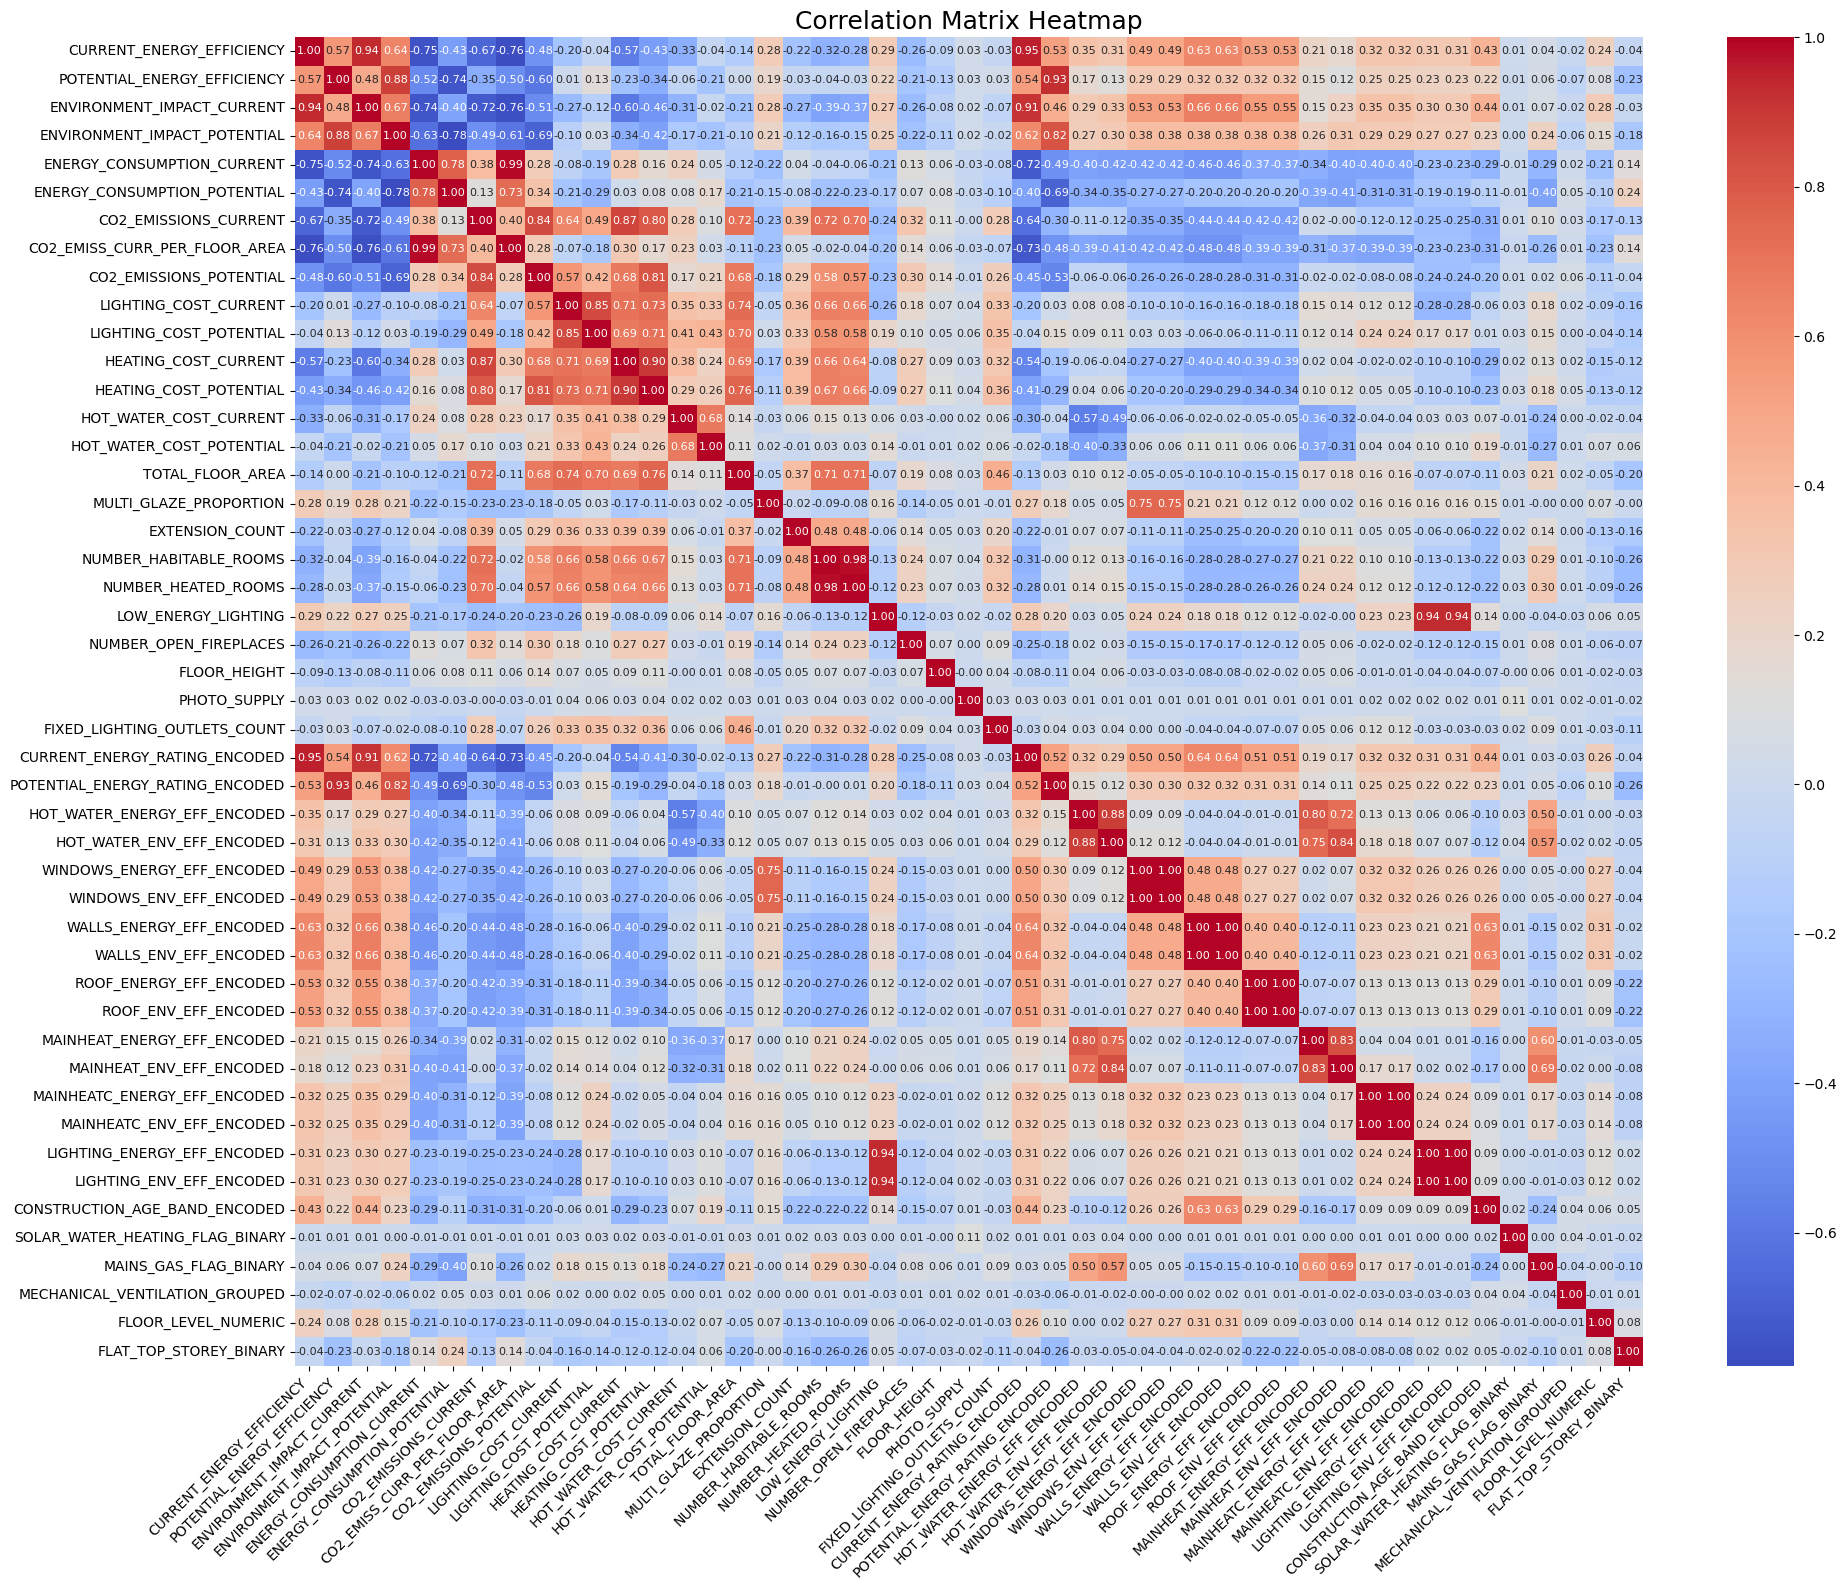

perpunuarefundi_cleansed cleaned correlation matrix before new features engineered


In [466]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Select only numerical columns for correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 16))  # Increased figure size for better fit
sns.heatmap(
    correlation_matrix,
    annot=True,            # Display correlation values
    fmt=".2f",             # Format for correlation values
    cmap='coolwarm',       # Color map
    cbar=True,             # Add color bar
    annot_kws={"size": 8}  # Reduce font size for annotations
)

# Rotate labels and adjust title
plt.xticks(fontsize=10, rotation=45, ha="right")  # Rotate and align x-axis labels
plt.yticks(fontsize=10, rotation=0)              # Keep y-axis labels horizontal
plt.title("Correlation Matrix Heatmap", fontsize=18)
plt.tight_layout()  # Ensure everything fits well

# Show the plot
plt.show()

print("perpunuarefundi_cleansed cleaned correlation matrix before new features engineered")


New engineered features :

In [467]:
import pandas as pd

# Assuming `df` is your DataFrame containing the required data

# 1. Environmental-Energy Index
df['Environmental_Energy_Index'] = df['CURRENT_ENERGY_EFFICIENCY'] * df['ENVIRONMENT_IMPACT_CURRENT']

# 2. Potential Sustainability Score
df['Potential_Sustainability_Score'] = df['POTENTIAL_ENERGY_EFFICIENCY'] * df['ENVIRONMENT_IMPACT_POTENTIAL']

# 3. Heating CO2 Cost Index
df['Heating_CO2_Cost_Index'] = df['HEATING_COST_CURRENT'] * df['CO2_EMISSIONS_CURRENT']

# 4. Normalized CO2 Emissions (per floor area)
df['Normalized_CO2_Emissions'] = df['CO2_EMISS_CURR_PER_FLOOR_AREA'] / df['TOTAL_FLOOR_AREA']

# 5. Lighting Cost Savings Potential
df['Lighting_Cost_Savings_Potential'] = df['LIGHTING_COST_CURRENT'] - df['LIGHTING_COST_POTENTIAL']

# 6. Energy Consumption per Square Meter
df['Energy_Consumption_per_Square_Meter'] = df['ENERGY_CONSUMPTION_CURRENT'] / df['TOTAL_FLOOR_AREA']

# 7. Heating Cost Savings
df['Heating_Cost_Savings'] = df['HEATING_COST_CURRENT'] - df['HEATING_COST_POTENTIAL']

# 8. Lighting Environmental Impact Score
df['Lighting_Environmental_Impact_Score'] = df['LIGHTING_COST_CURRENT'] * df['CO2_EMISSIONS_CURRENT']

# 9. Normalized Energy Consumption
df['Normalized_Energy_Consumption'] = df['ENERGY_CONSUMPTION_CURRENT'] / df['TOTAL_FLOOR_AREA']

# 10. Heating Cost per Square Meter
df['Heating_Cost_per_Square_Meter'] = df['HEATING_COST_CURRENT'] / df['TOTAL_FLOOR_AREA']

# 11. Floor-Level Interaction with Energy Efficiency
df['Floor_Level_Energy_Interaction'] = df['FLOOR_LEVEL_NUMERIC'] * df['CURRENT_ENERGY_EFFICIENCY']

# Define the save path
save_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\engineered_features.csv'

# Save the DataFrame with new features for further analysis
df.to_csv(save_path, index=False)

print(f"Engineered features added and saved to '{save_path}'.")


Engineered features added and saved to 'C:\Users\cimem\Desktop\USB\Shahadate module\engineered_features.csv'.


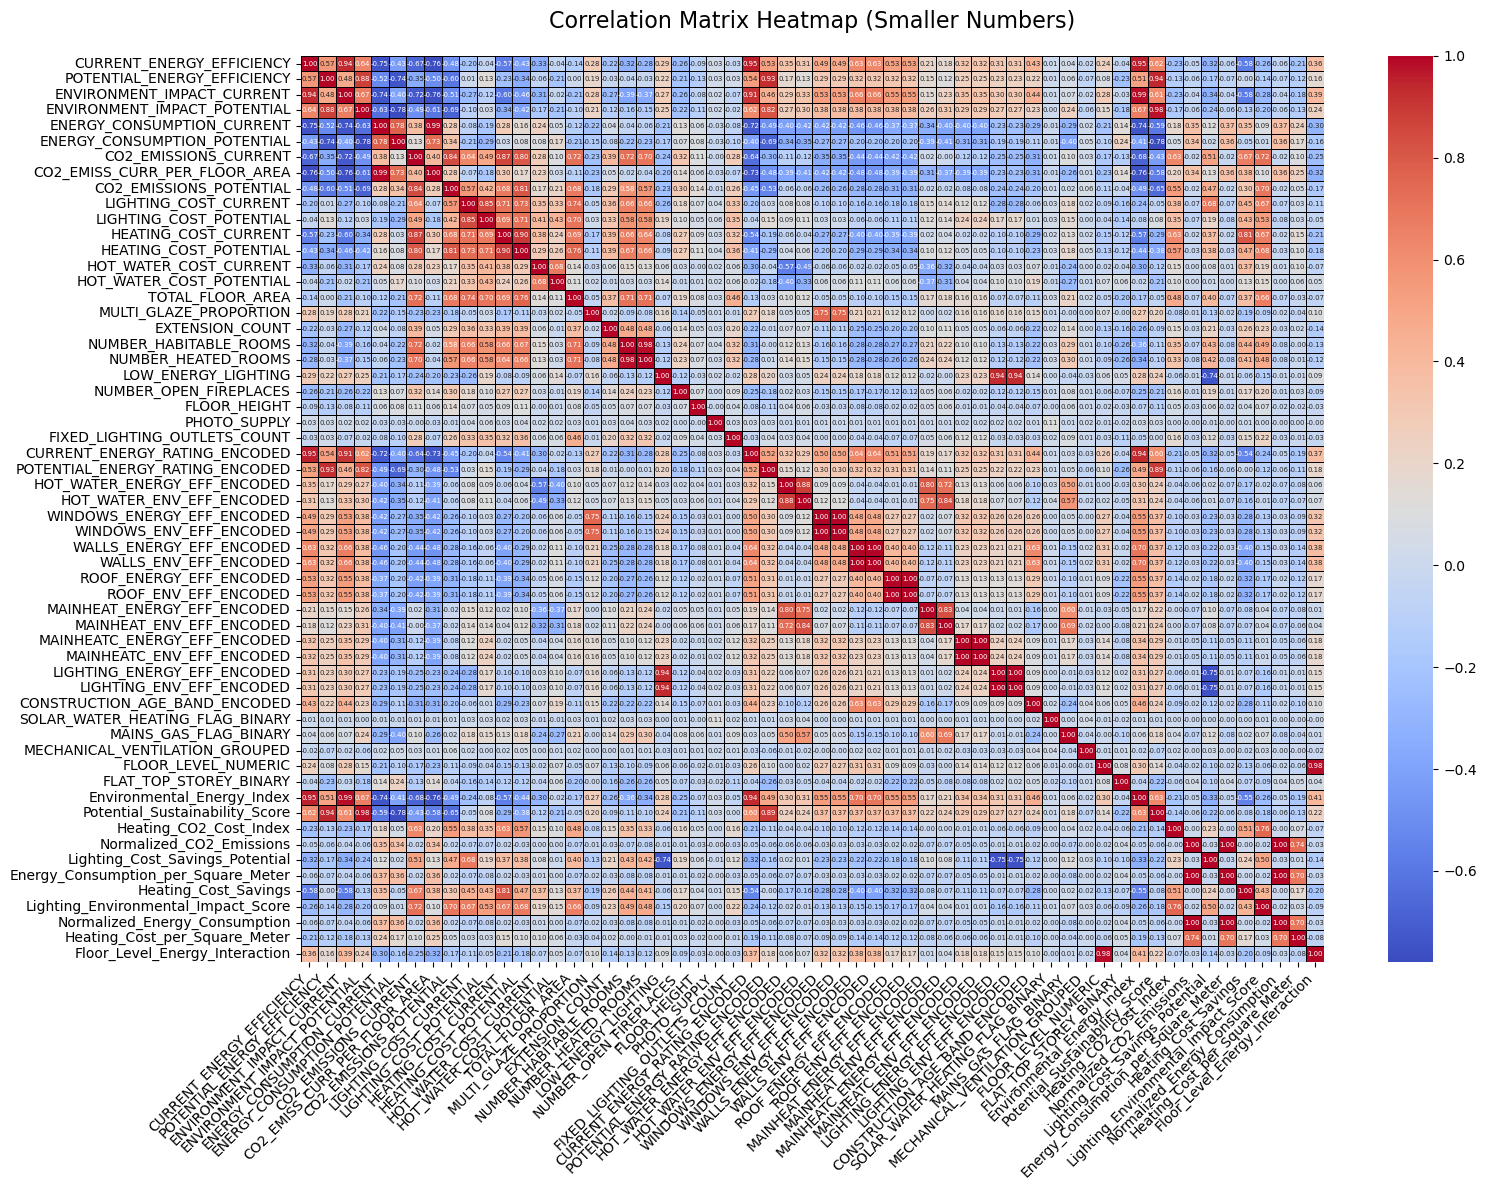

Correlation matrix heatmap with smaller numbers successfully displayed.


In [471]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 12))  # Figure size for clarity
sns.heatmap(
    correlation_matrix,
    annot=True,              # Display correlation values
    fmt=".2f",               # Format for correlation values
    cmap='coolwarm',         # Color map
    cbar=True,               # Add color bar
    annot_kws={"size": 5},   # Reduced font size for annotations (smaller numbers)
    linewidths=0.5,          # Slight gridlines
    linecolor='black'        # Gridline color
)

# Rotate labels and adjust title
plt.xticks(fontsize=10, rotation=45, ha="right")  # Rotate and align x-axis labels
plt.yticks(fontsize=10, rotation=0)              # Keep y-axis labels horizontal
plt.title("Correlation Matrix Heatmap (Smaller Numbers)", fontsize=16, pad=20)
plt.tight_layout()  # Ensure everything fits well

# Show the plot
plt.show()

print("Correlation matrix heatmap with smaller numbers successfully displayed.")


C:\Users\cimem\AppData\Local\Temp\ipykernel_7440\3506607099.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


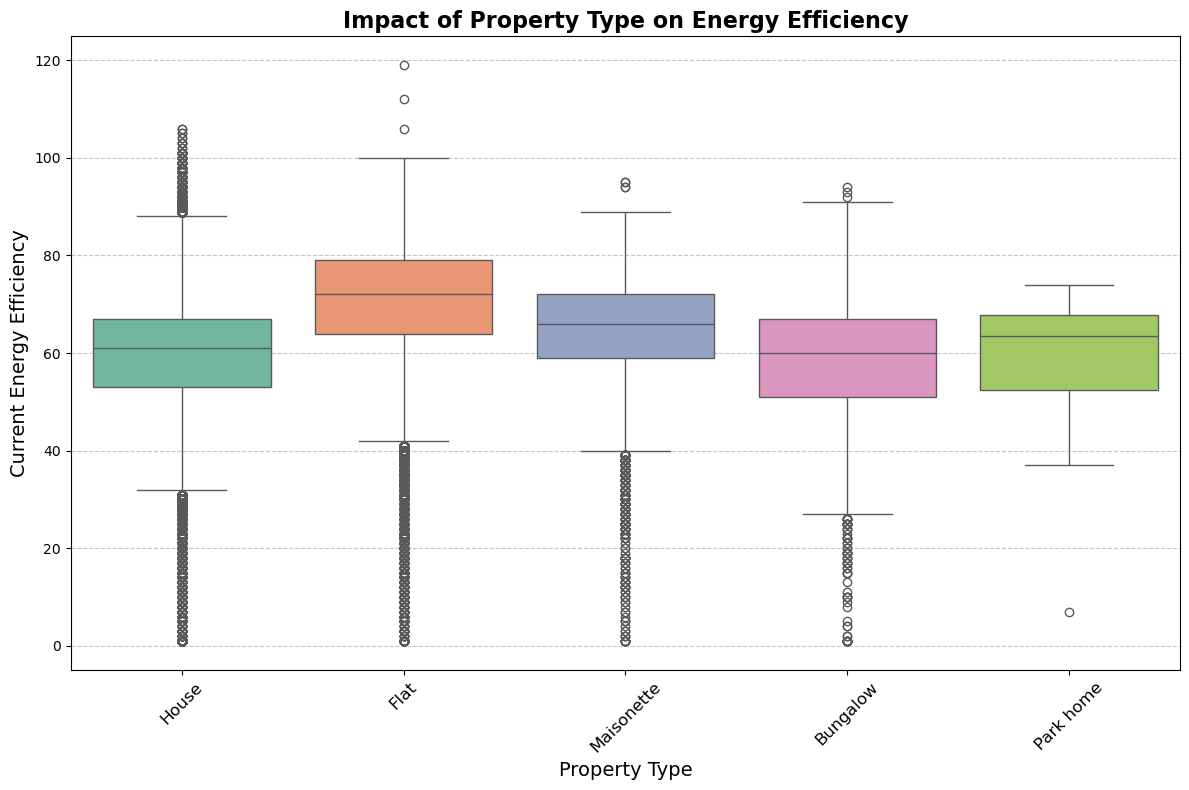

Boxplot generated successfully: Property Type vs. Energy Efficiency.


In [484]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Check if the required columns exist
if 'PROPERTY_TYPE' in df.columns and 'CURRENT_ENERGY_EFFICIENCY' in df.columns:
    plt.figure(figsize=(12, 8))
    
    # Create the boxplot
    sns.boxplot(
        x='PROPERTY_TYPE',
        y='CURRENT_ENERGY_EFFICIENCY',
        data=df,
        palette='Set2',
        showfliers=True  # To visualize potential outliers
    )
    
    # Add titles and labels
    plt.title('Impact of Property Type on Energy Efficiency', fontsize=16, weight='bold')
    plt.xlabel('Property Type', fontsize=14)
    plt.ylabel('Current Energy Efficiency', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the plot
    plt.tight_layout()
    plt.show()
    
    print("Boxplot generated successfully: Property Type vs. Energy Efficiency.")
else:
    print("Error: The required columns 'PROPERTY_TYPE' or 'CURRENT_ENERGY_EFFICIENCY' are not in the dataset.")


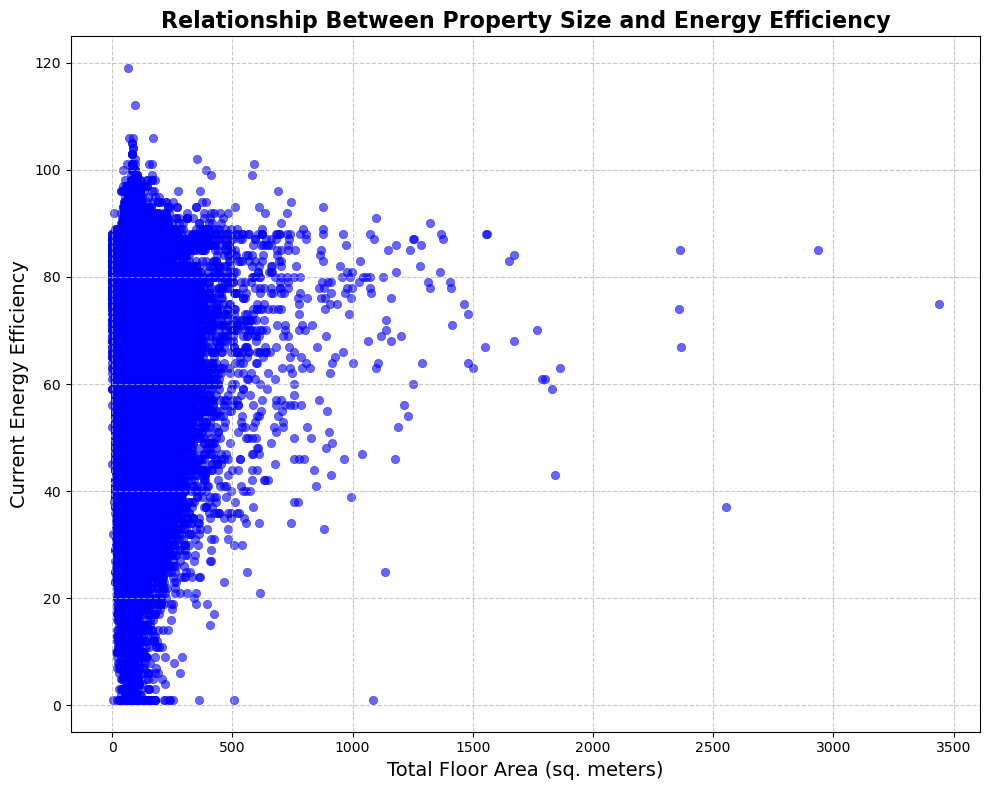

Scatterplot generated successfully: Total Floor Area vs. Energy Efficiency.


In [485]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Check if the required columns exist
if 'TOTAL_FLOOR_AREA' in df.columns and 'CURRENT_ENERGY_EFFICIENCY' in df.columns:
    plt.figure(figsize=(10, 8))
    
    # Create the scatterplot
    sns.scatterplot(
        x='TOTAL_FLOOR_AREA',
        y='CURRENT_ENERGY_EFFICIENCY',
        data=df,
        alpha=0.6,  # Adjust transparency for overlapping points
        color='blue',
        edgecolor=None
    )
    
    # Add titles and labels
    plt.title('Relationship Between Property Size and Energy Efficiency', fontsize=16, weight='bold')
    plt.xlabel('Total Floor Area (sq. meters)', fontsize=14)
    plt.ylabel('Current Energy Efficiency', fontsize=14)
    plt.grid(linestyle='--', alpha=0.7)

    # Display the plot
    plt.tight_layout()
    plt.show()
    
    print("Scatterplot generated successfully: Total Floor Area vs. Energy Efficiency.")
else:
    print("Error: The required columns 'TOTAL_FLOOR_AREA' or 'CURRENT_ENERGY_EFFICIENCY' are not in the dataset.")


C:\Users\cimem\AppData\Local\Temp\ipykernel_7440\1535502771.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


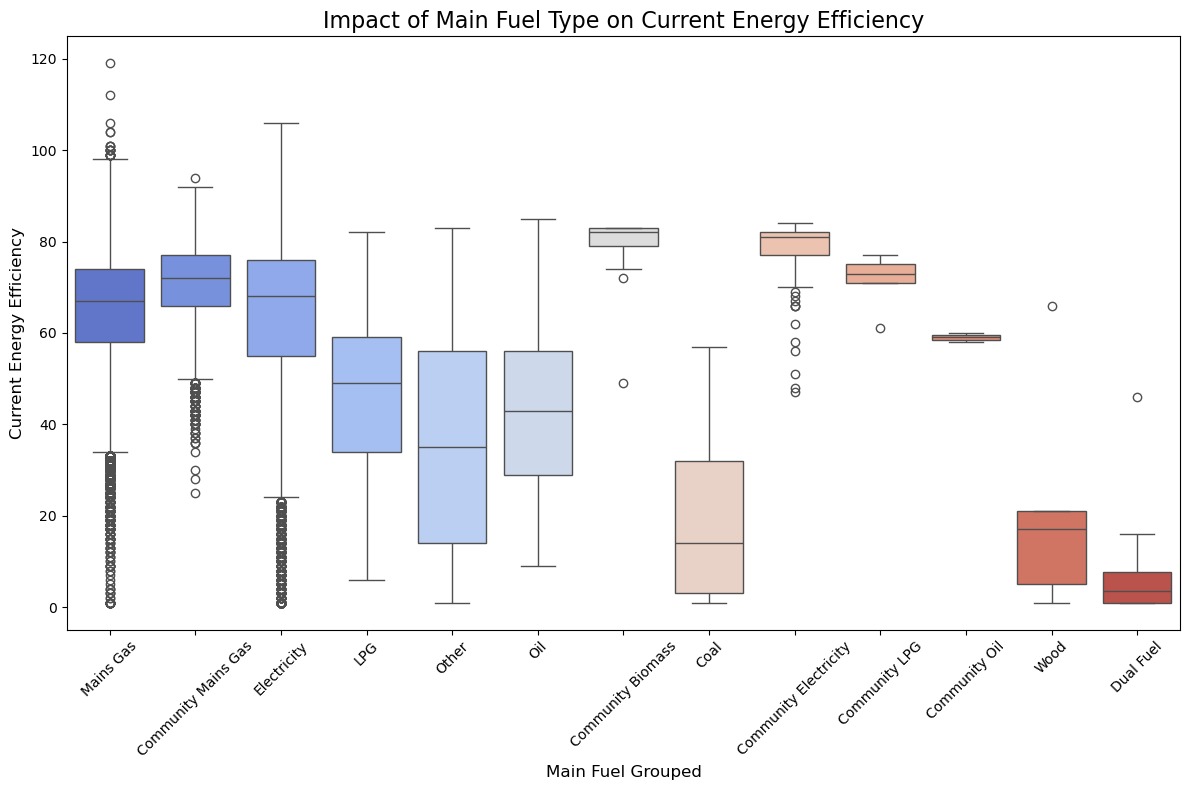

In [486]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Ensure columns exist in the dataset
if 'CURRENT_ENERGY_EFFICIENCY' in df.columns and 'MAIN_FUEL_GROUPED' in df.columns:
    # Plot boxplot
    plt.figure(figsize=(12, 8))  # Adjust figure size for better visibility
    sns.boxplot(
        data=df,
        x='MAIN_FUEL_GROUPED',
        y='CURRENT_ENERGY_EFFICIENCY',
        palette='coolwarm'
    )

    # Add titles and labels
    plt.title('Impact of Main Fuel Type on Current Energy Efficiency', fontsize=16)
    plt.xlabel('Main Fuel Grouped', fontsize=12)
    plt.ylabel('Current Energy Efficiency', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
    plt.yticks(fontsize=10)

    # Show the plot
    plt.tight_layout()  # Ensure everything fits within the plot area
    plt.show()
else:
    print("Required columns ('CURRENT_ENERGY_EFFICIENCY' and 'MAIN_FUEL_GROUPED') are not present in the dataset.")


C:\Users\cimem\AppData\Local\Temp\ipykernel_7440\3371611380.py:7: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


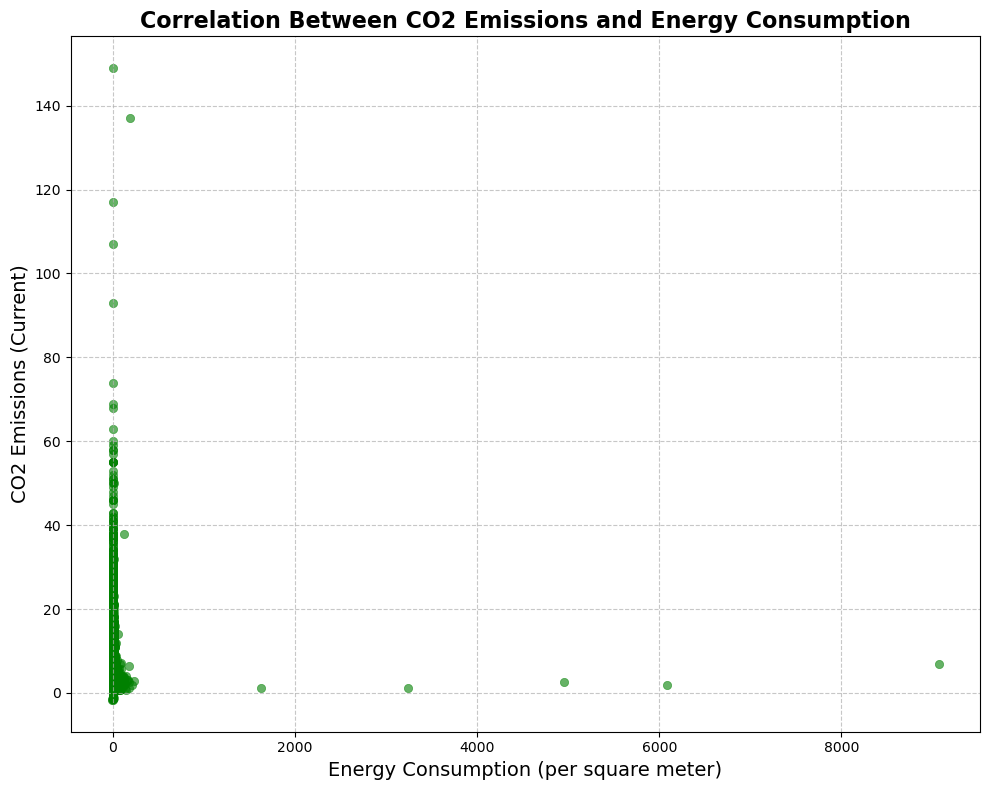

Scatterplot generated successfully: CO2 Emissions vs. Energy Consumption.


In [488]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\engineered_features.csv'  
df = pd.read_csv(file_path)

# Check if the required columns exist
if 'CO2_EMISSIONS_CURRENT' in df.columns and 'Energy_Consumption_per_Square_Meter' in df.columns:
    plt.figure(figsize=(10, 8))
    
    # Create the scatterplot
    sns.scatterplot(
        x='Energy_Consumption_per_Square_Meter',
        y='CO2_EMISSIONS_CURRENT',
        data=df,
        alpha=0.6,  # Adjust transparency for overlapping points
        color='green',
        edgecolor=None
    )
    
    # Add titles and labels
    plt.title('Correlation Between CO2 Emissions and Energy Consumption', fontsize=16, weight='bold')
    plt.xlabel('Energy Consumption (per square meter)', fontsize=14)
    plt.ylabel('CO2 Emissions (Current)', fontsize=14)
    plt.grid(linestyle='--', alpha=0.7)

    # Display the plot
    plt.tight_layout()
    plt.show()
    
    print("Scatterplot generated successfully: CO2 Emissions vs. Energy Consumption.")
else:
    print("Error: The required columns 'CO2_EMISSIONS_CURRENT' or 'Energy_Consumption_per_Square_Meter' are not in the dataset.")


C:\Users\cimem\AppData\Local\Temp\ipykernel_7440\3342568399.py:11: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


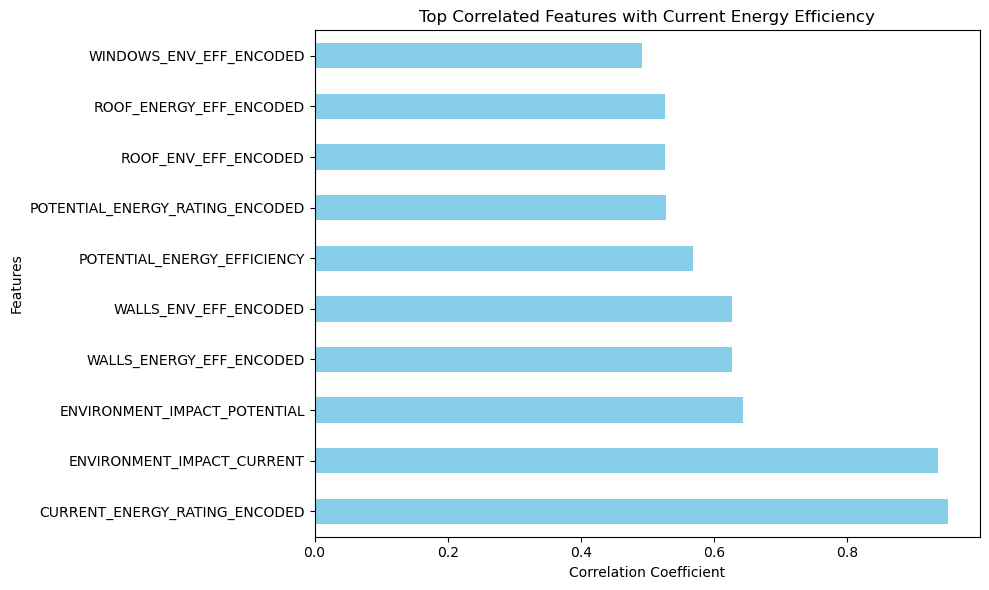

Model Performance: MSE = 1.03, R² = 0.99


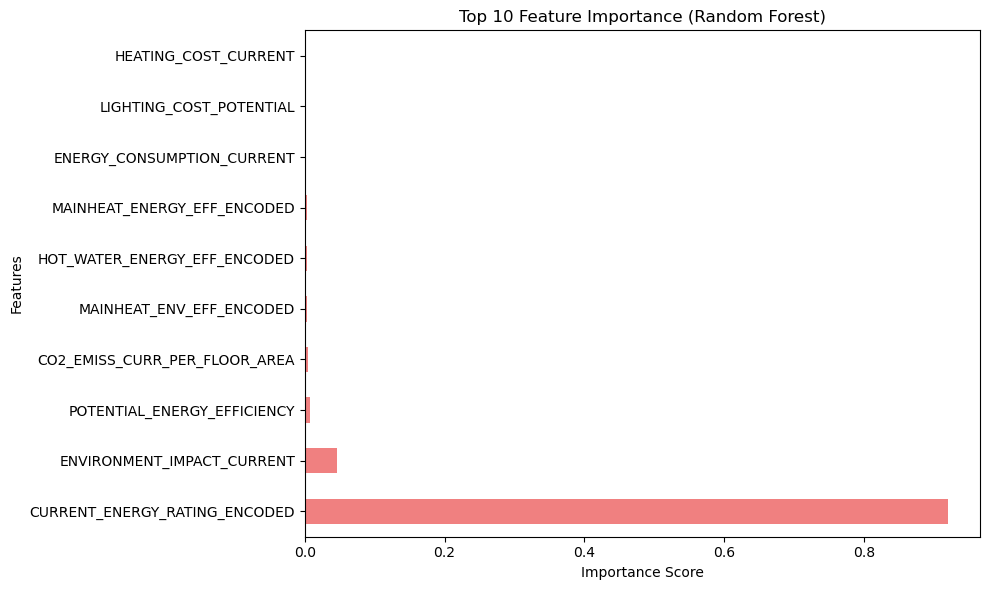

In [483]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = r'C:\Users\cimem\Desktop\USB\Shahadate module\perpunuarefundi_cleaned.csv'
df = pd.read_csv(file_path)

# Select numeric features for correlation analysis
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlations with CURRENT_ENERGY_EFFICIENCY
correlations = df[numeric_features].corr()['CURRENT_ENERGY_EFFICIENCY'].sort_values(ascending=False)

# Plot top correlated features
plt.figure(figsize=(10, 6))
correlations.iloc[1:11].plot(kind='barh', color='skyblue')
plt.title('Top Correlated Features with Current Energy Efficiency')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Prepare data for regression model
target = 'CURRENT_ENERGY_EFFICIENCY'
features = [col for col in df.columns if col != target and df[col].dtype in ['float64', 'int64']]

X = df[features]
y = df[target]

# Handle missing values (if any)
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance: MSE = {mse:.2f}, R² = {r2:.2f}")

# Extract feature importance
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

# Plot top 10 features by importance
plt.figure(figsize=(10, 6))
feature_importance.iloc[:10].plot(kind='barh', color='lightcoral')
plt.title('Top 10 Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
